#  Reinforcement Learning part 4: Generalizability

In this brief post we discuss generalizability of the Reinforcement Learning framework. Specifically, we use our Gridworld library to see how a fully trained agent act in a new Gridworld environment that it has not seen before.

>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://mlrefined.com for free chapter downloads and tutorials, and [our Amazon site](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

##  1.  How generalizable is a trained agent?

So far in the Reinforcement Learning series we have seen how to train a fully-functional Gridworld agent using Q-Learning. To reproduce the results for easy reference, we initialize the Gridworld in the next Python cell, train it in the second cell using the enhanced version of the Q-Learning algorithm discussed in part 3, and use the learned optimal policy to move efficiently through the world starting at a number of intitial locations.

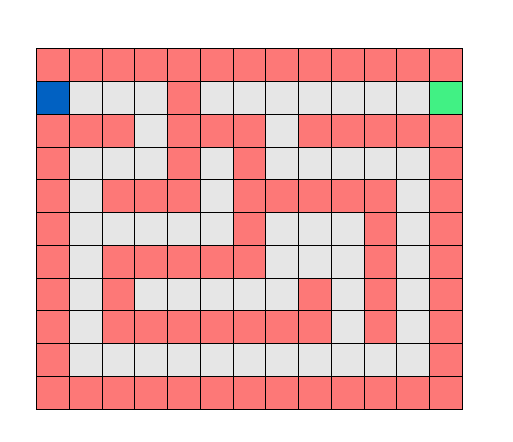

In [1]:
# import Gridworld library
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_maze = gridworld_enviro.environment(world_size = 'small', world_type = 'maze')

# show the grid
small_maze.color_gridworld(lights = 'on')

In [2]:
# import q-learning module
from gridworld_lib import gridworld_qlearn

# create an instance of the q-learner
small_maze_qlearner = gridworld_qlearn.learner(gridworld = small_maze)

# run q-learning
small_maze_qlearner.train(verbose = False, action_method = 'exploit', gamma = 1)

q-learning algorithm complete



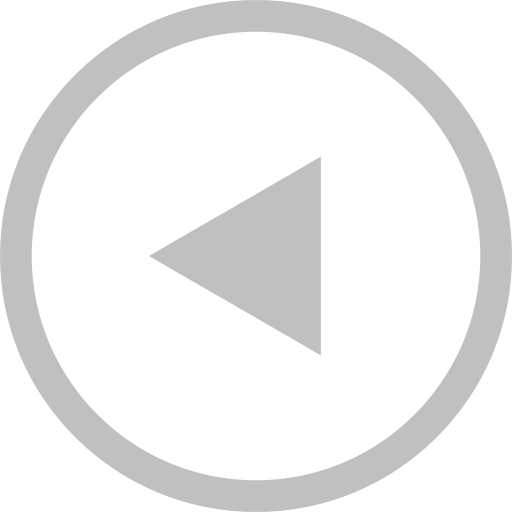
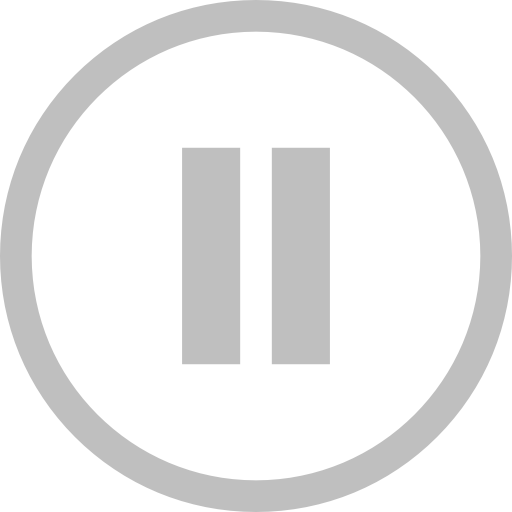
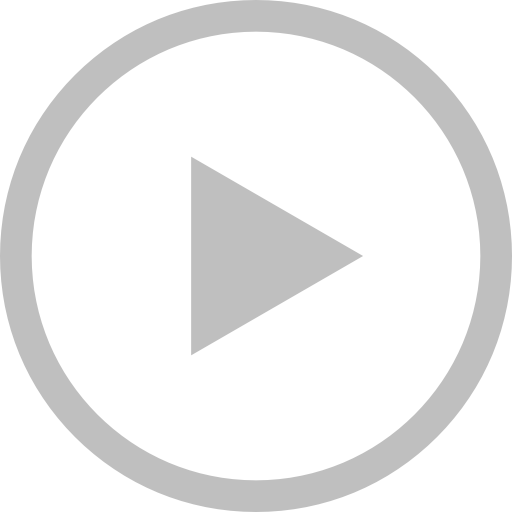
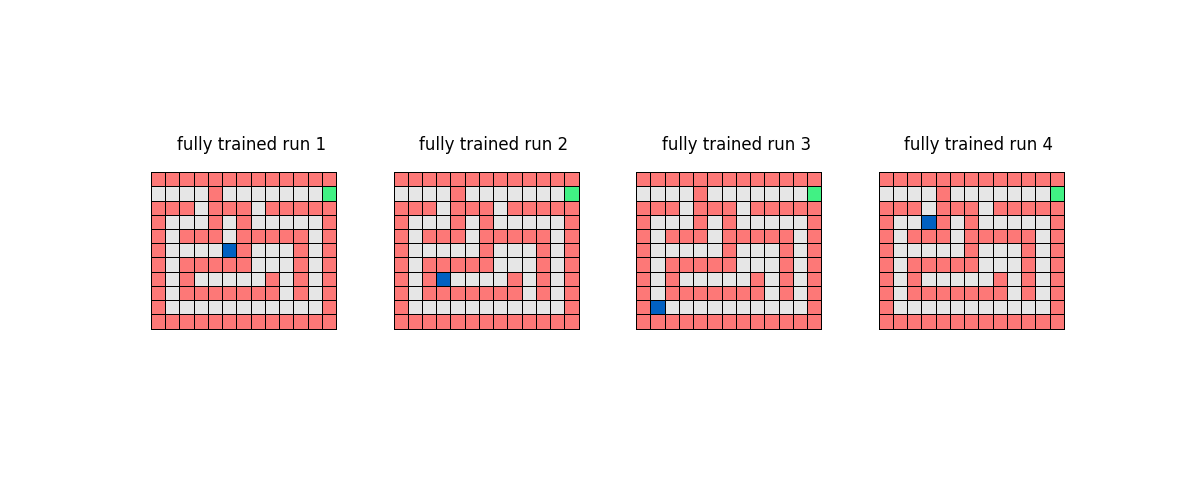
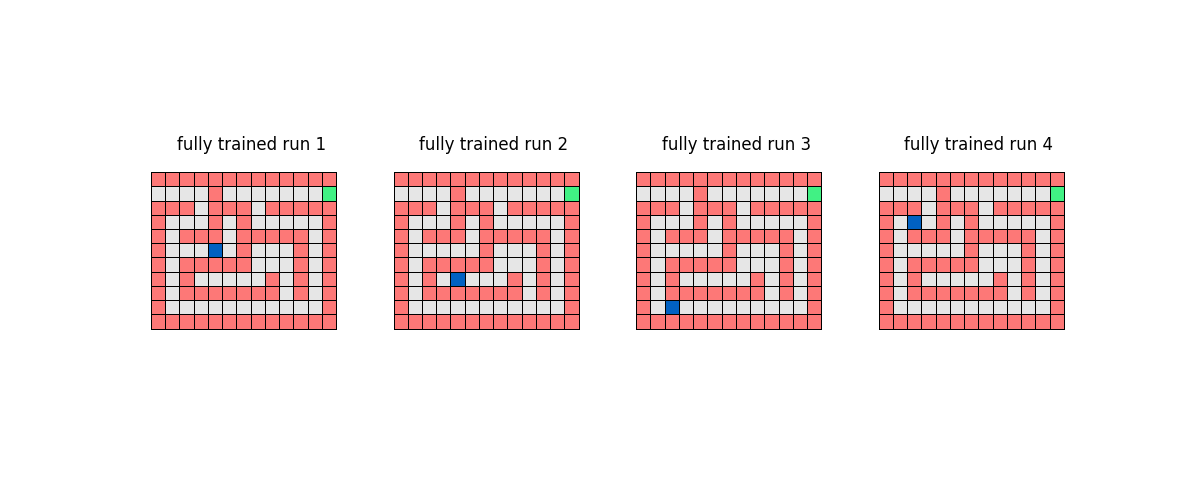
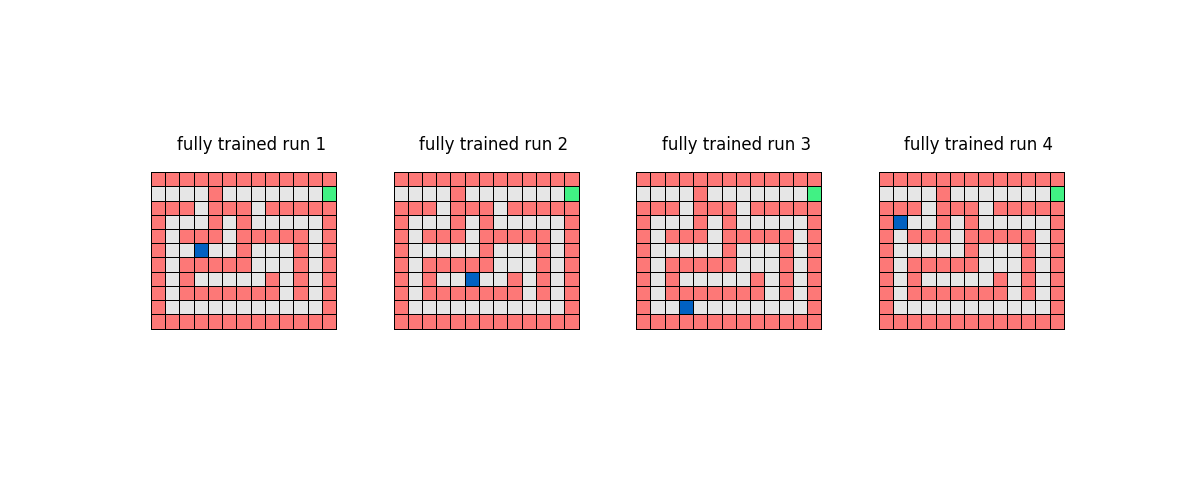
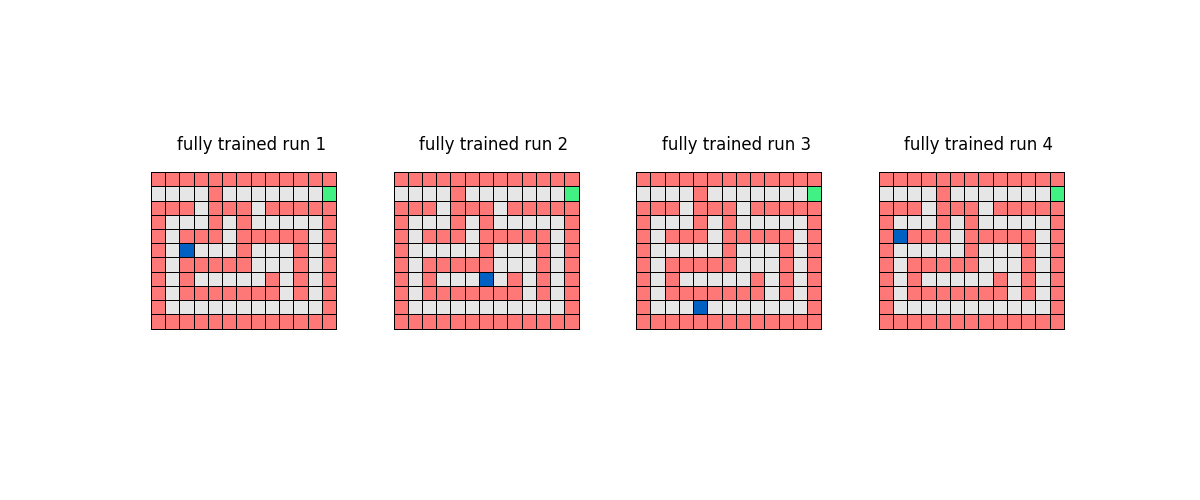
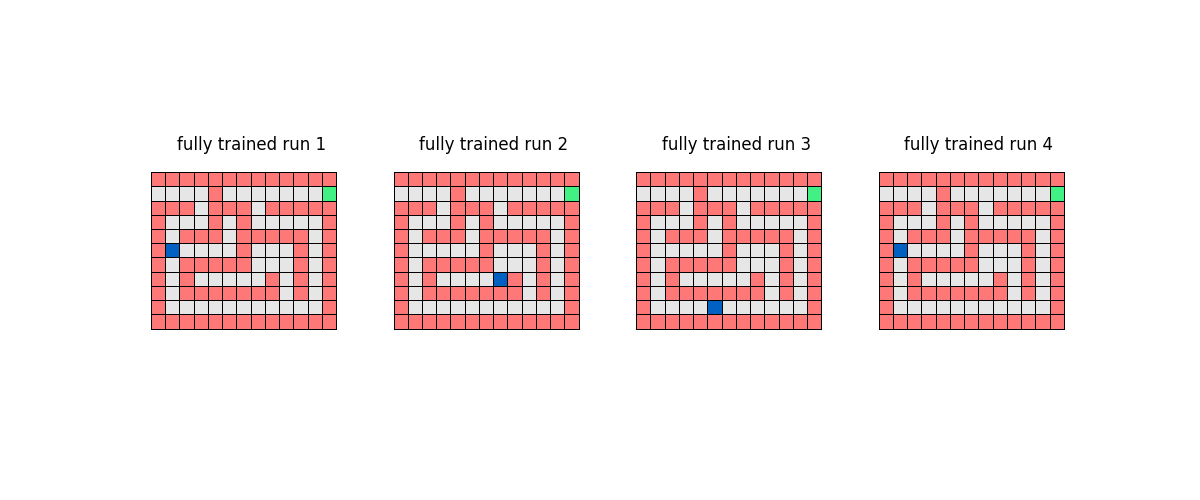
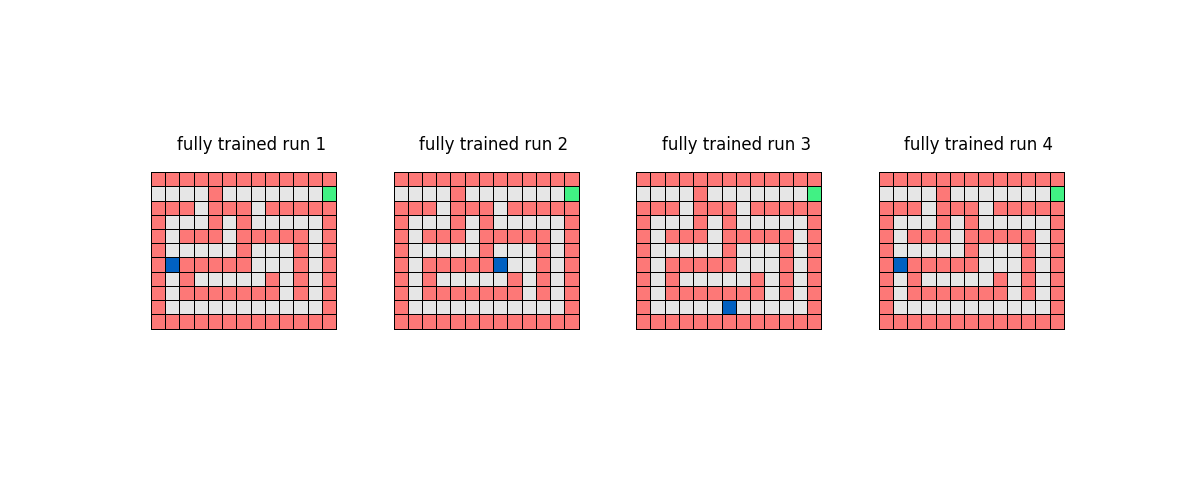
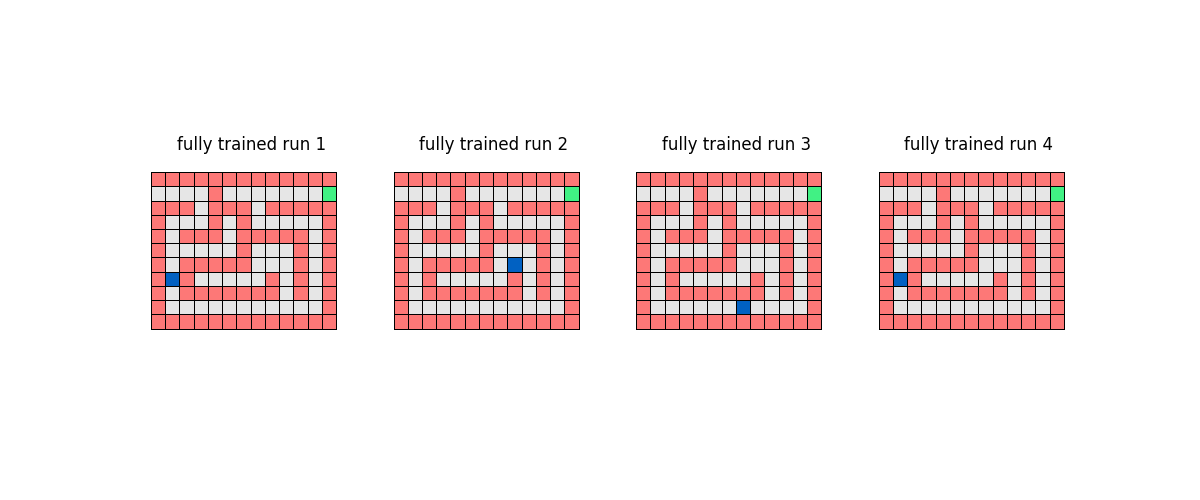
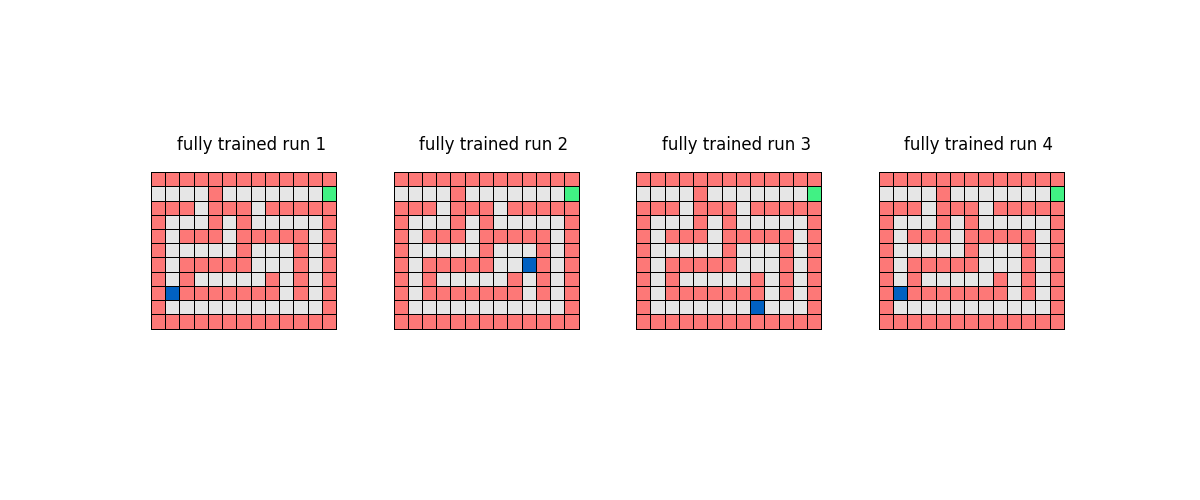
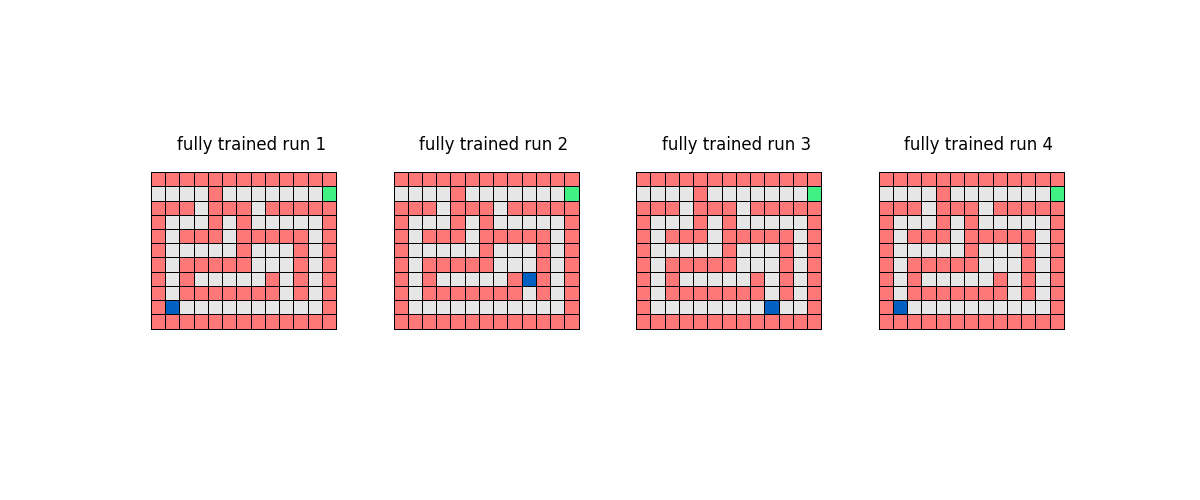
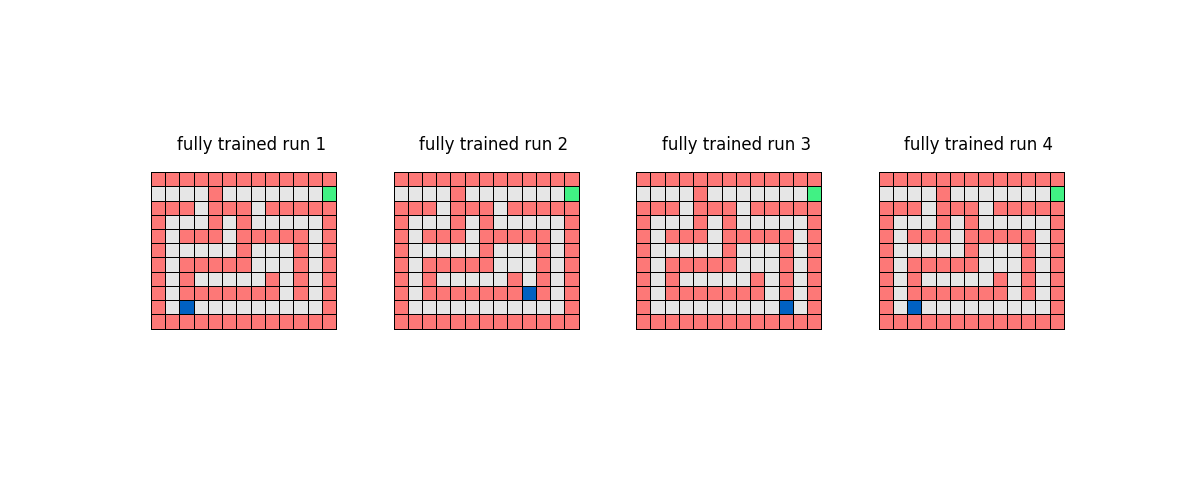
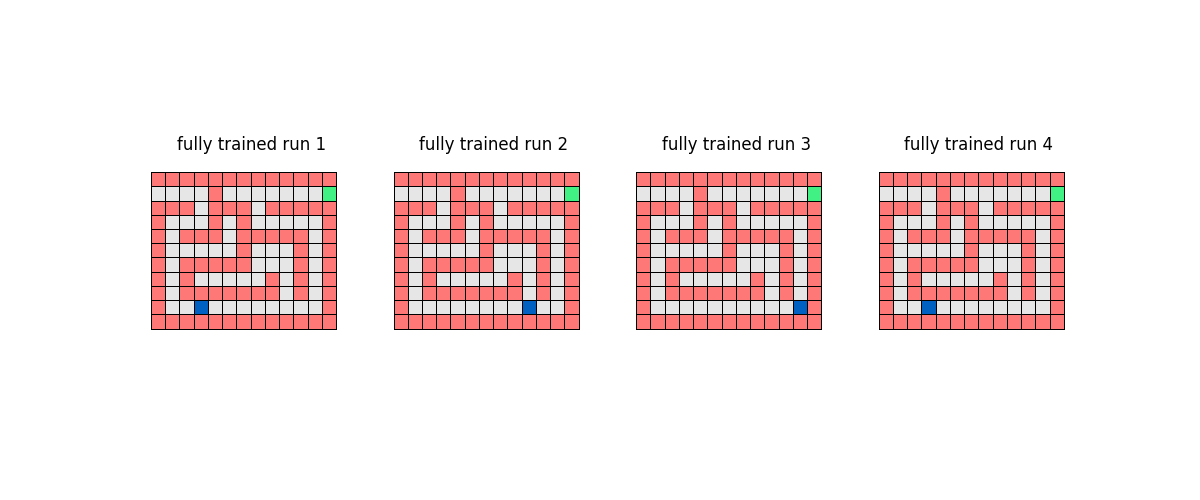
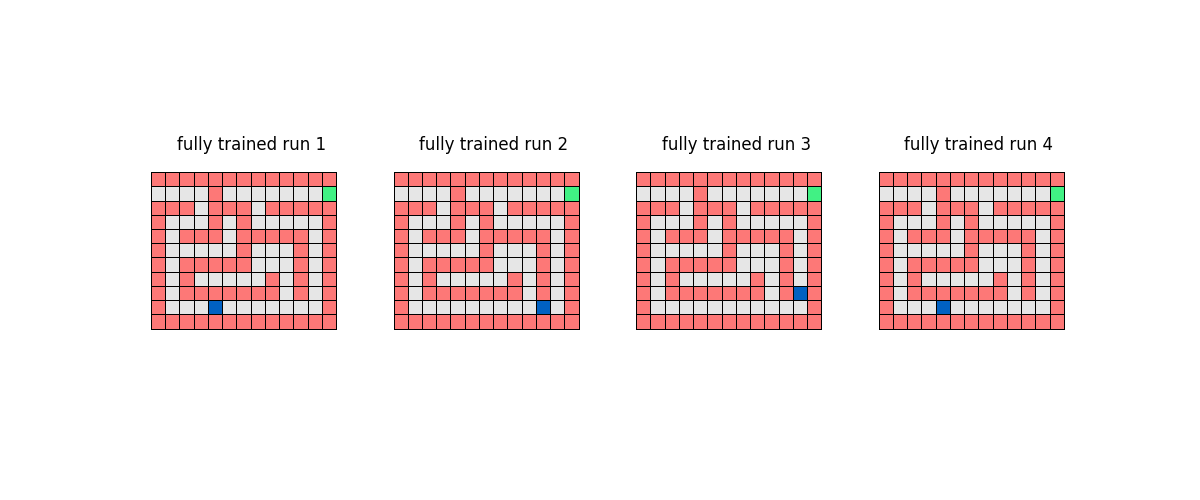
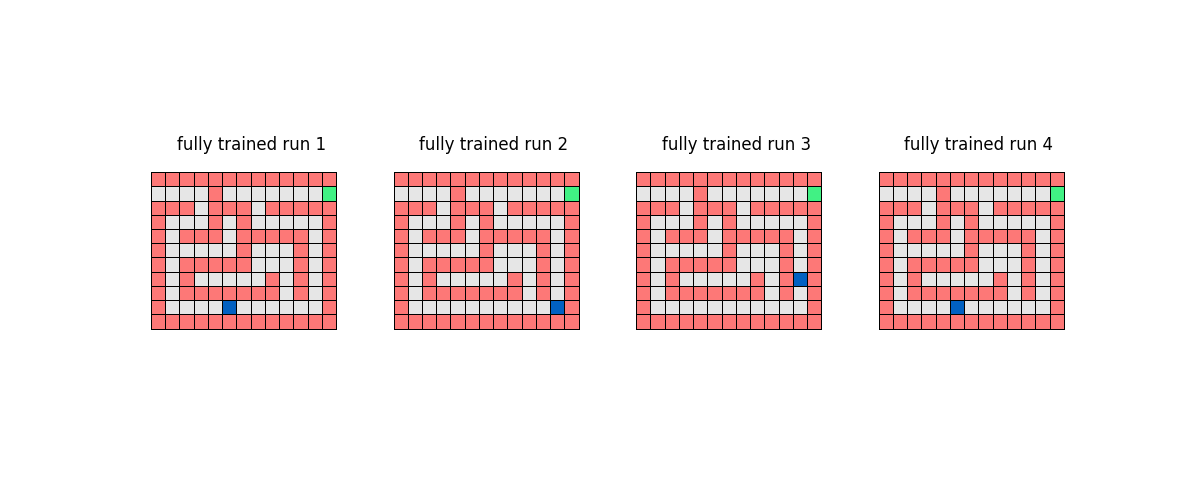
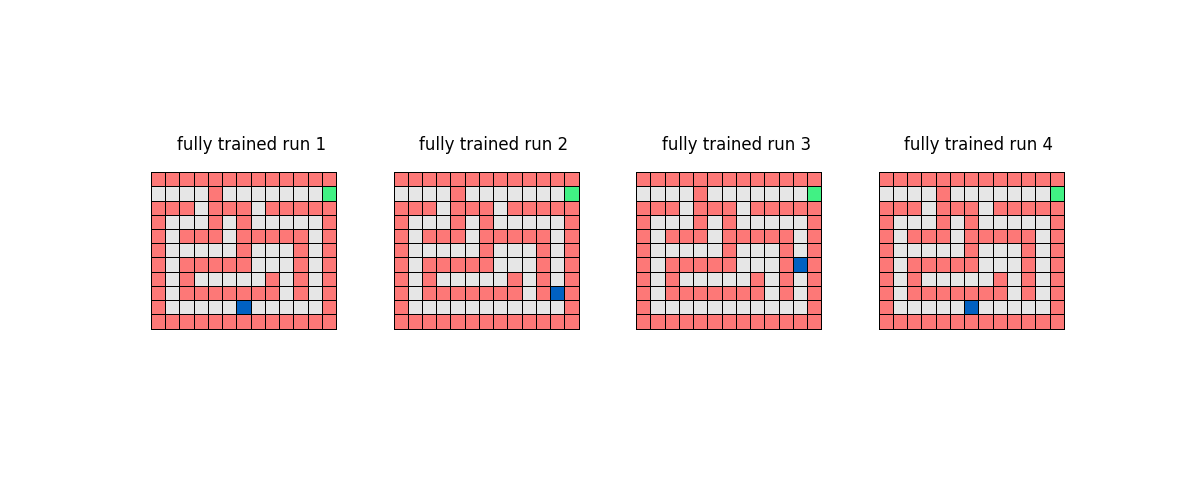
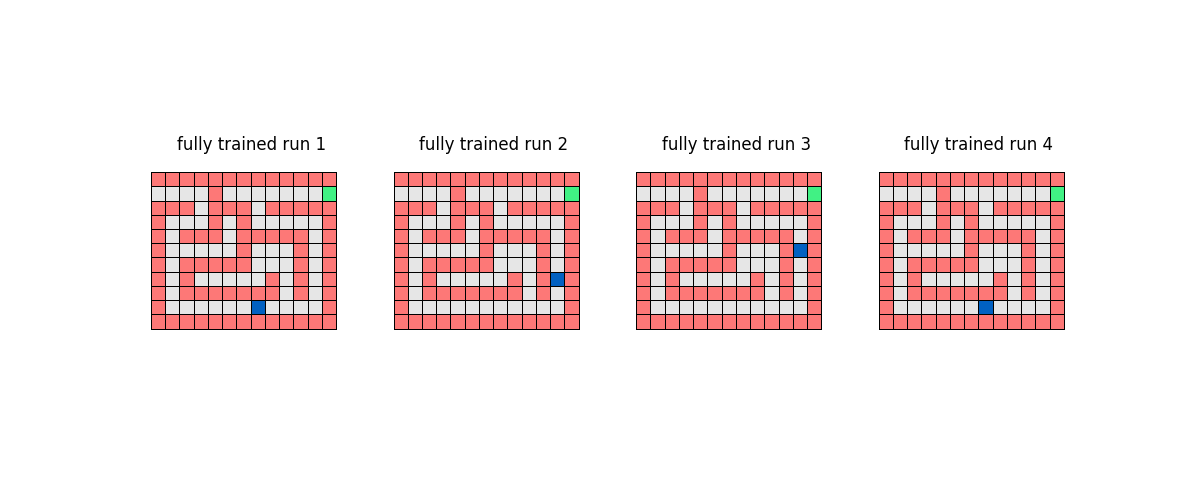
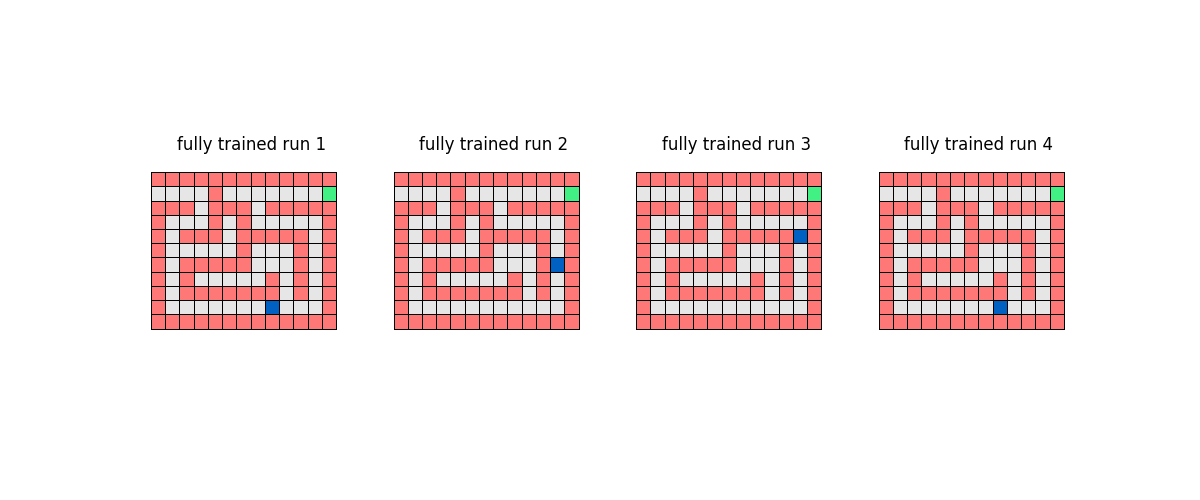
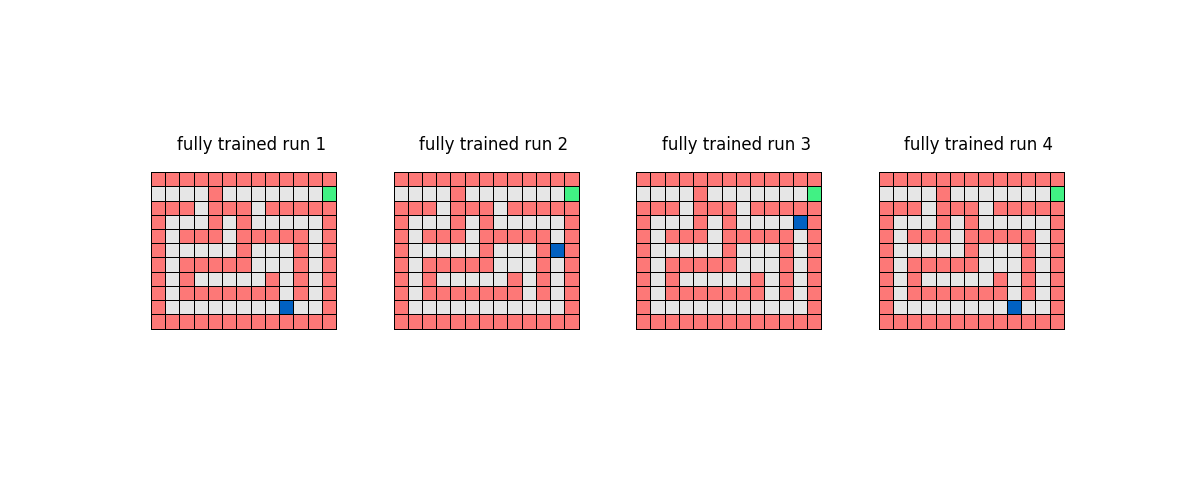
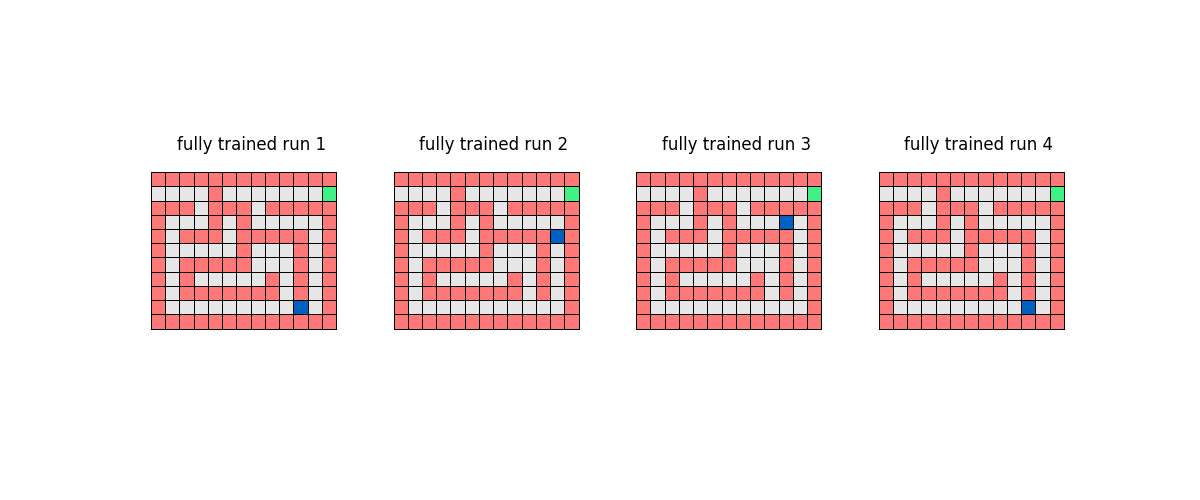
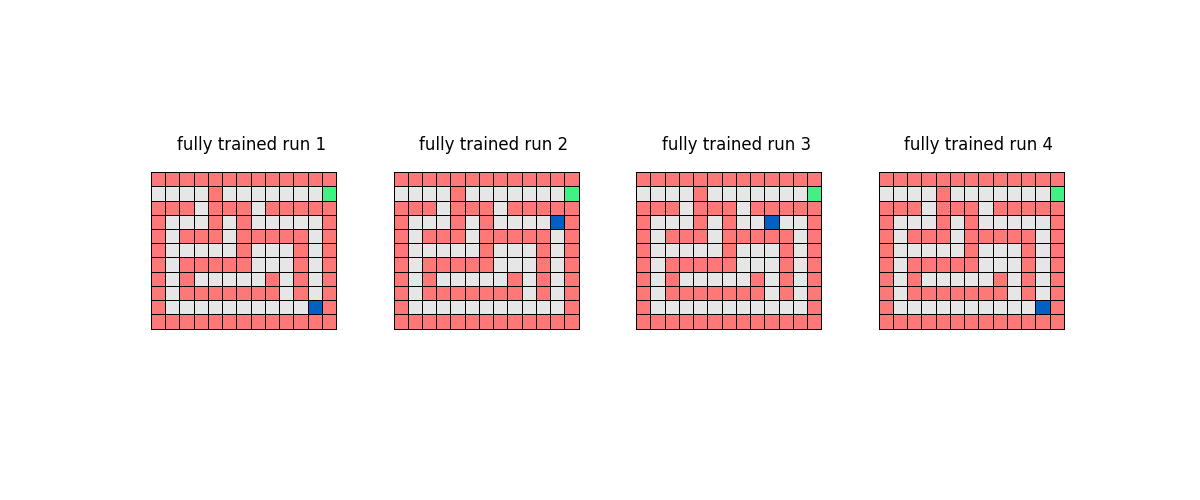
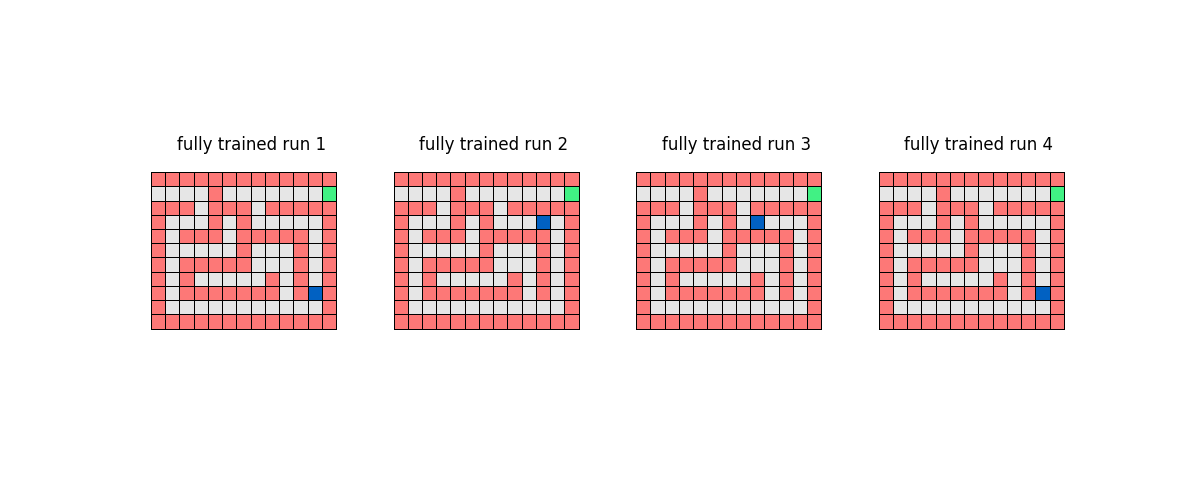
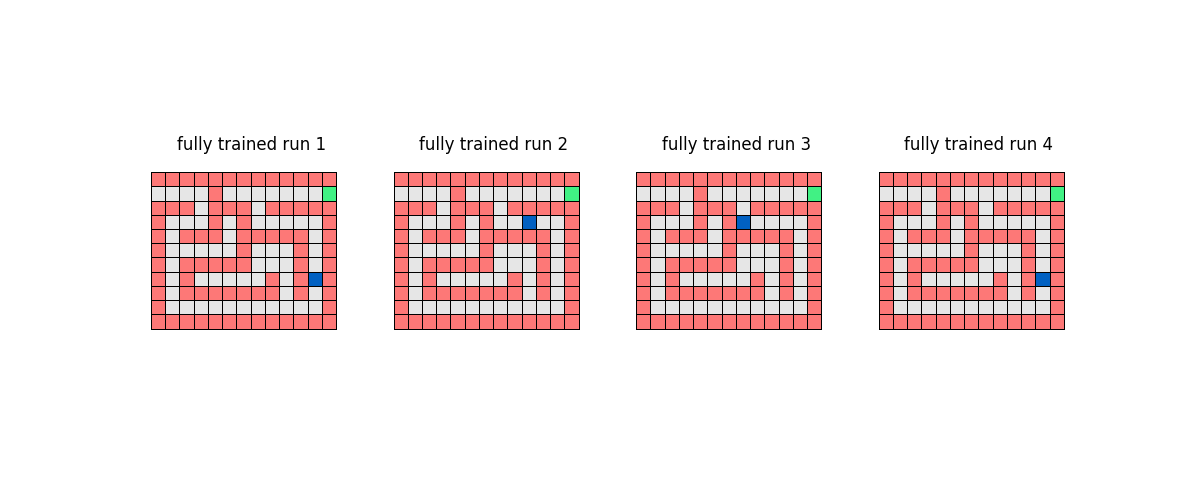
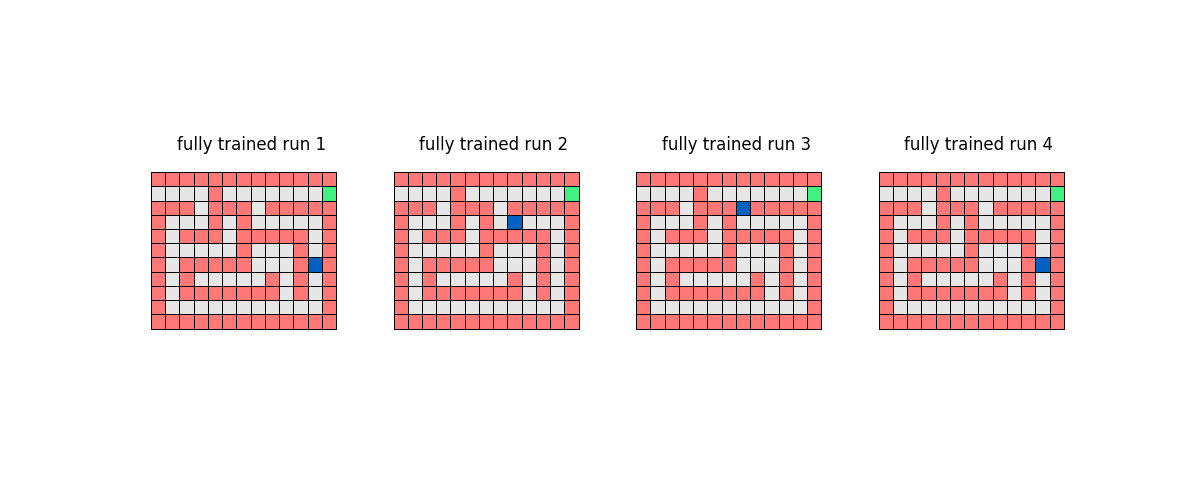
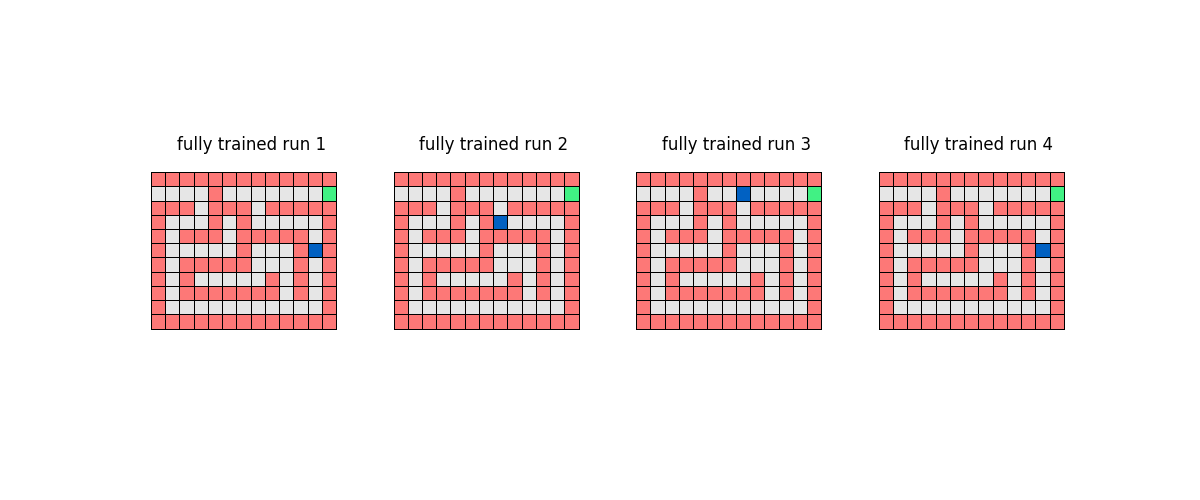
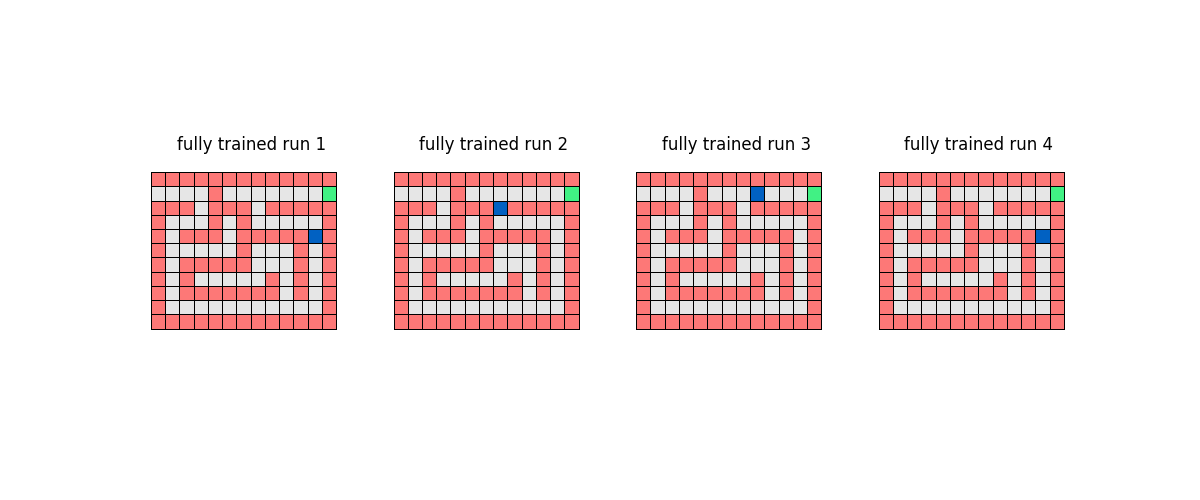
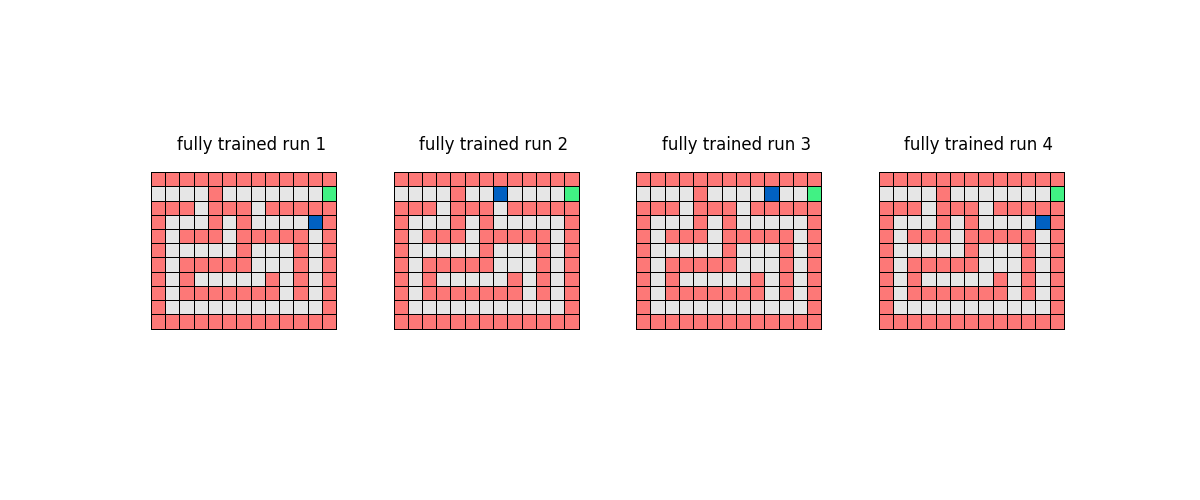
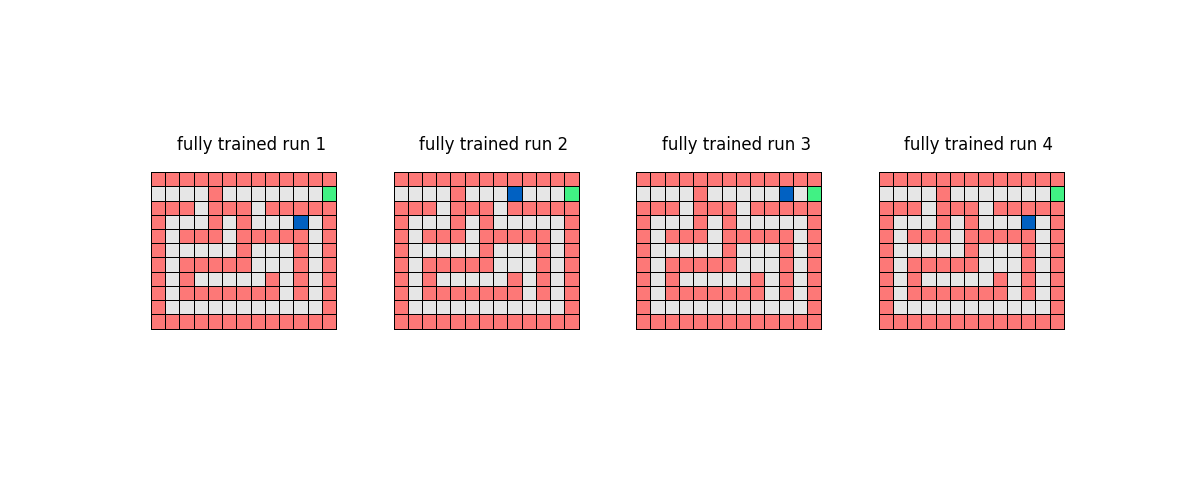
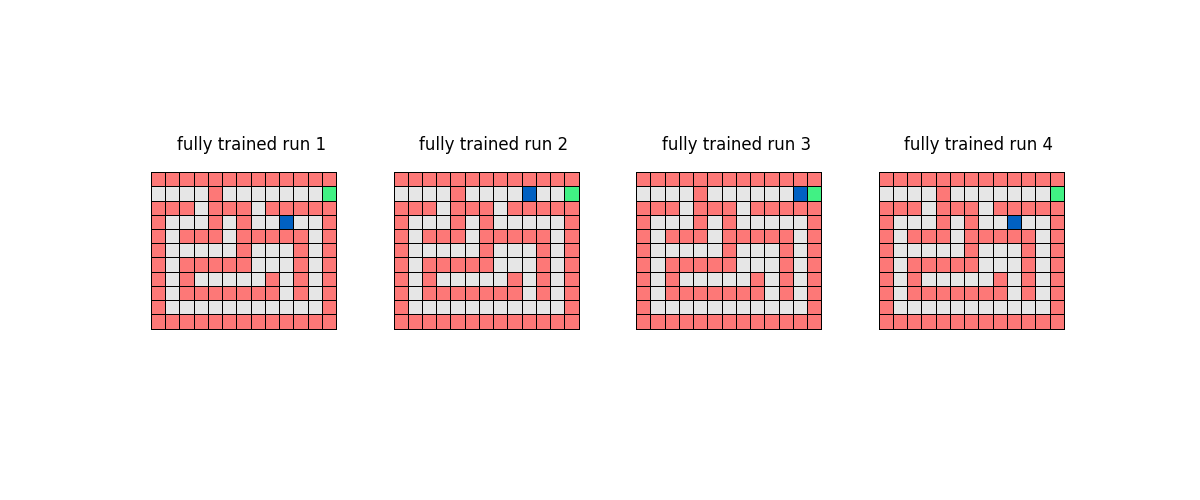
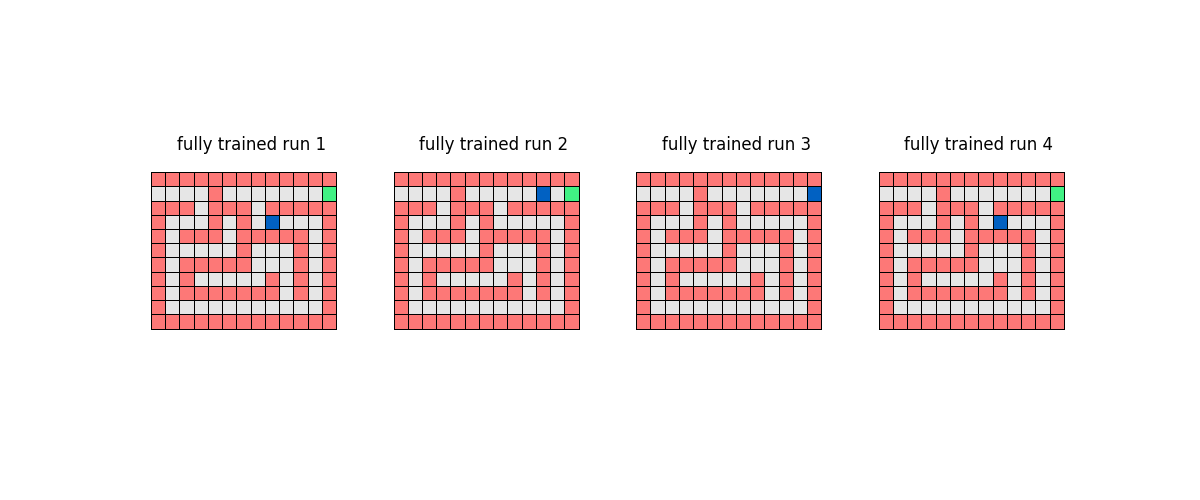
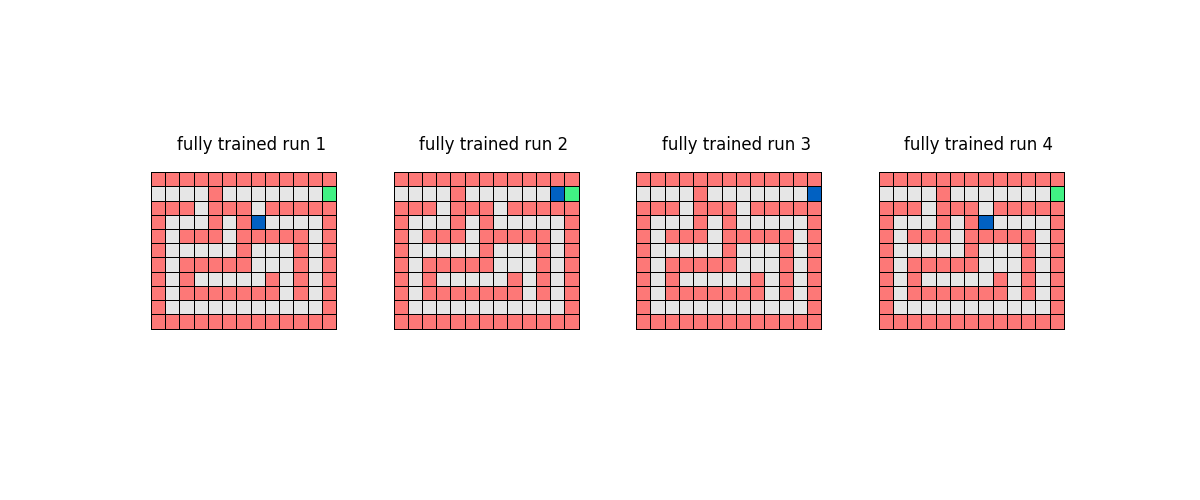
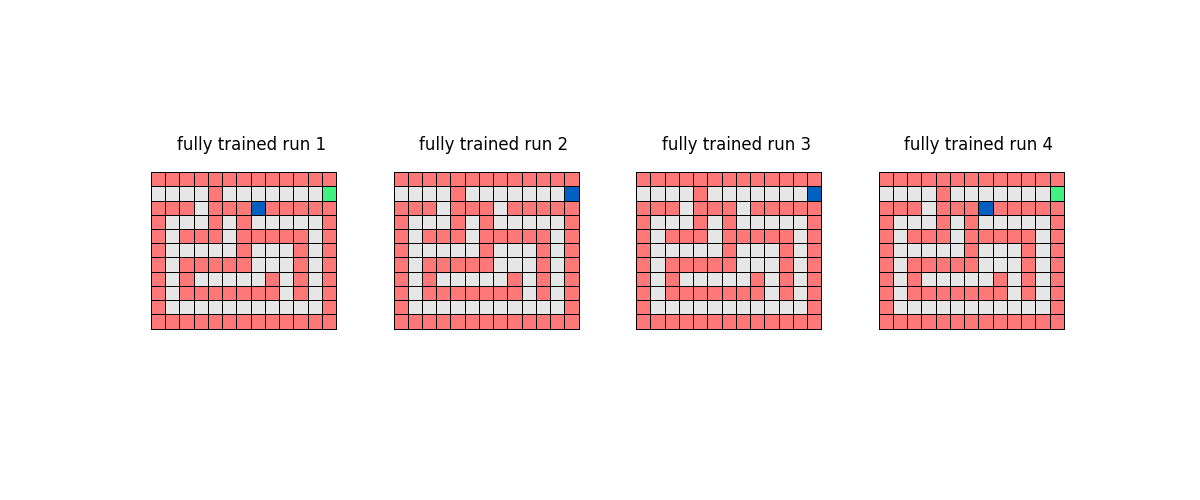
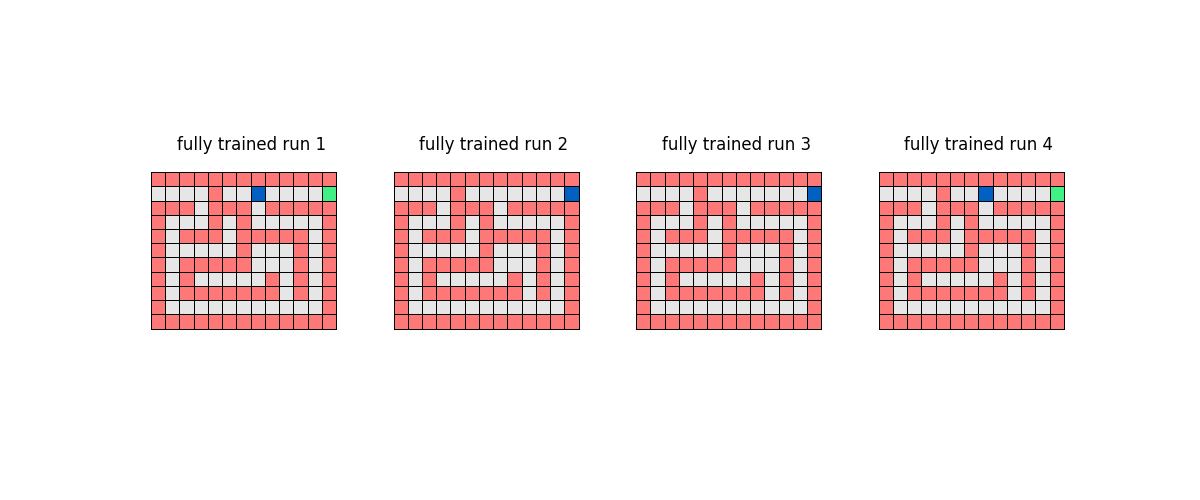
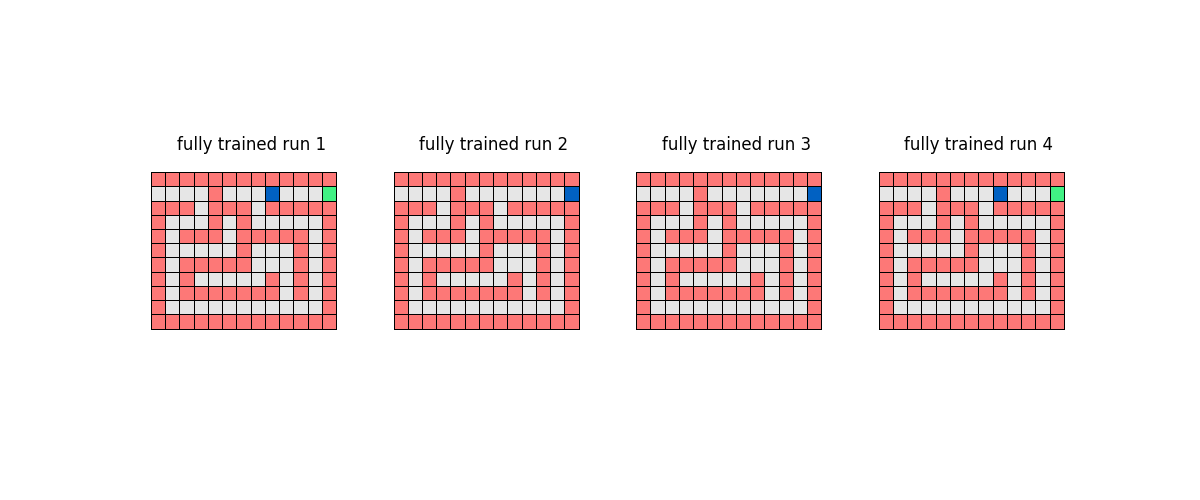
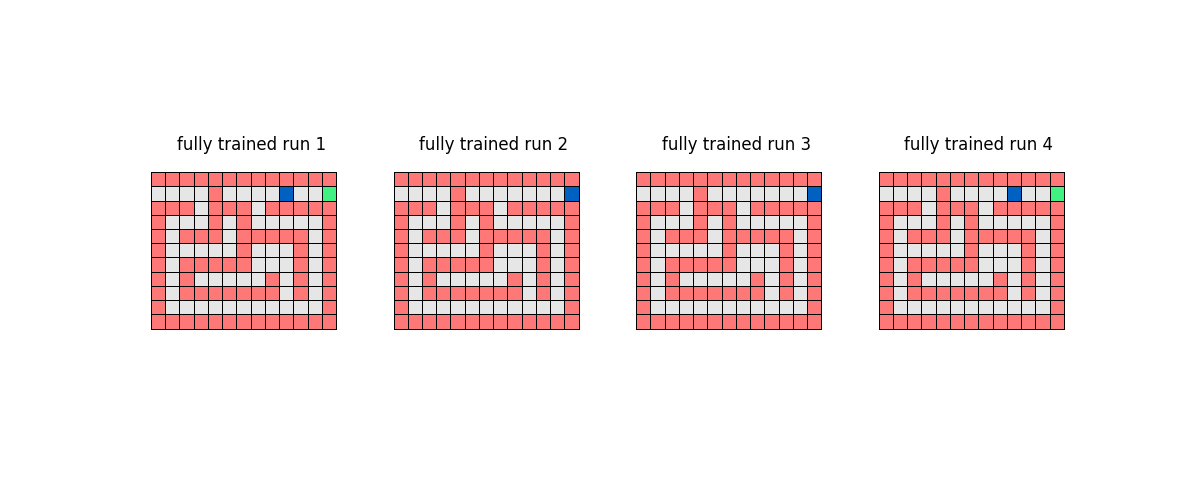
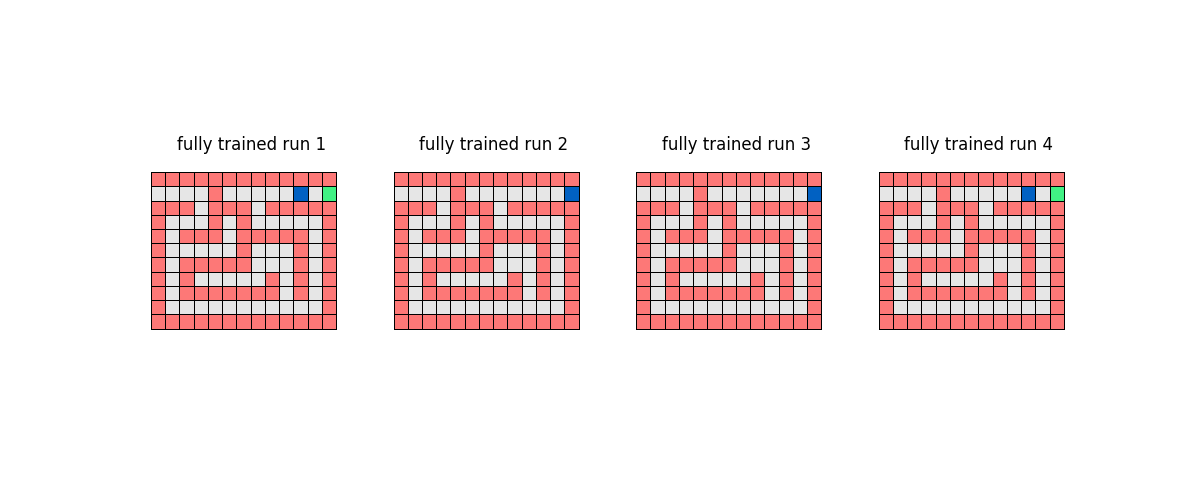
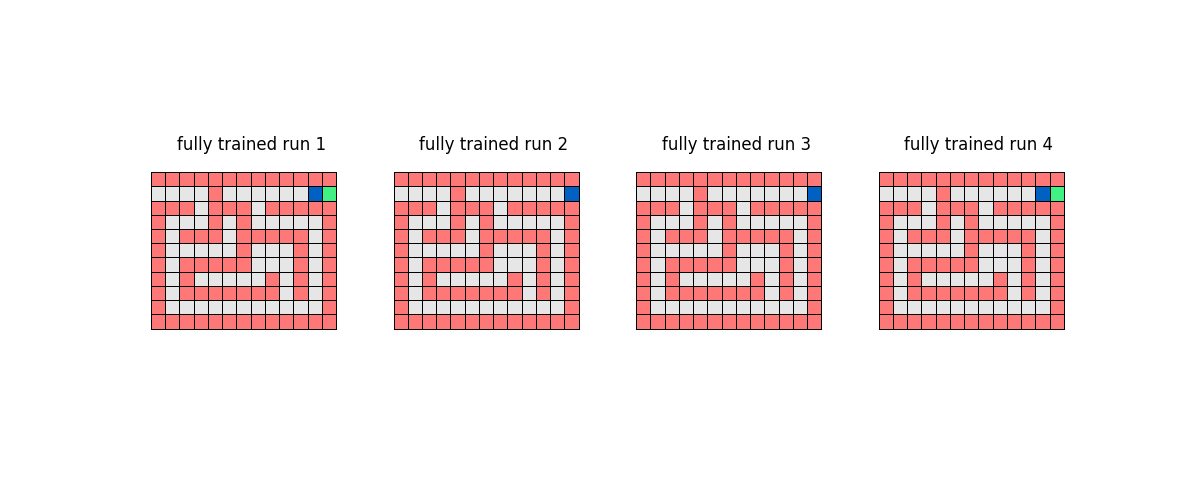
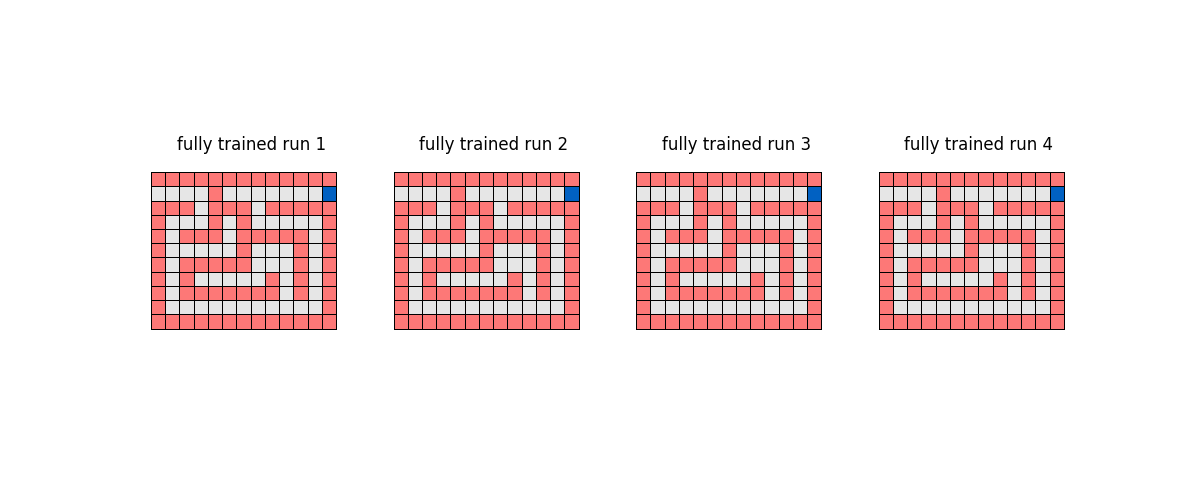

In [3]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[5,5],[3,3],[1,1],[7,3]]
animator.animate_validation_runs(gridworld = small_maze,learner = small_maze_qlearner,starting_locations = locs,lights='on')

As you can see above, in all four instances, our trained agent was able to navigate the world quite efficiently. Note that the Gridworld environment we used here for testing is identical to the one we used for training. The question then arises: how well will our trained agent perform if we set it loose on a different Gridworld enviroment? Let's experiment and find out!

Below we load in the 'moat' Gridworld and set our learned agent loose on it.

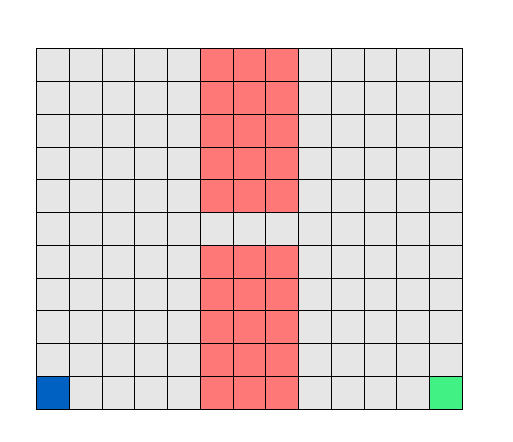

In [4]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_moat = gridworld_enviro.environment(world_size = 'small', world_type = 'moat')

# show the enviroment
small_moat.color_gridworld()


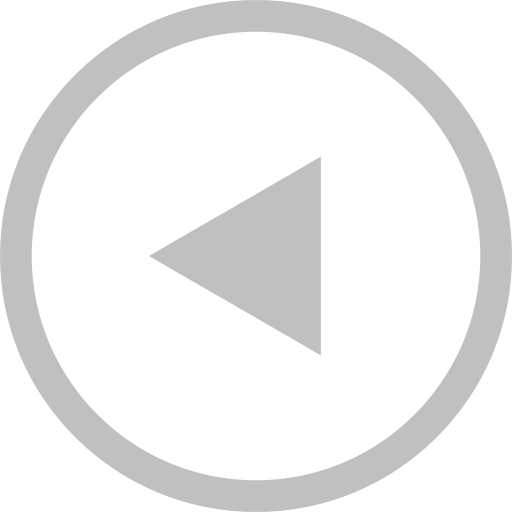
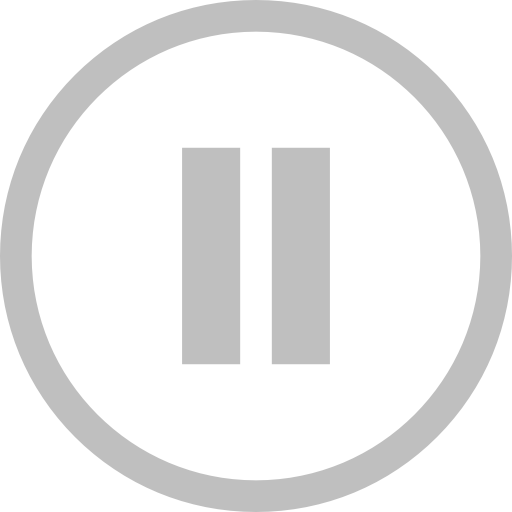
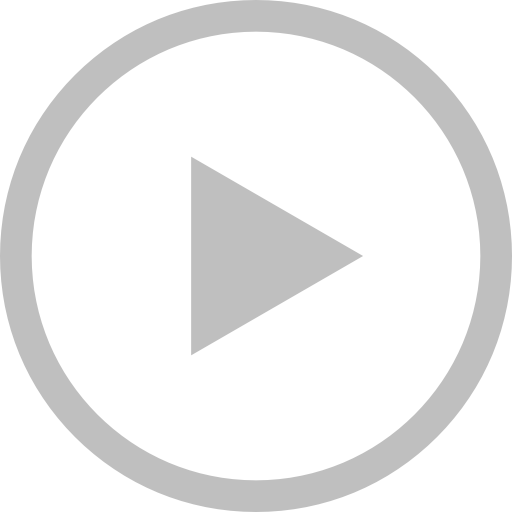
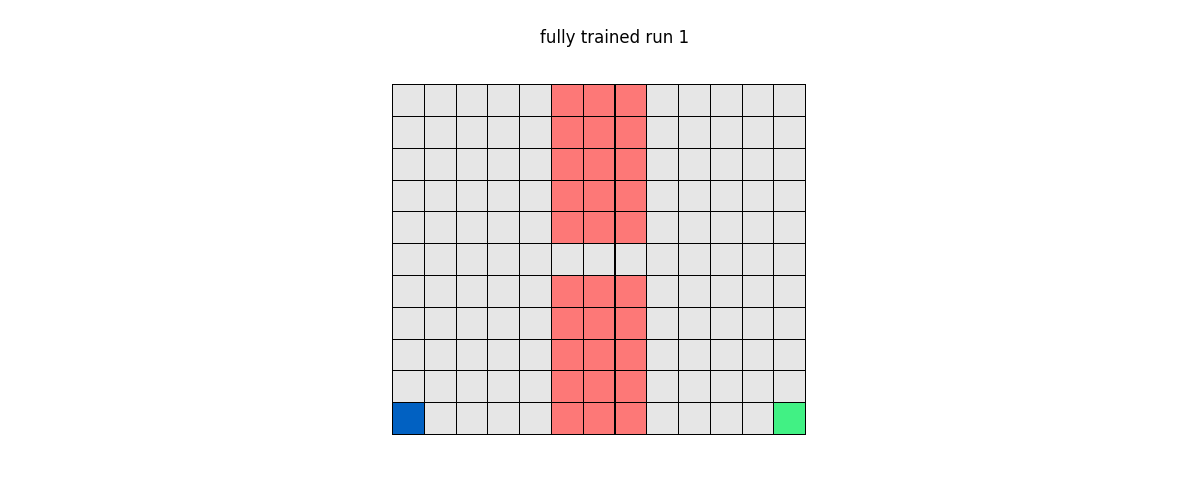
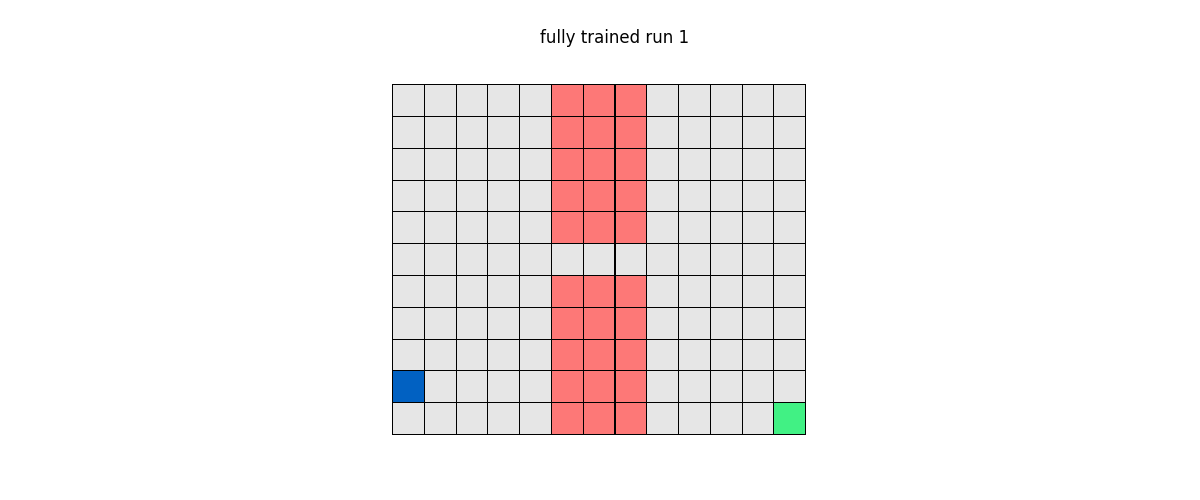
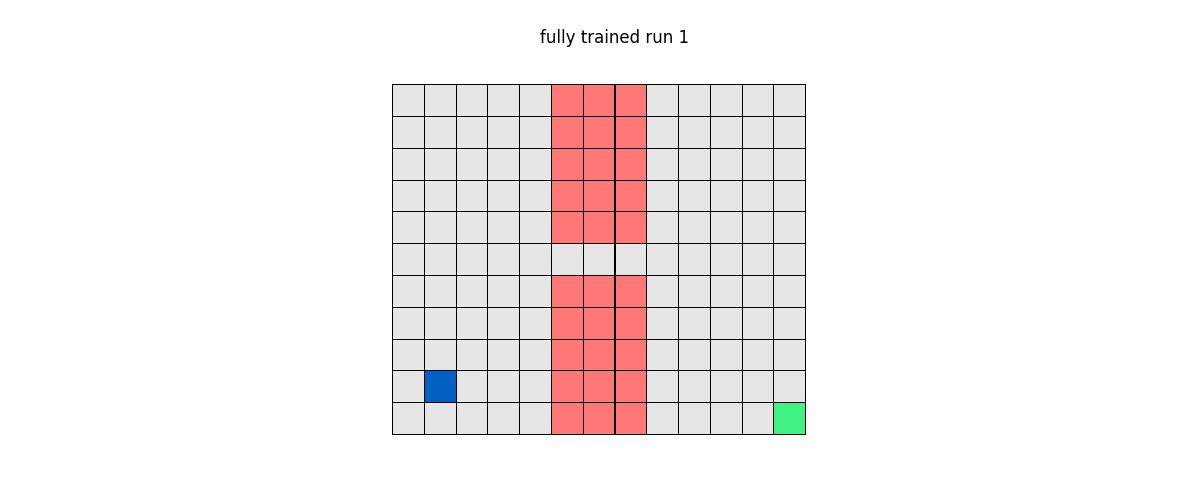
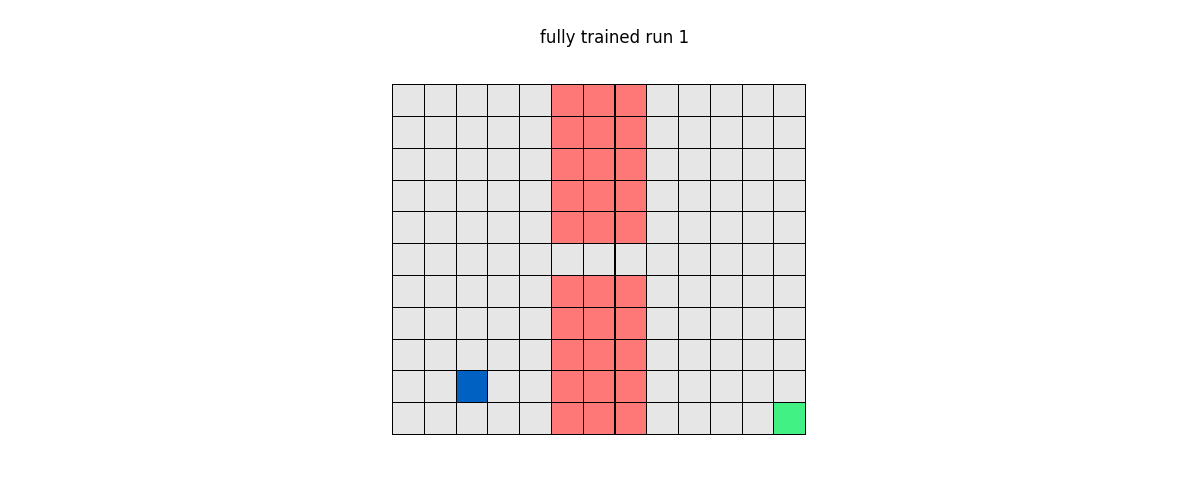
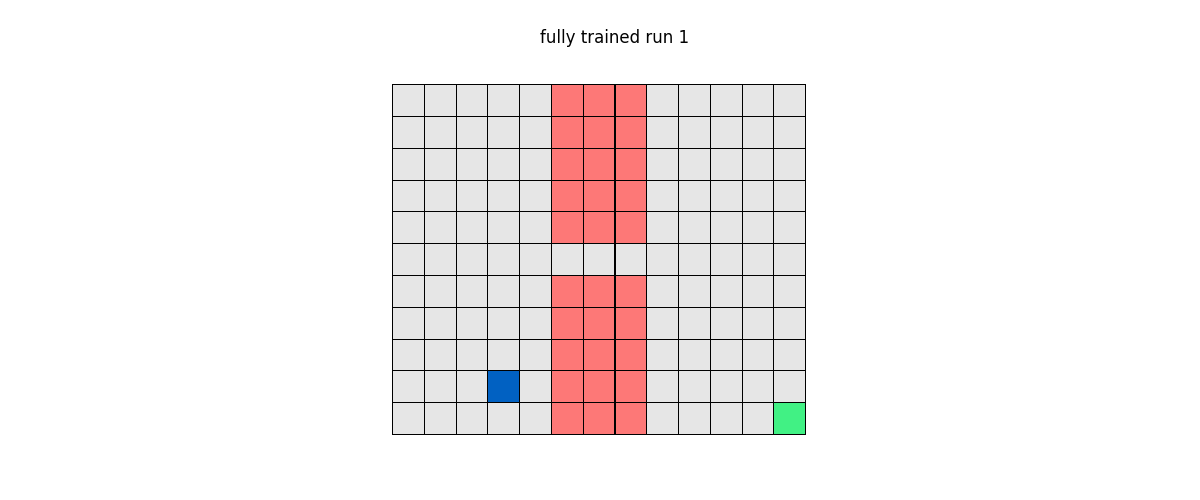
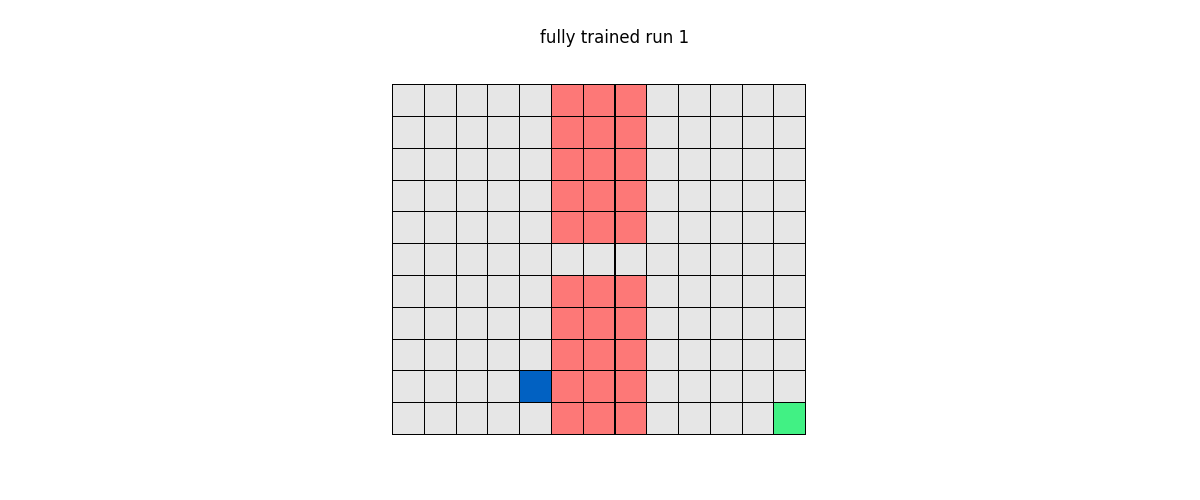
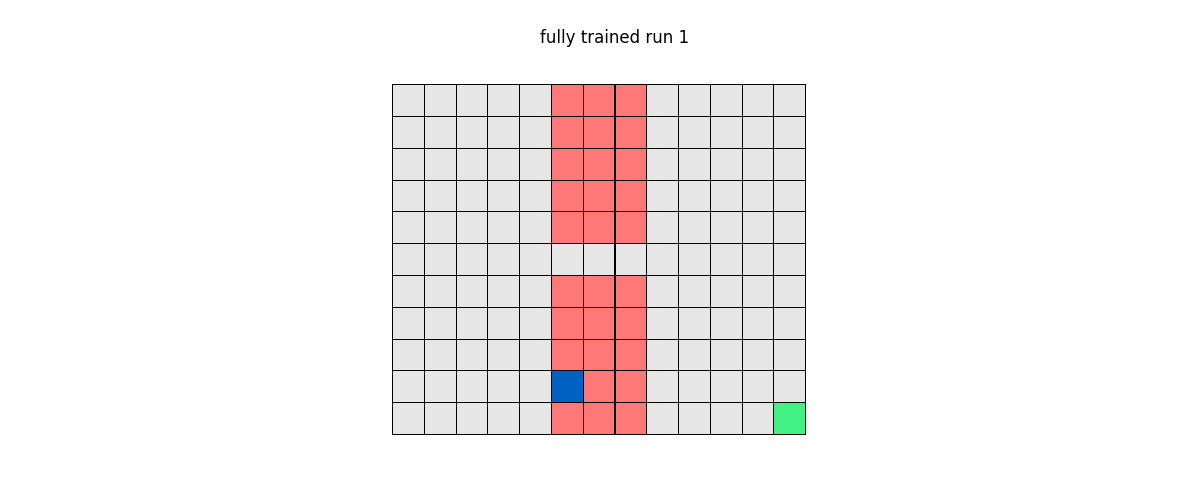
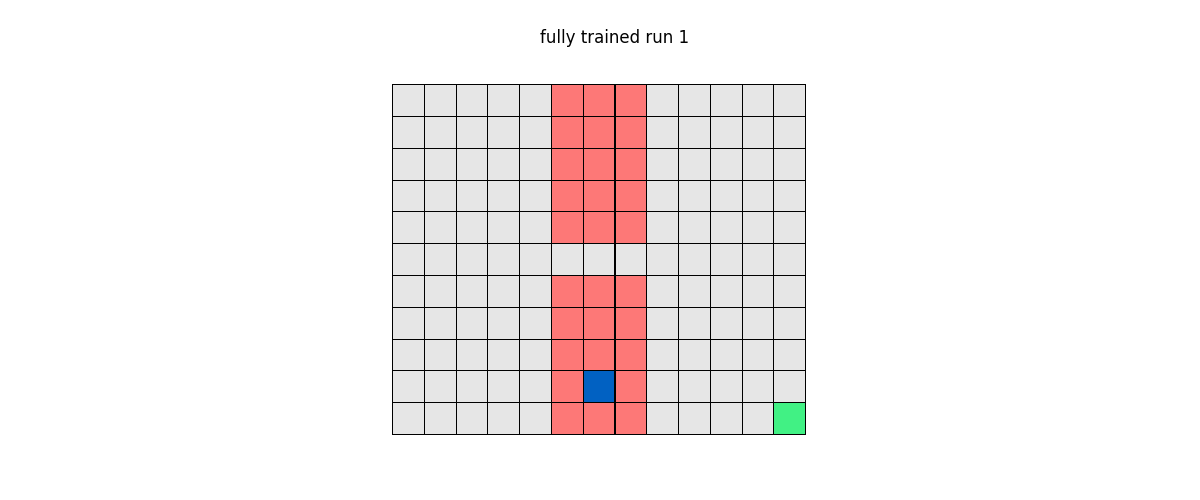
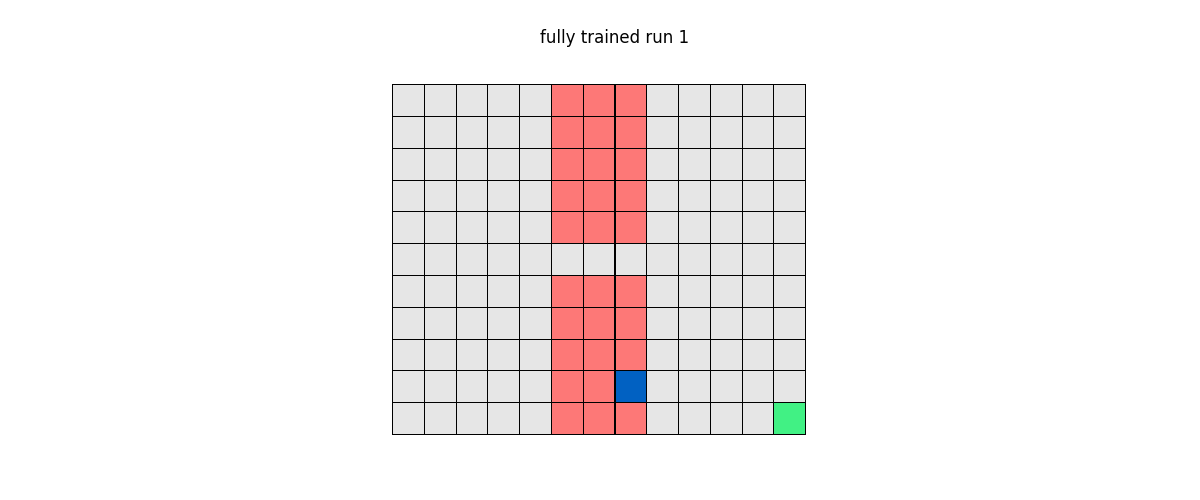
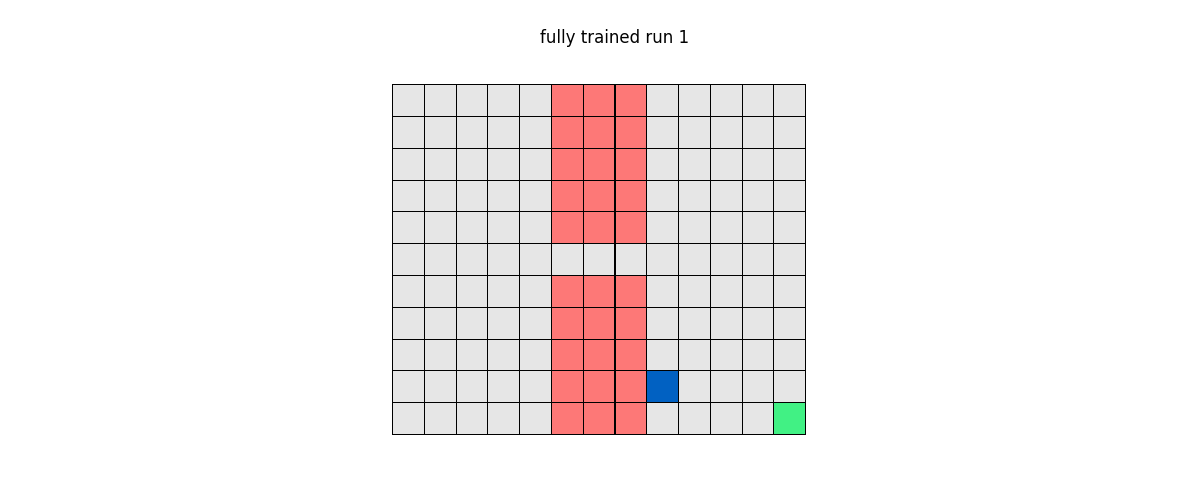
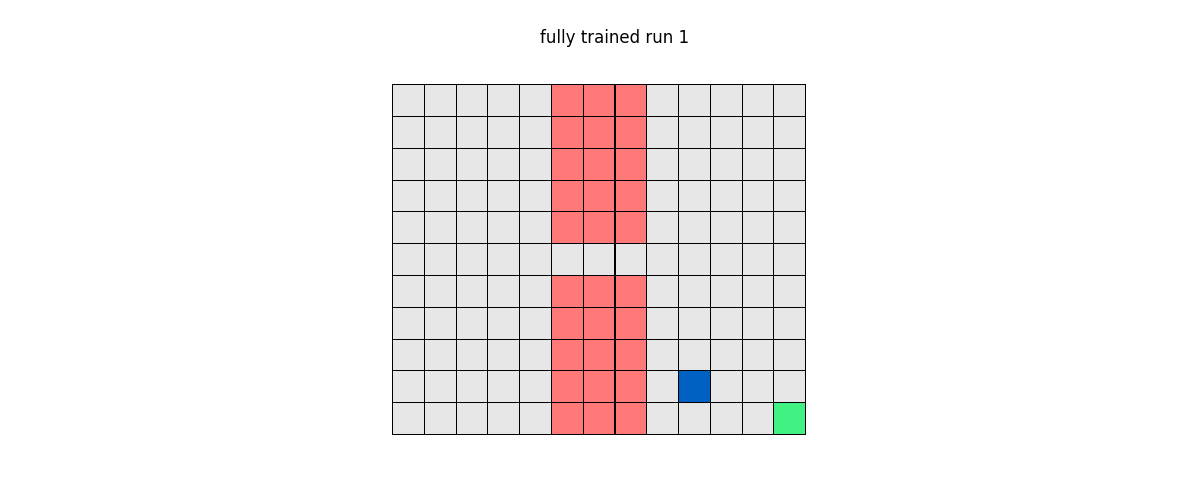
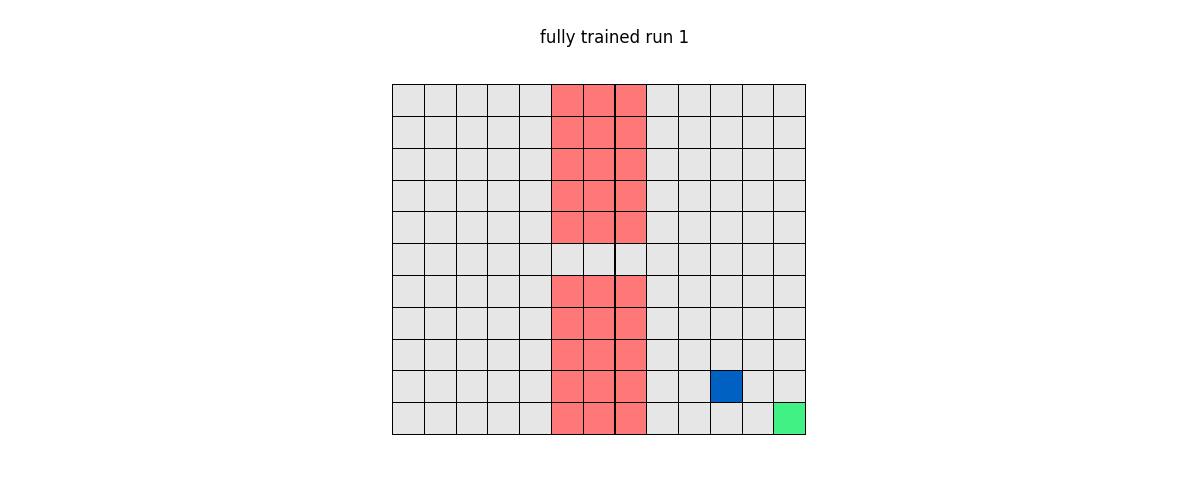
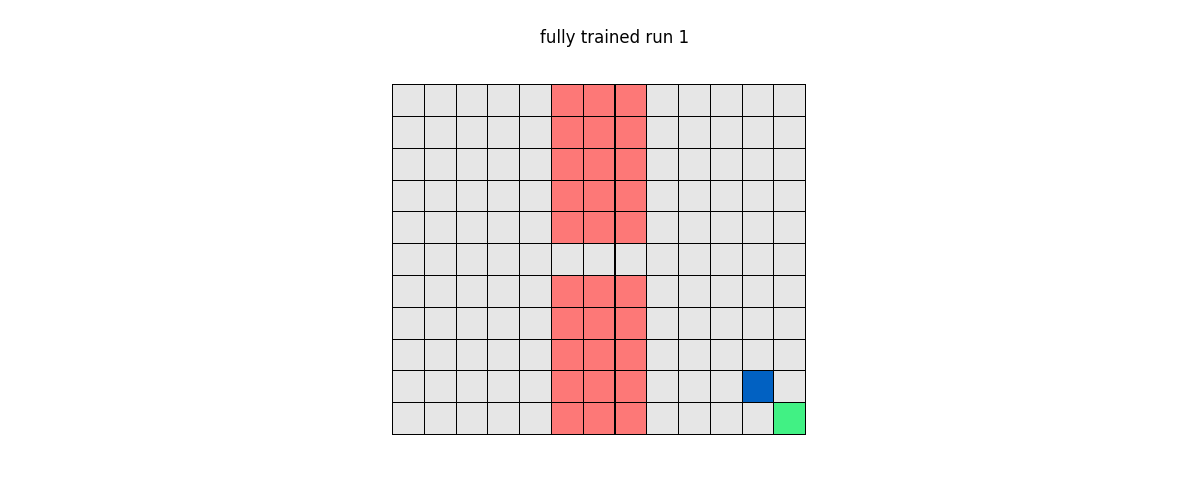
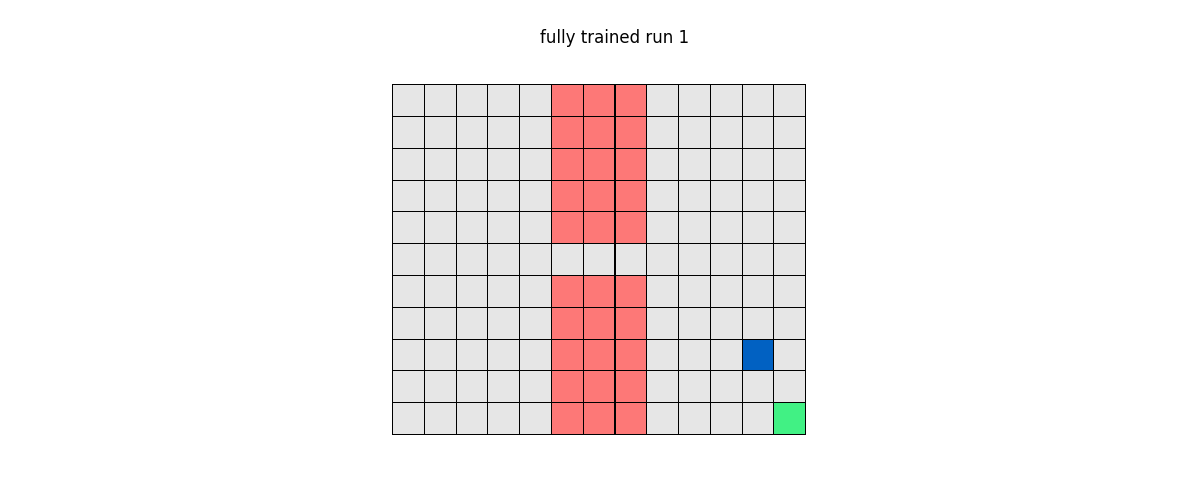
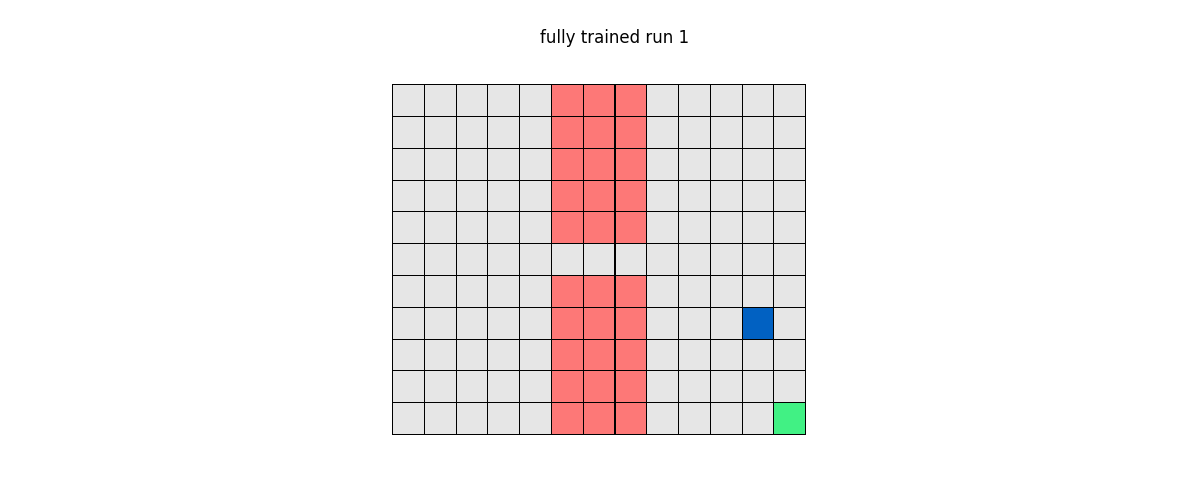
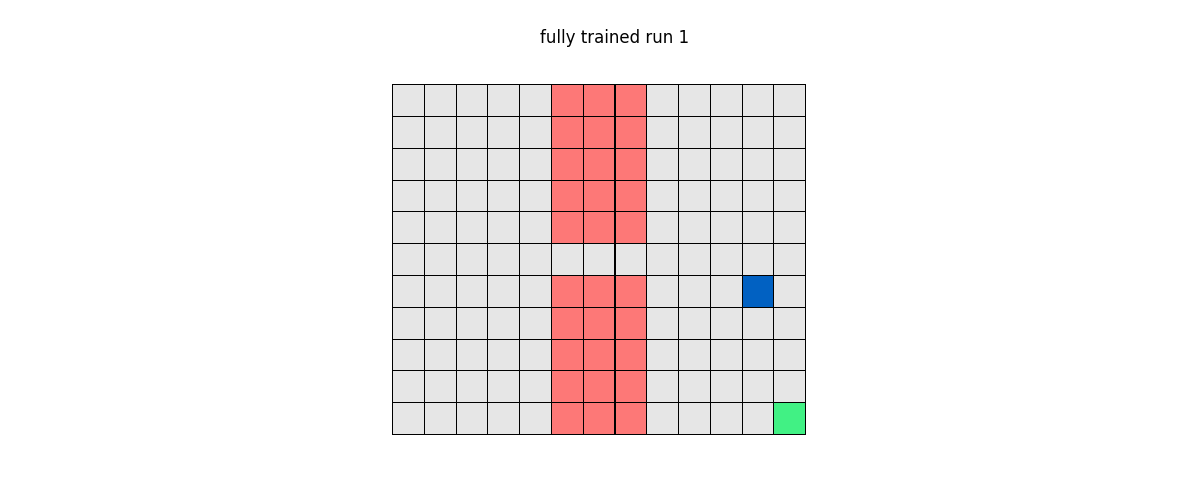
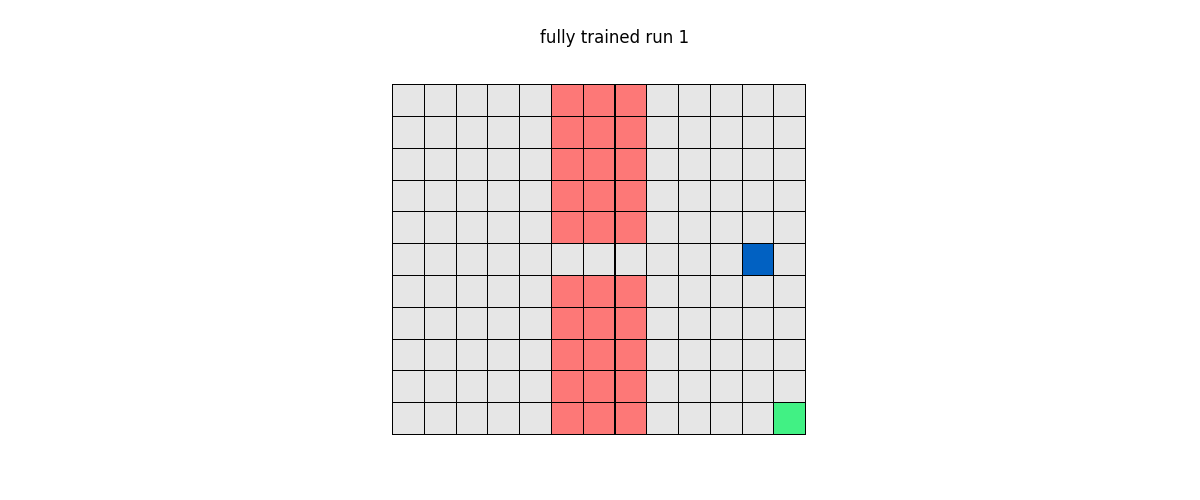
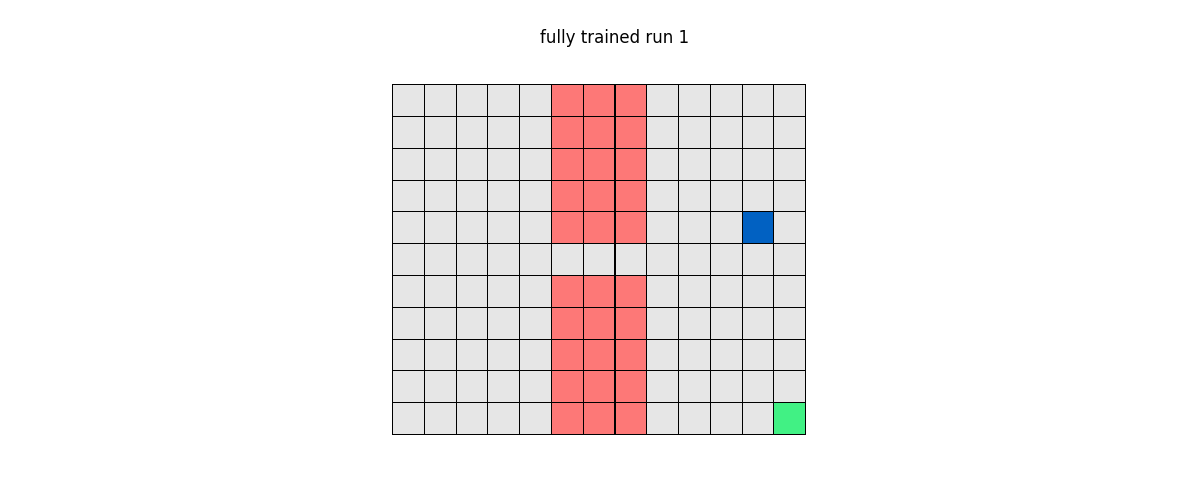
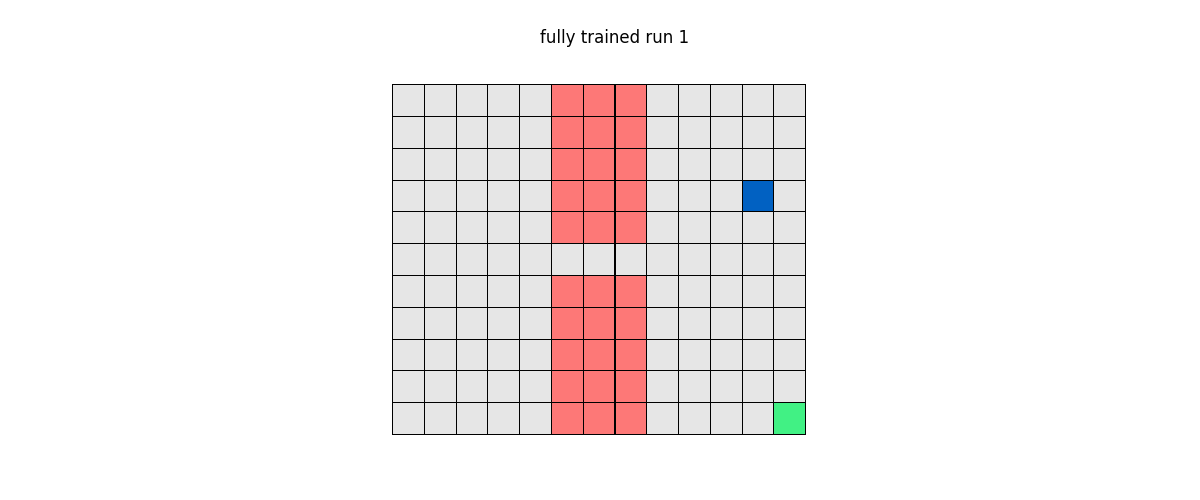
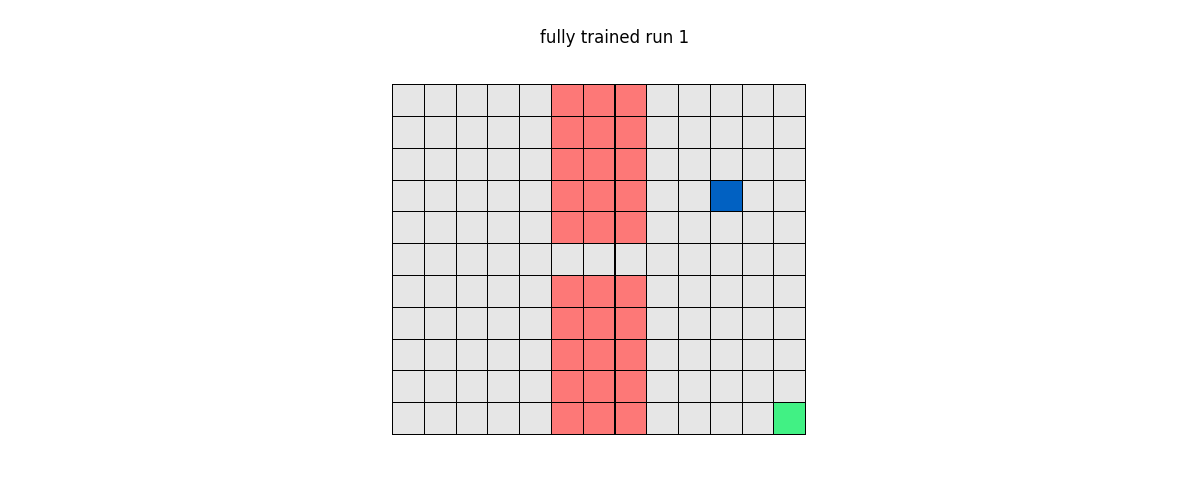
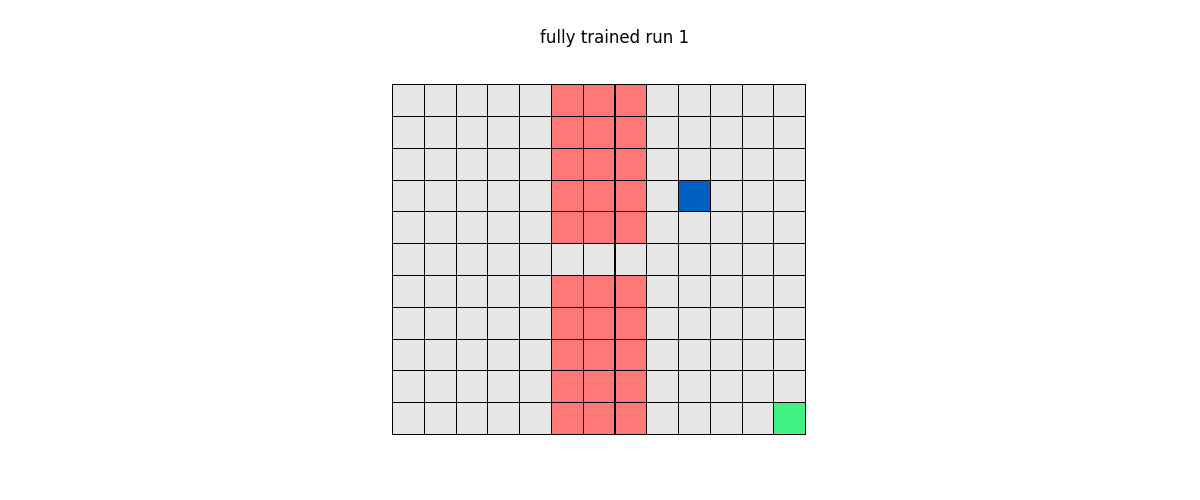
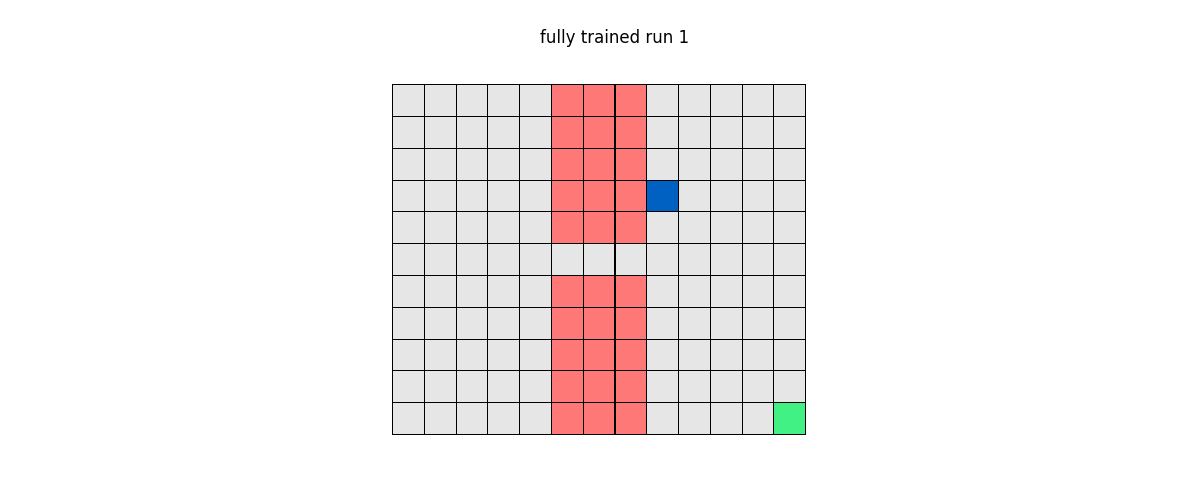
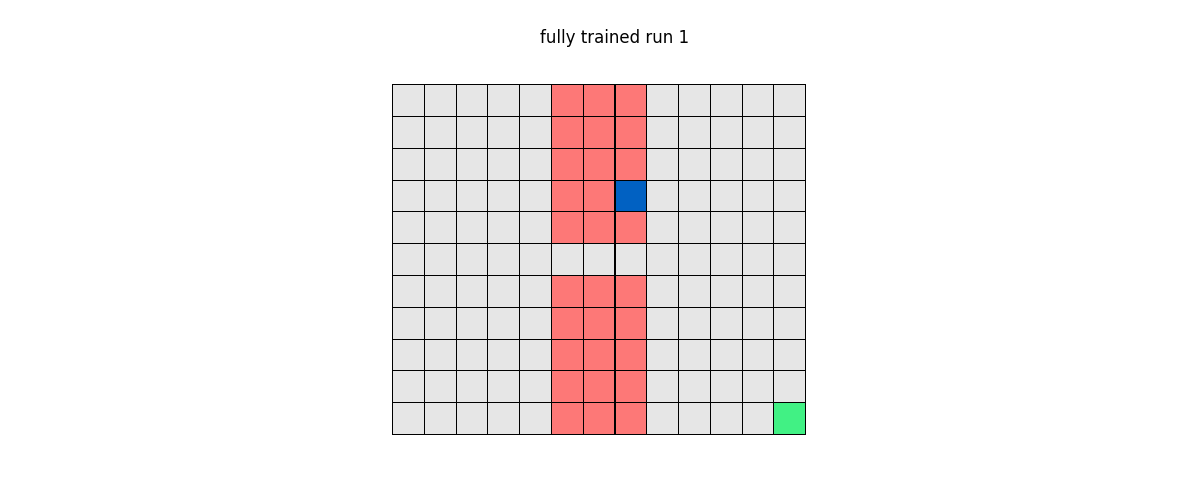
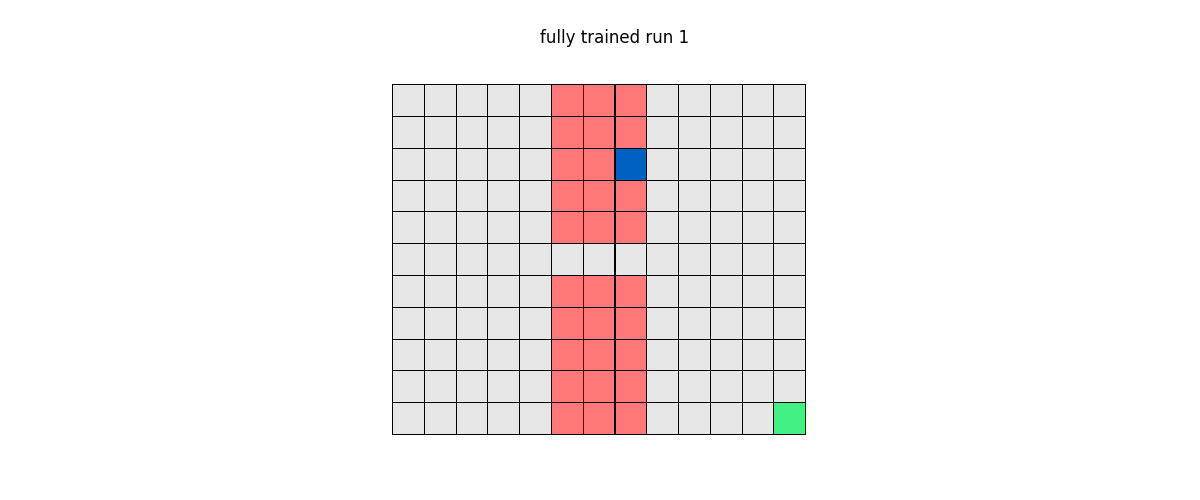
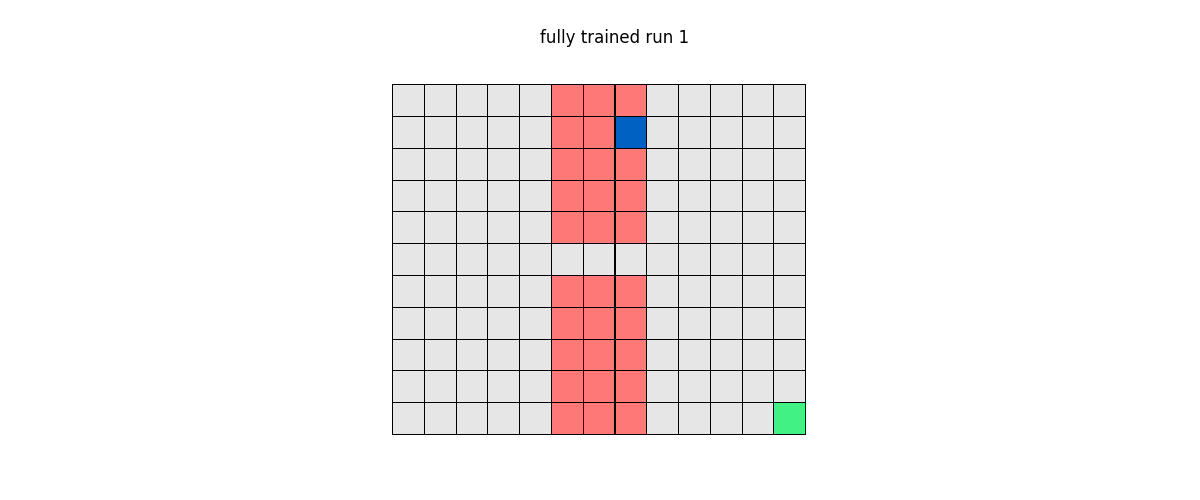
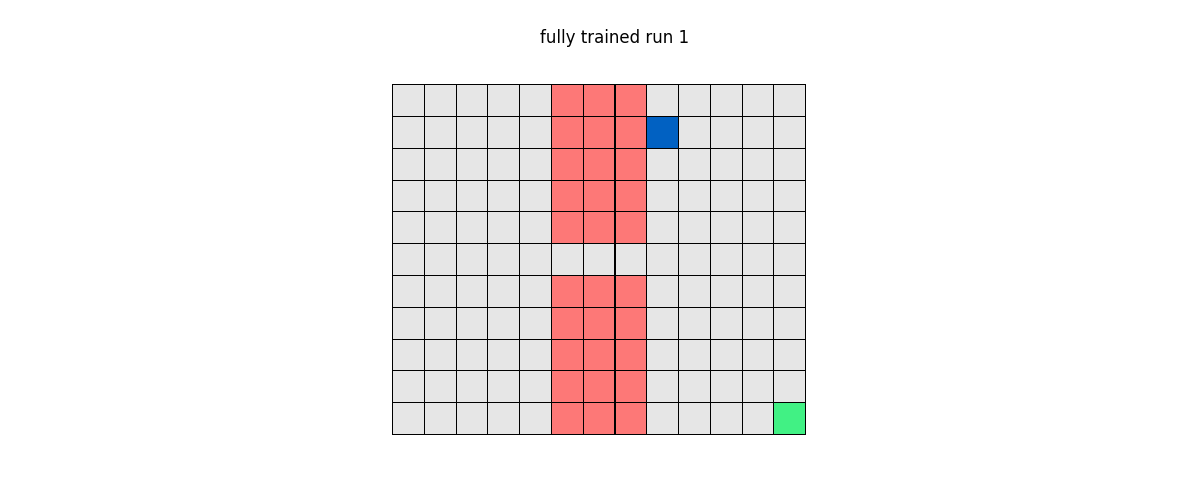
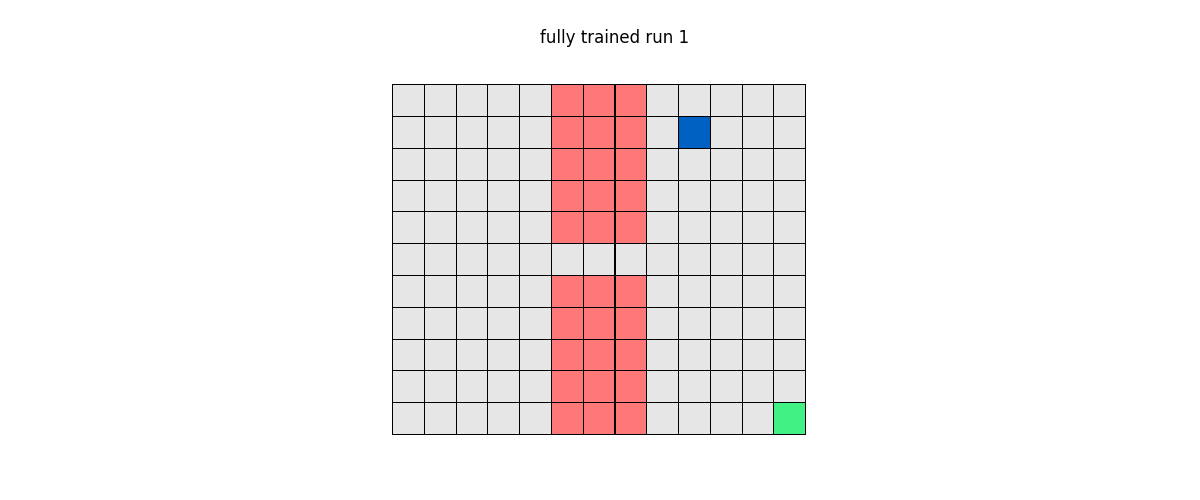
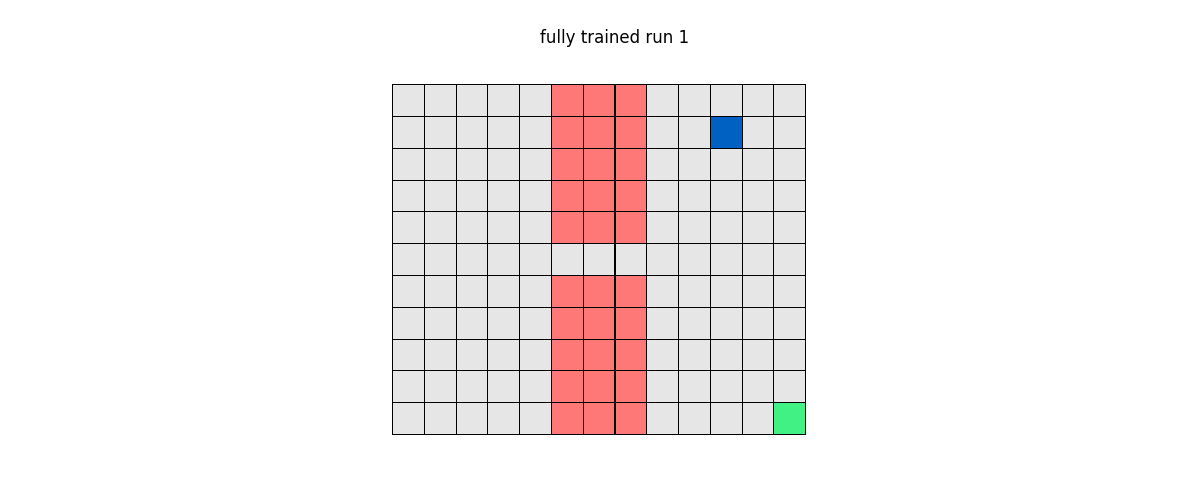
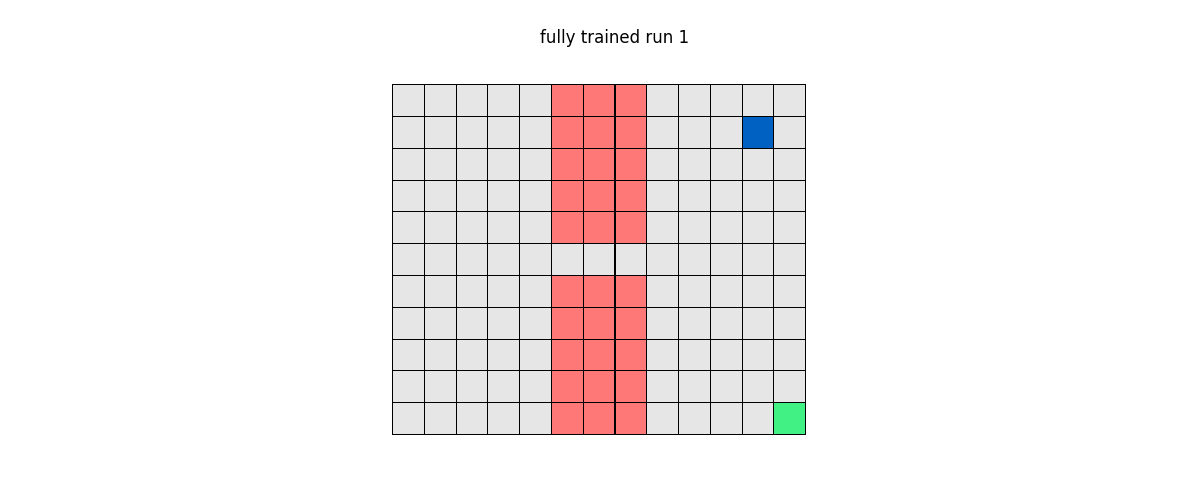
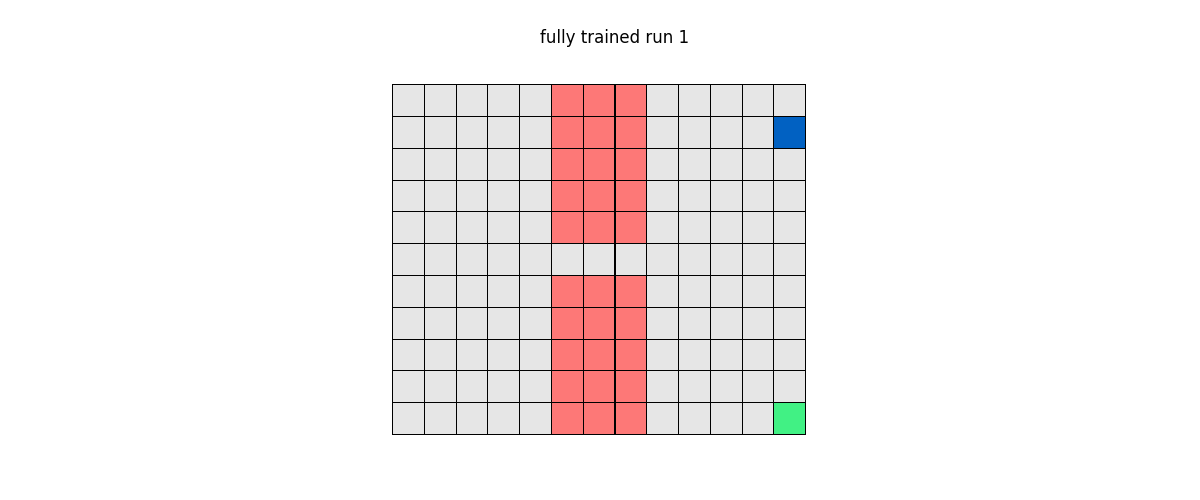
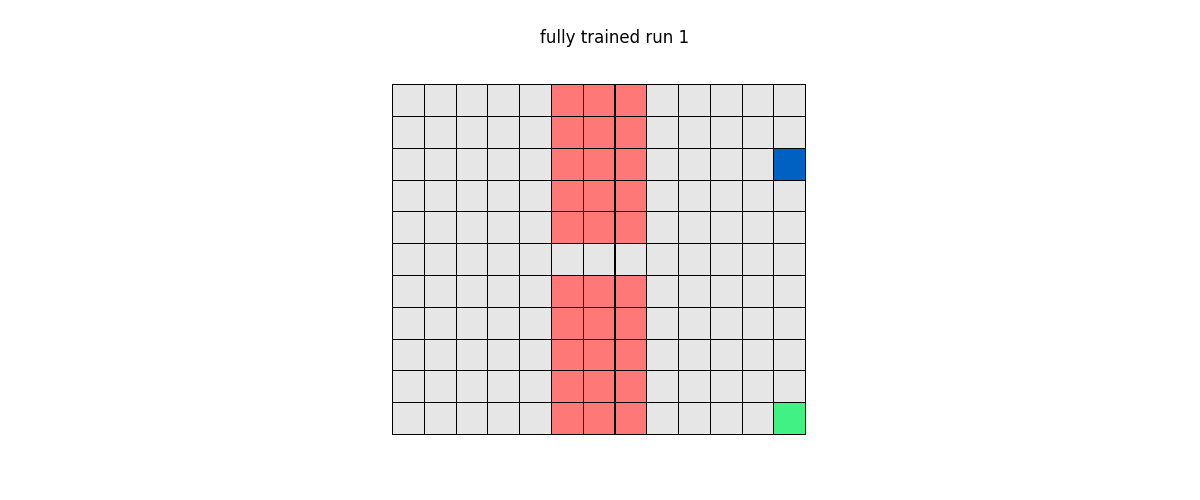
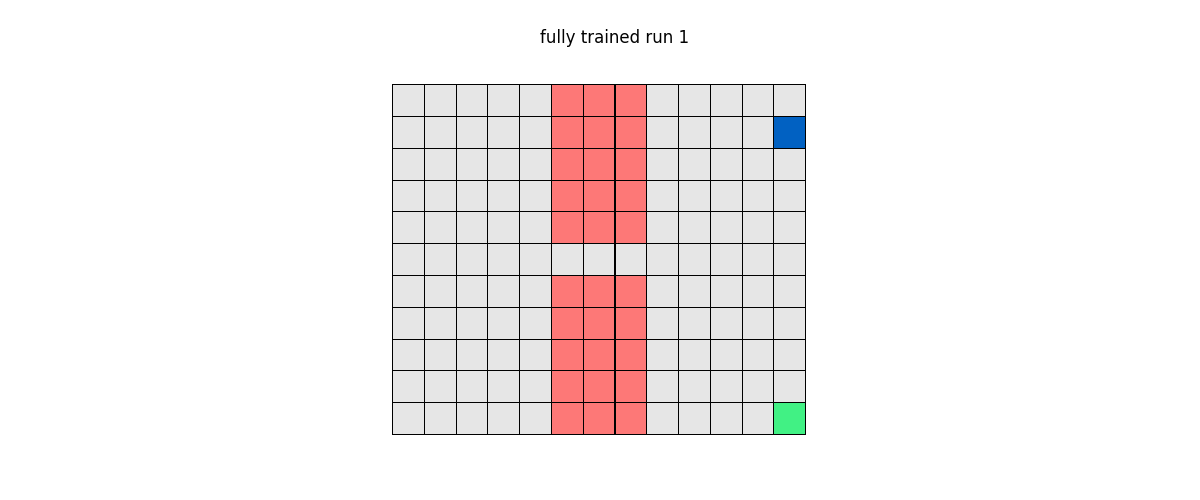
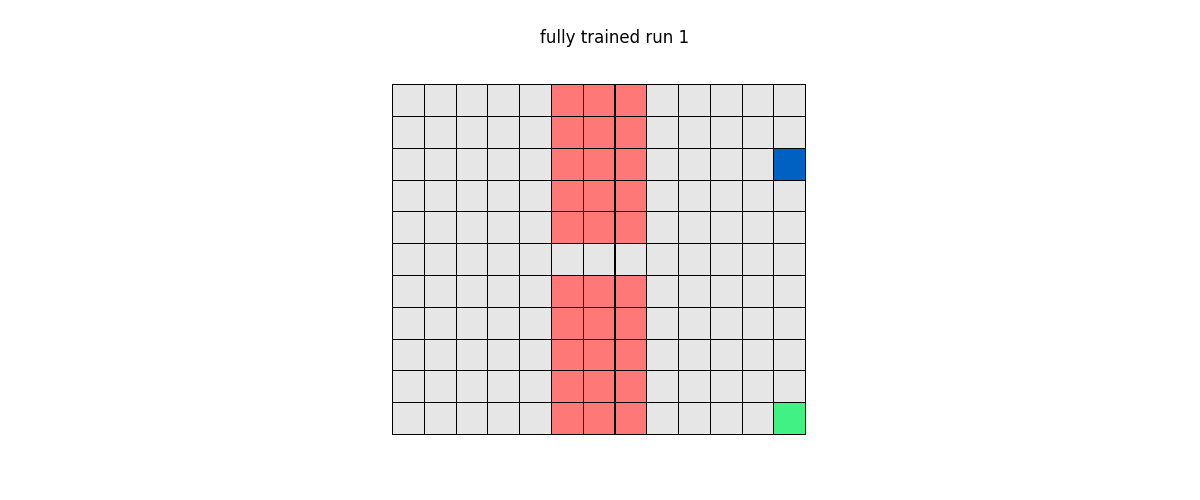
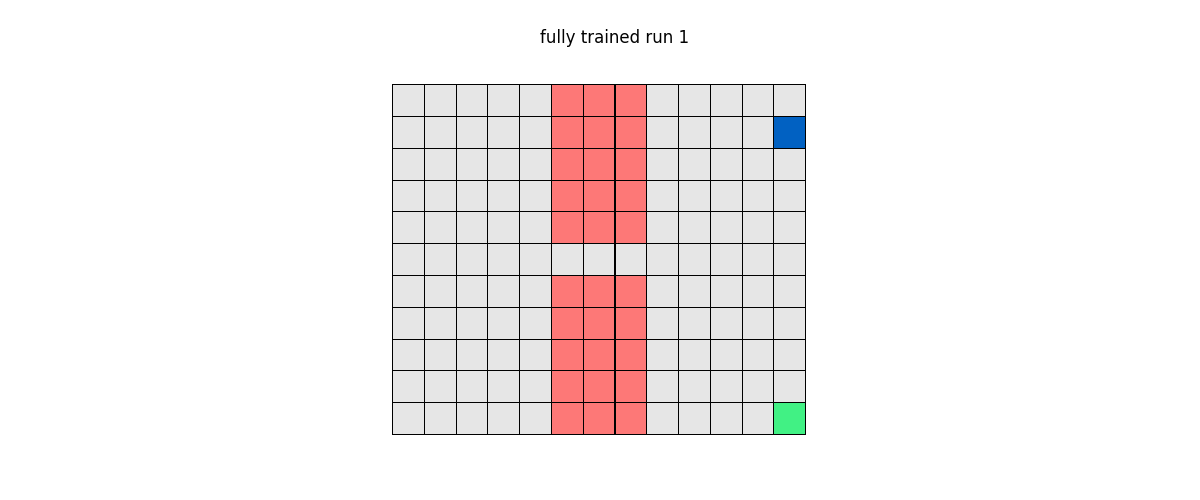
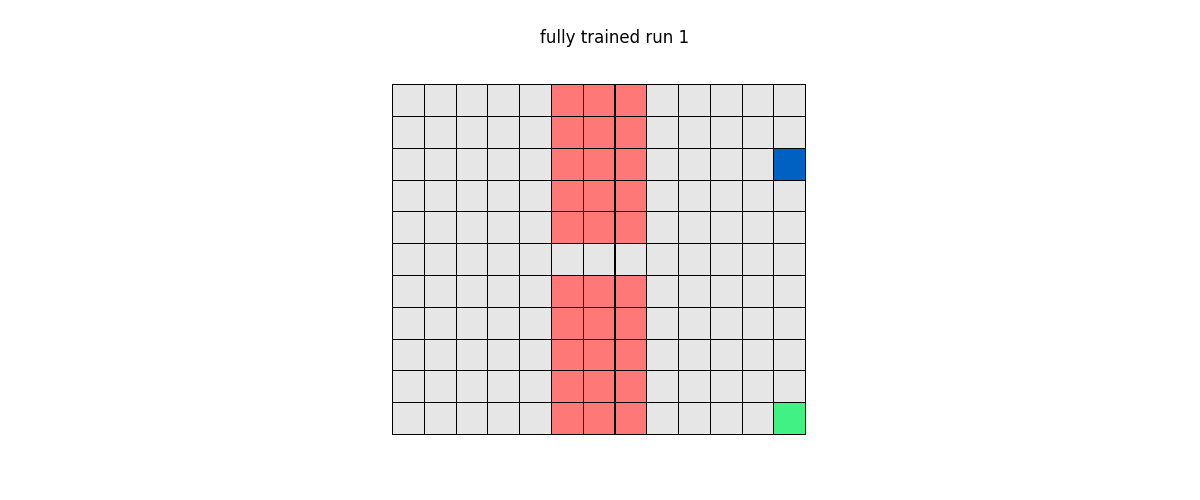
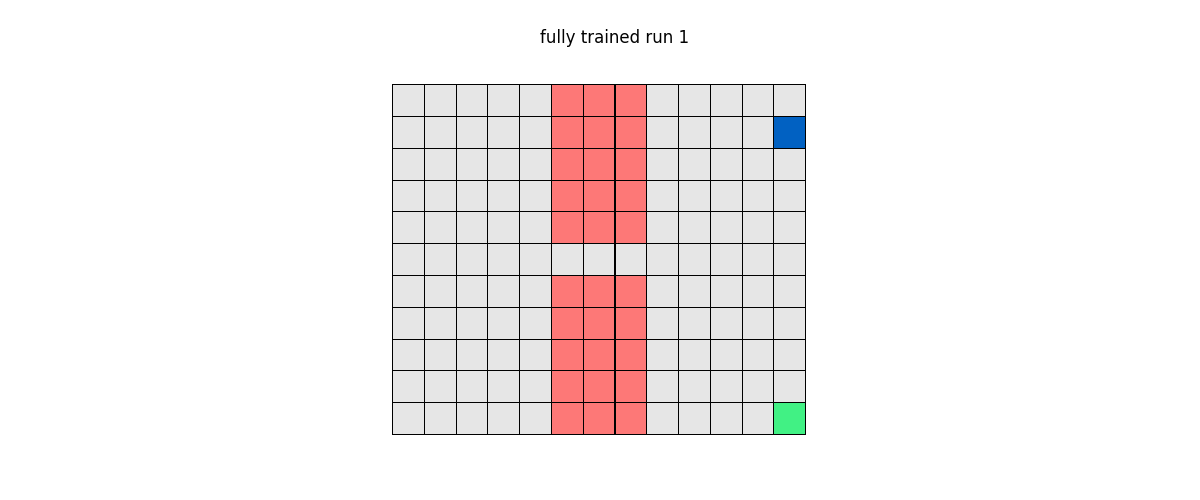
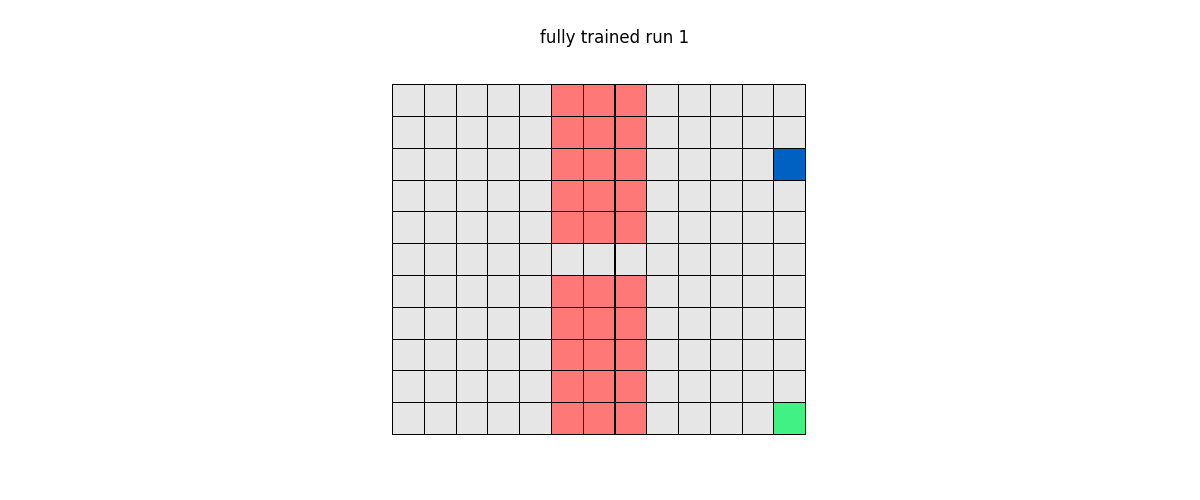
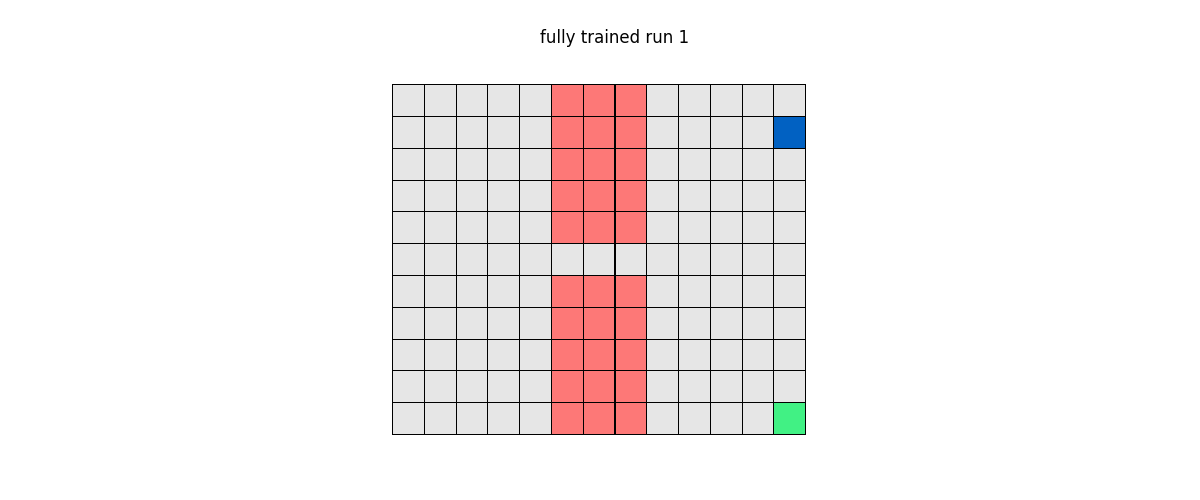
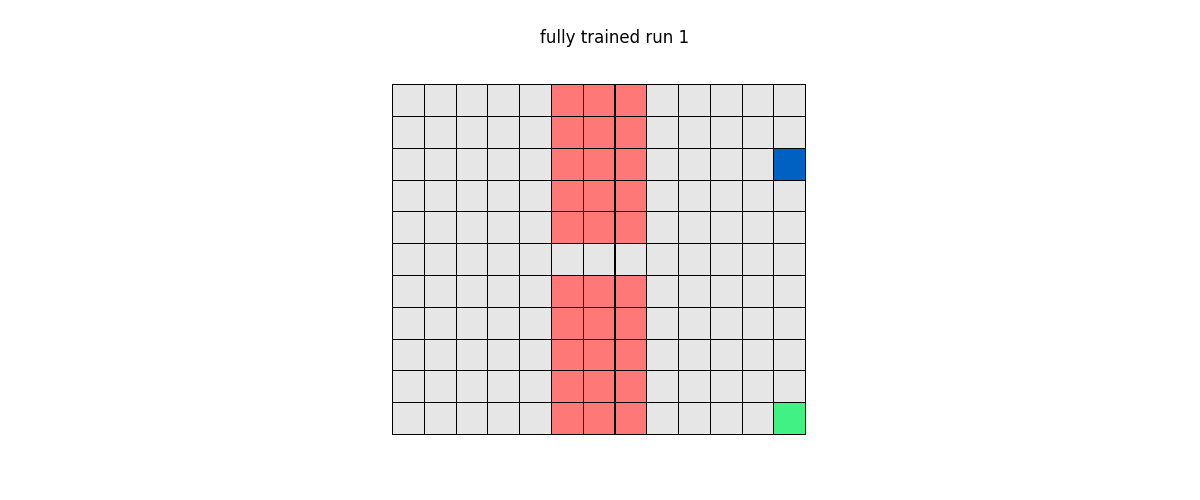
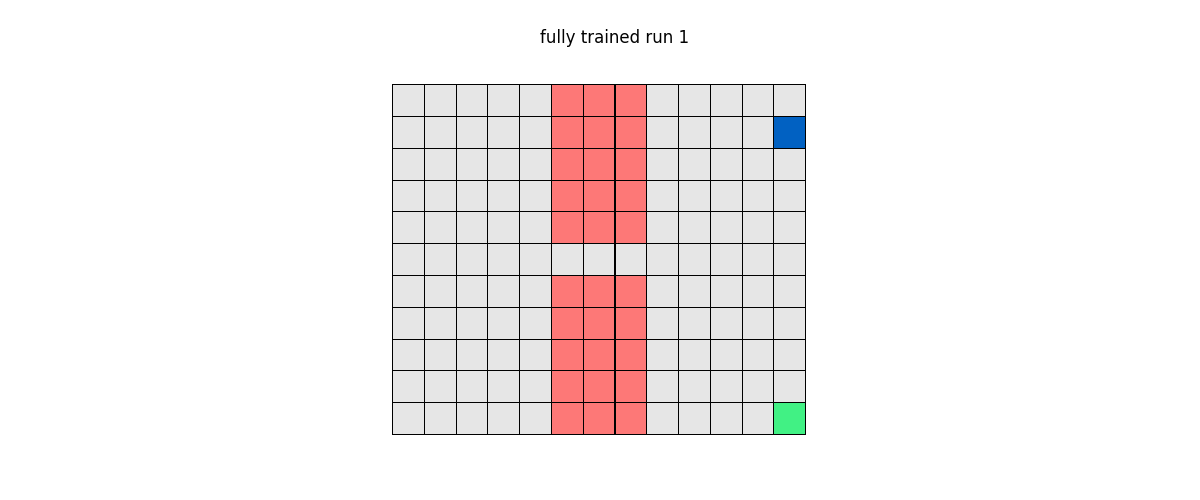
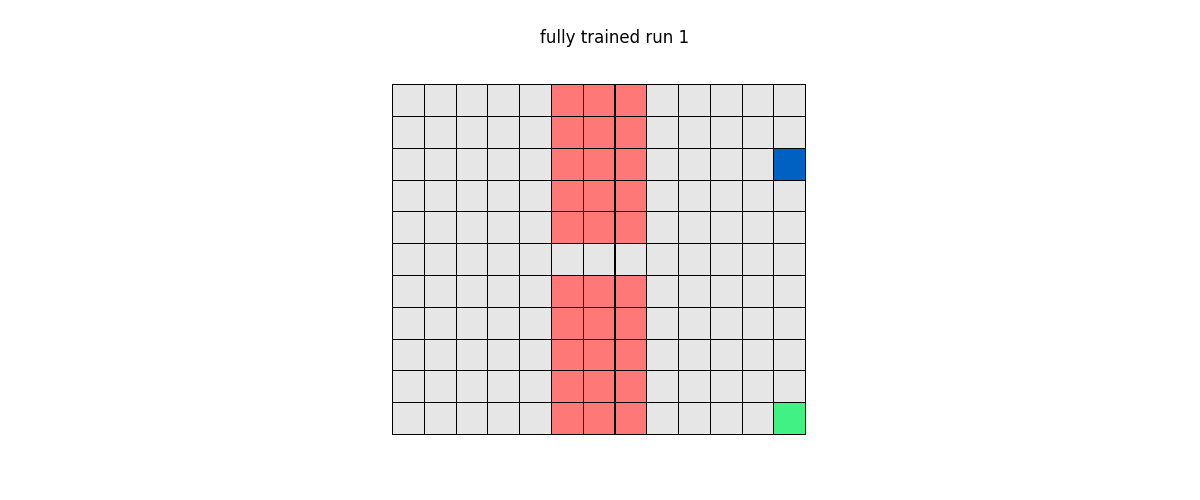
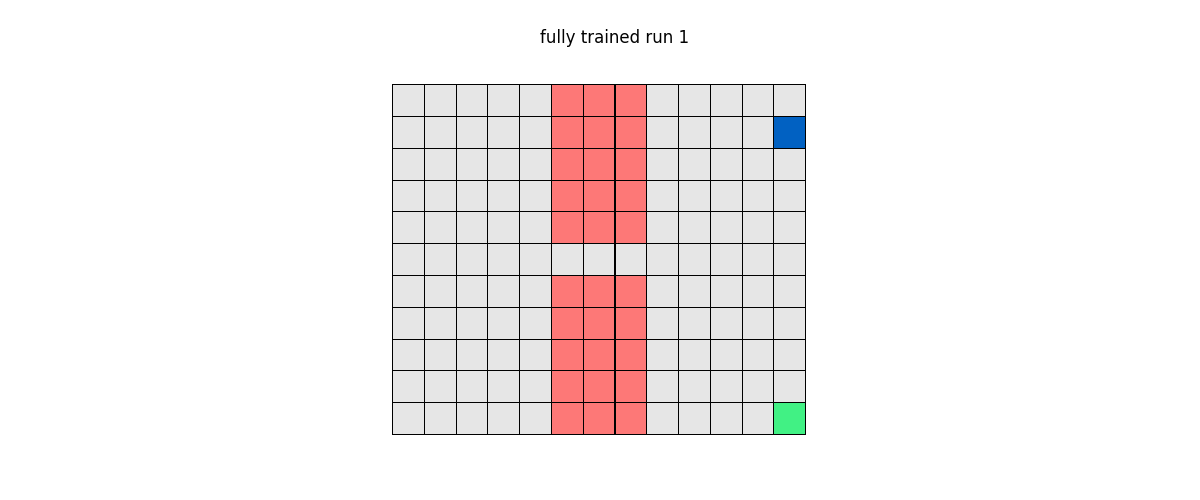
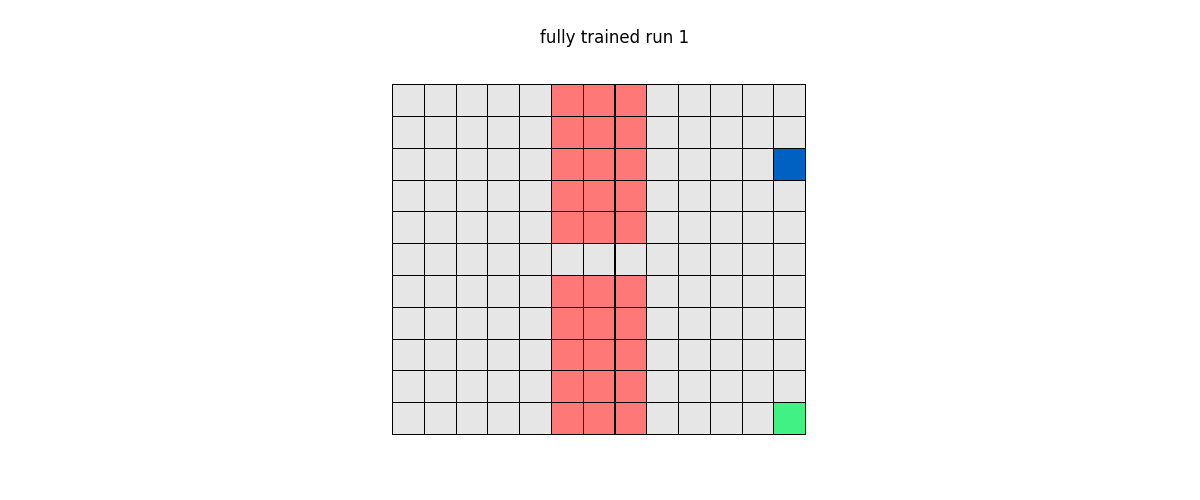
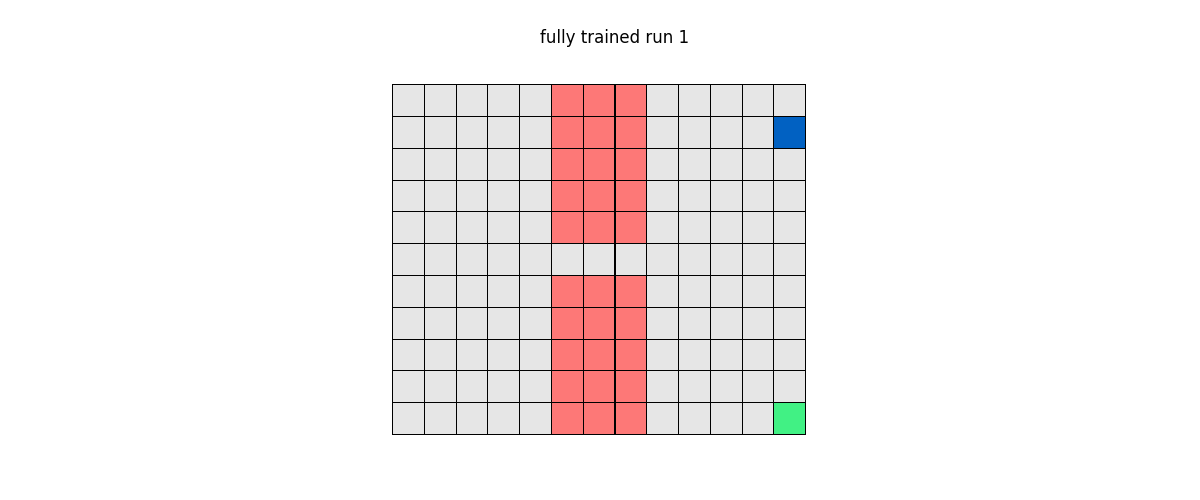
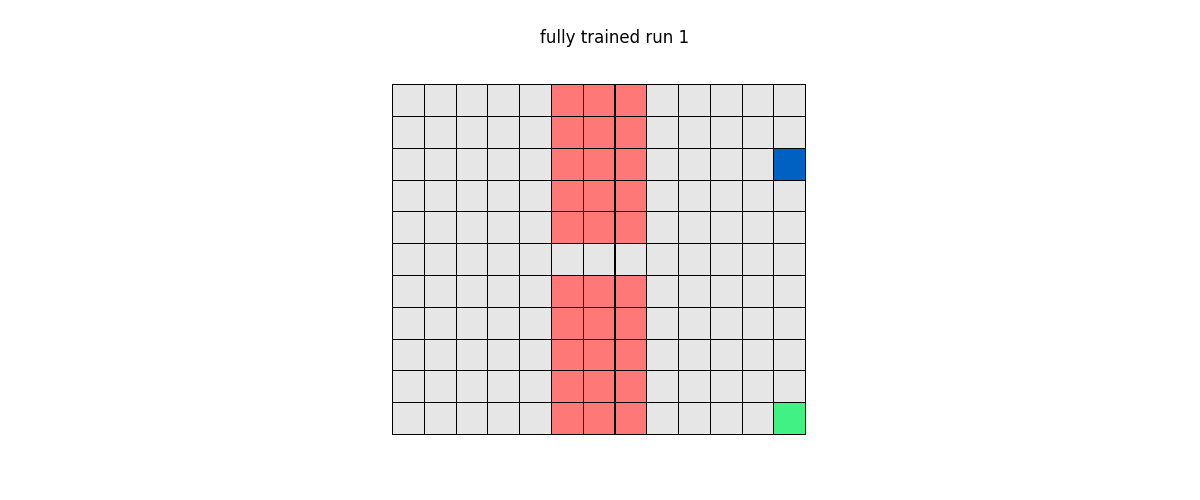
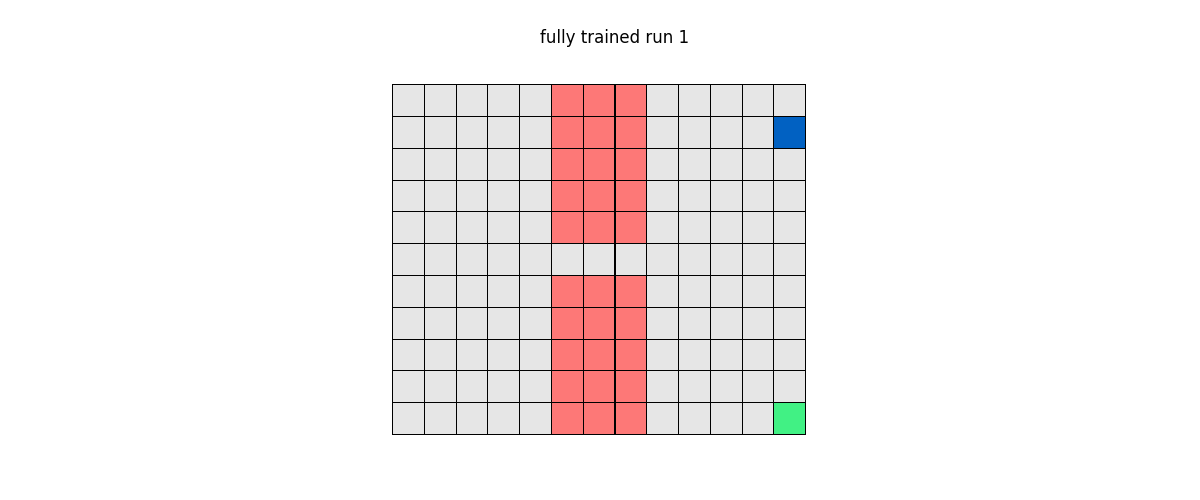
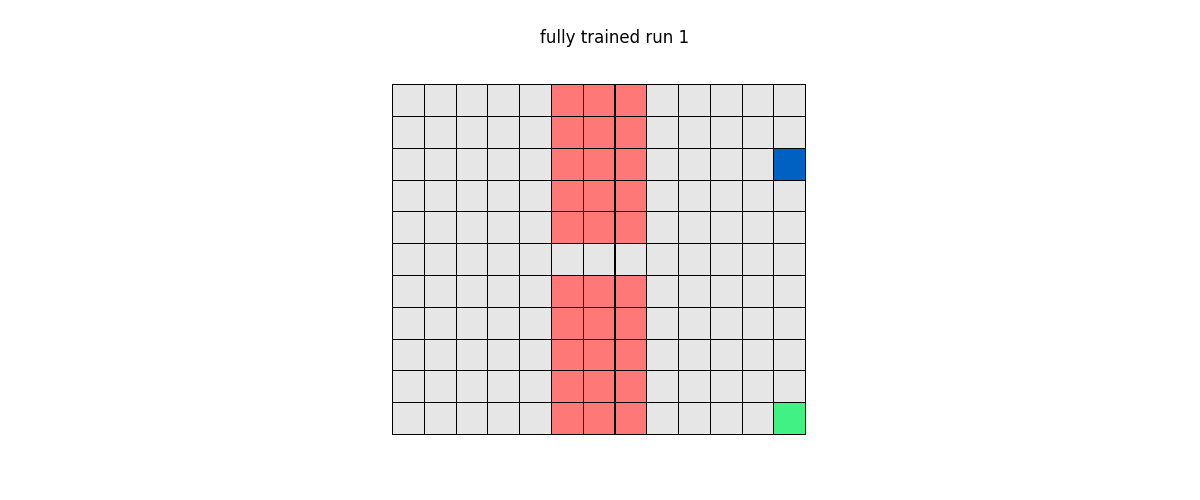
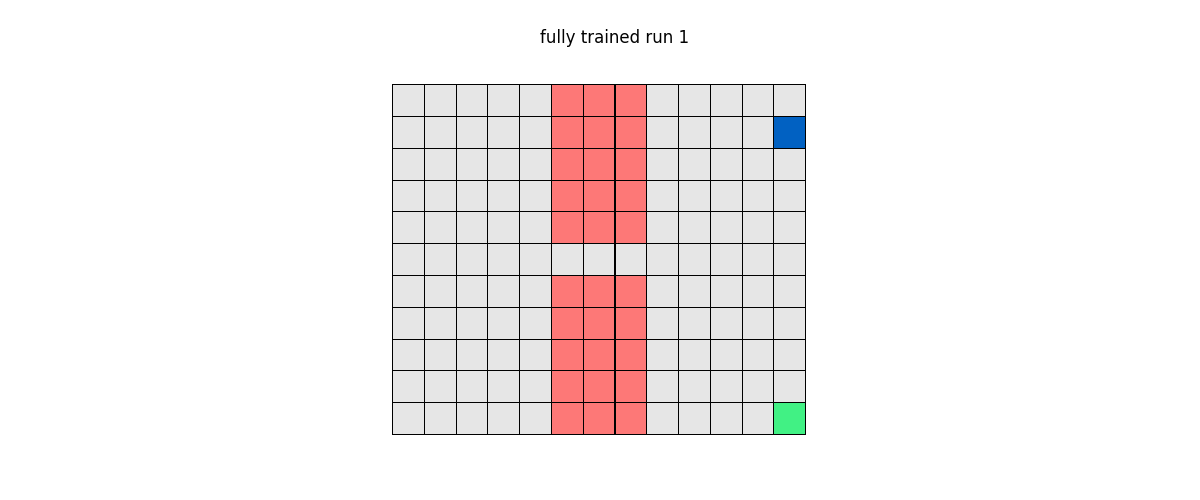
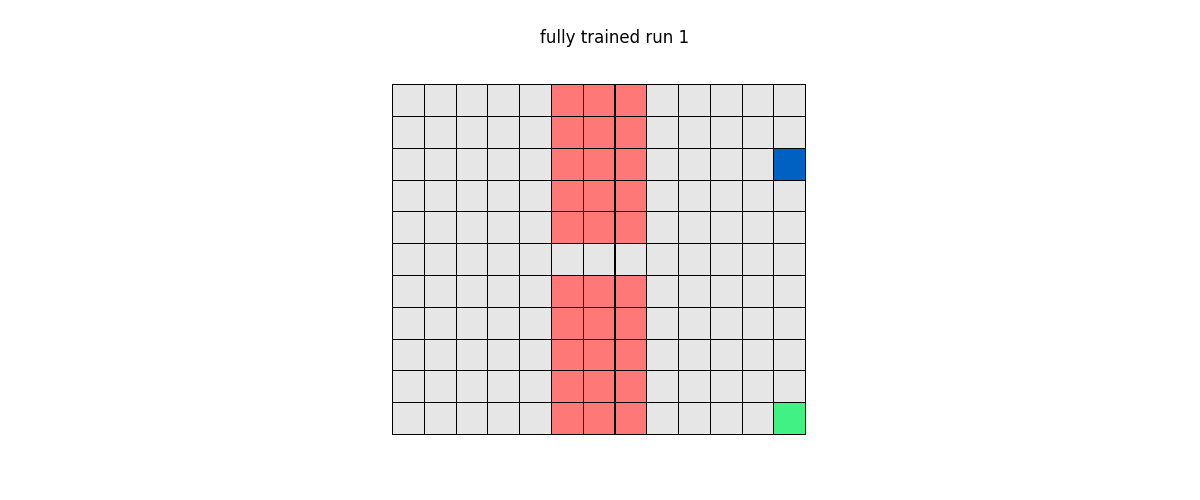
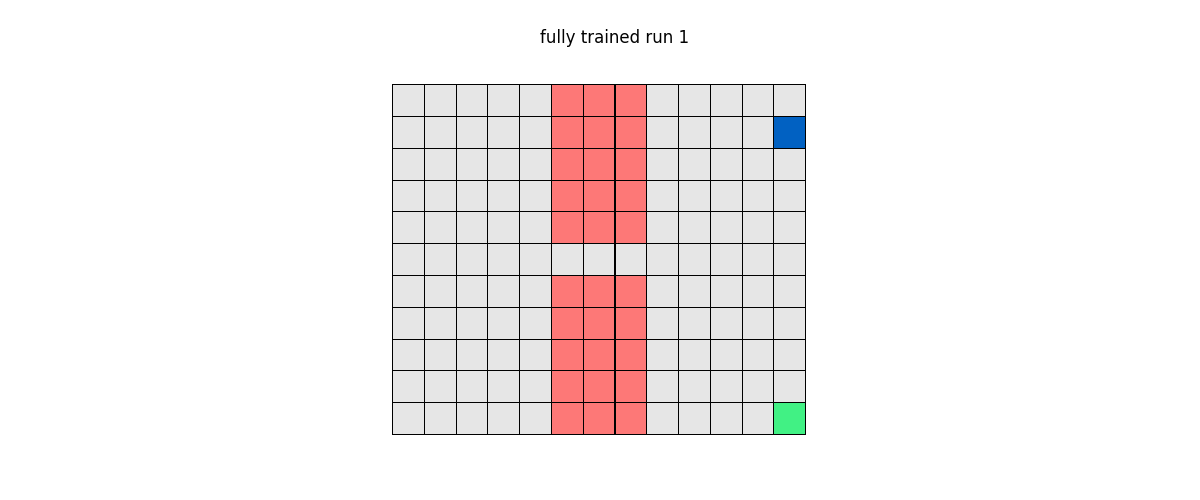
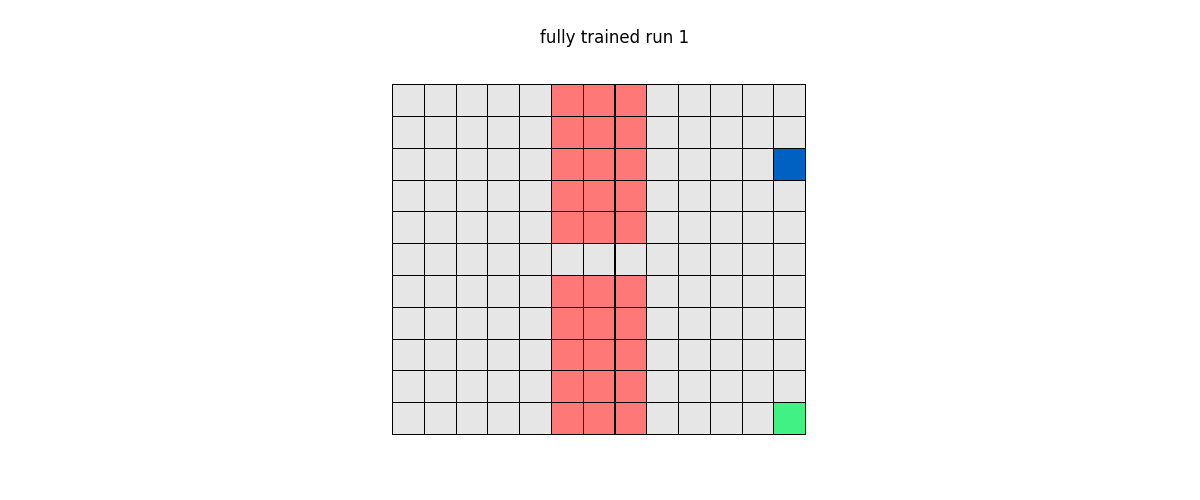
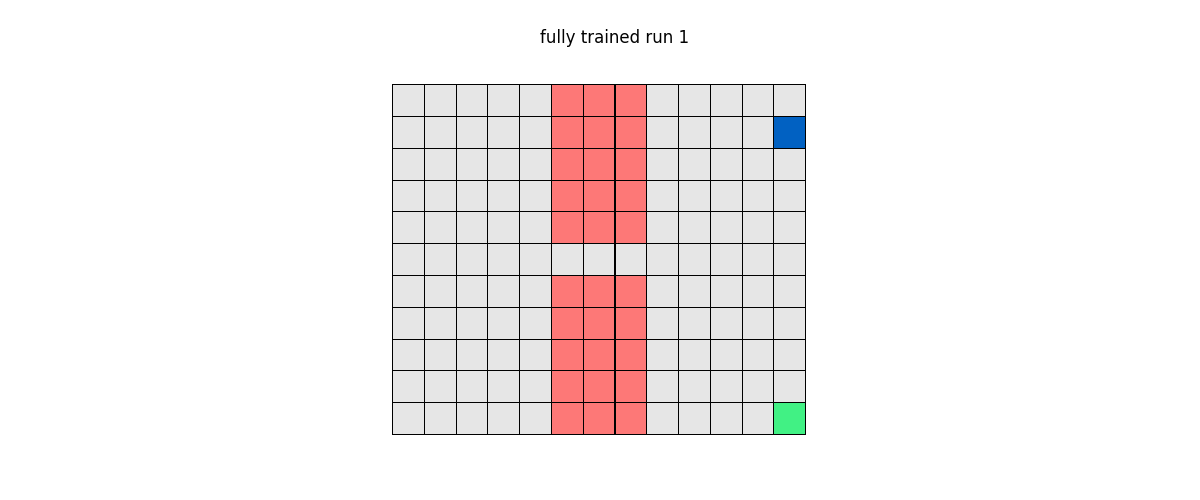
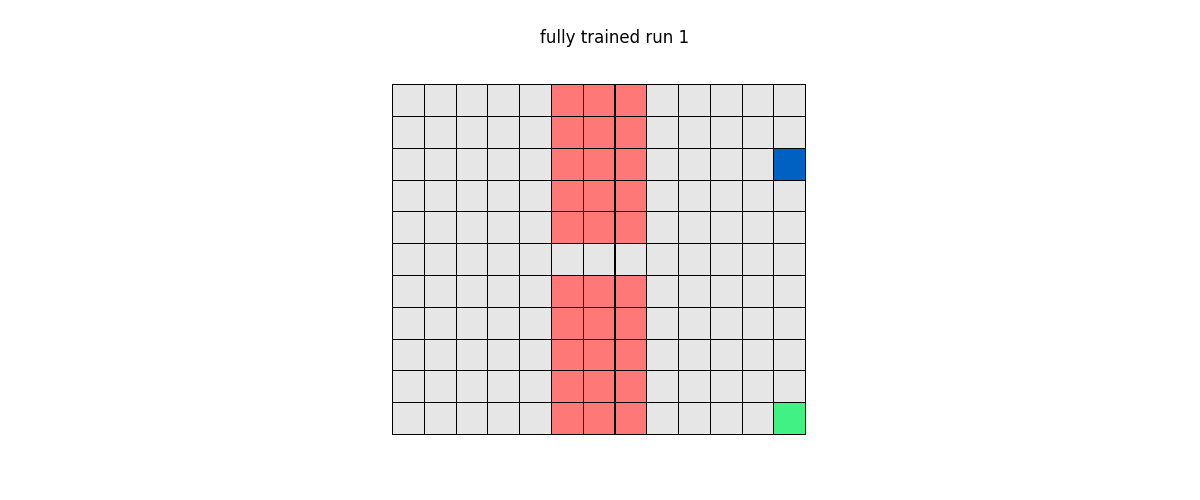
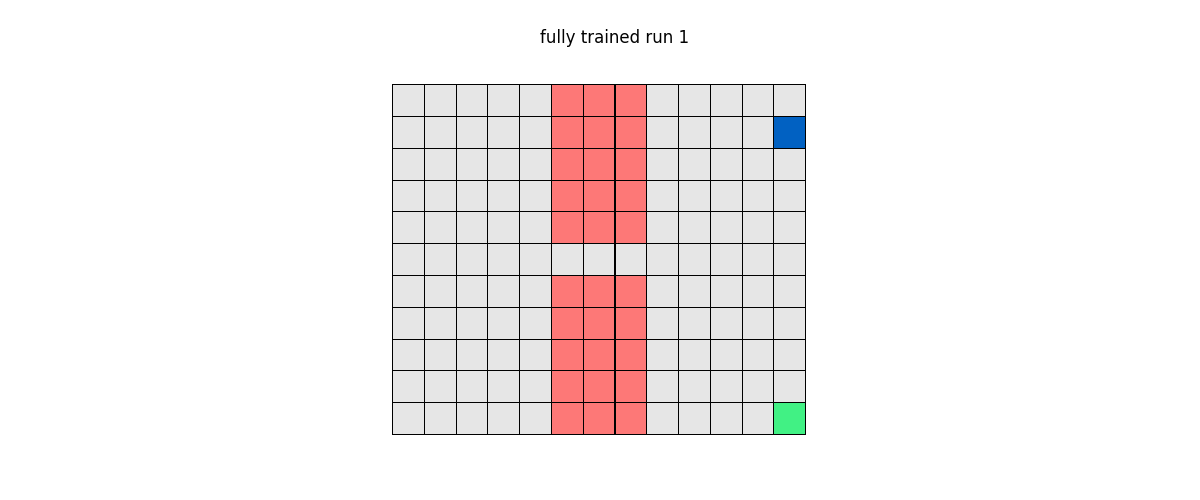
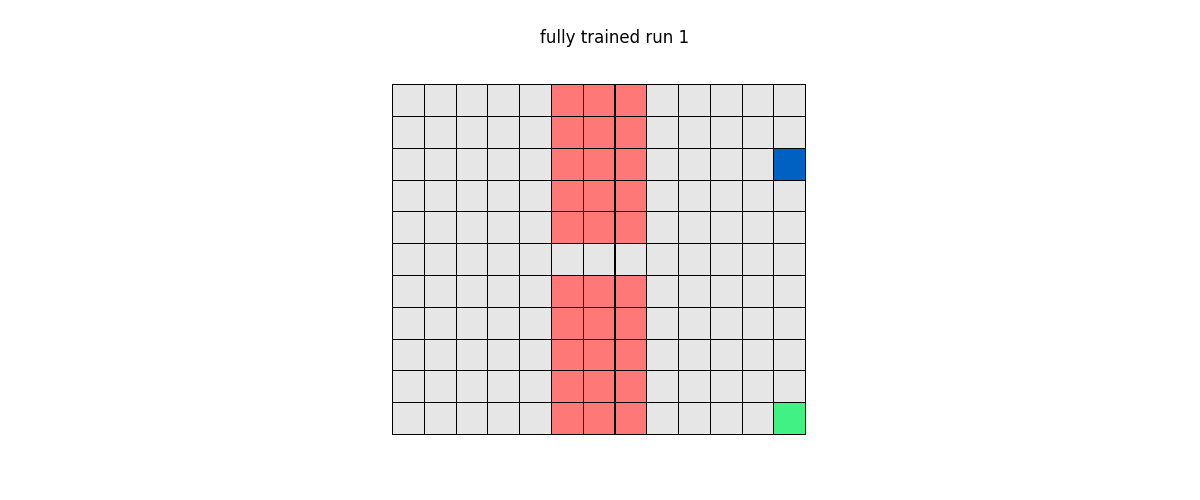
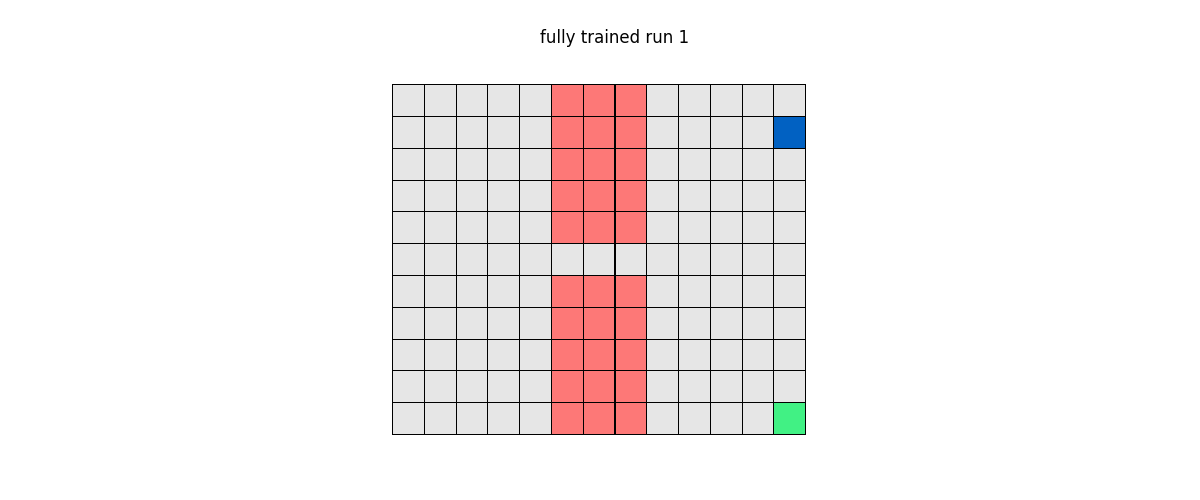
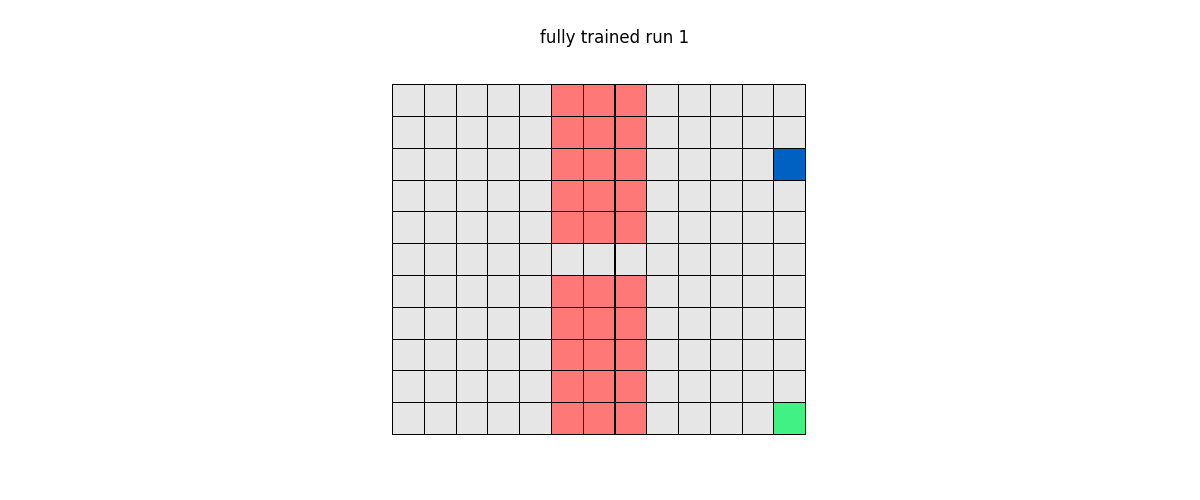
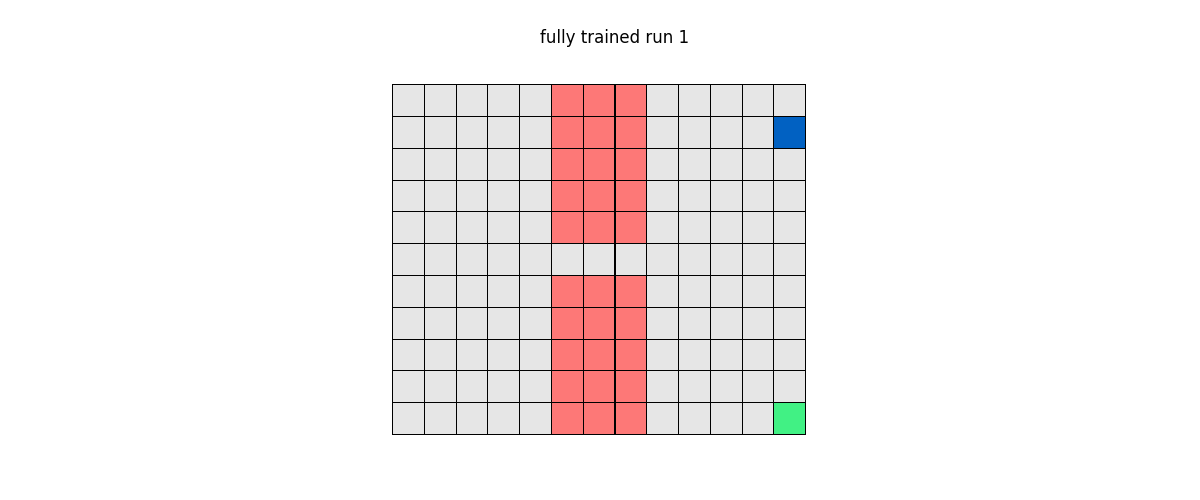
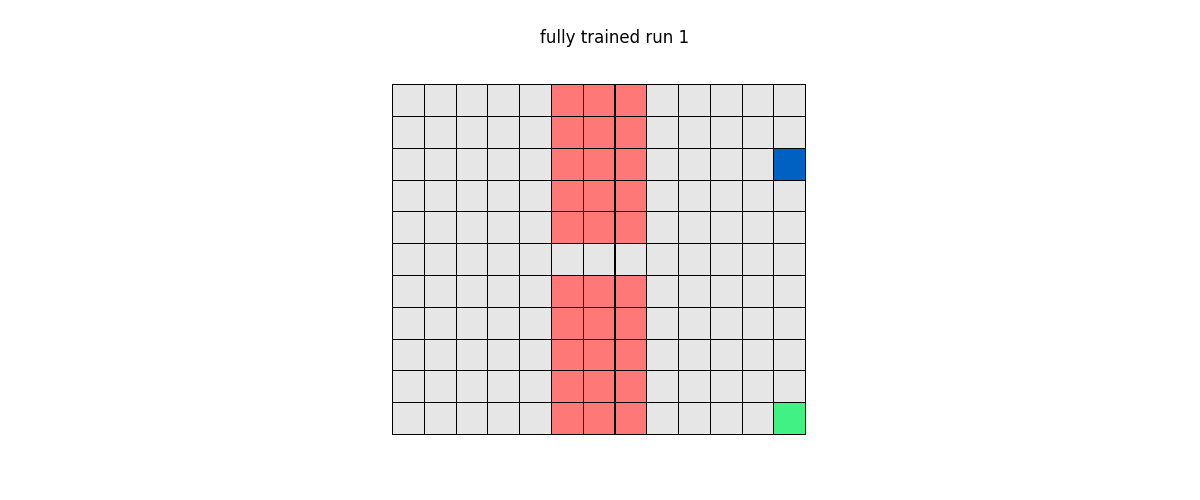
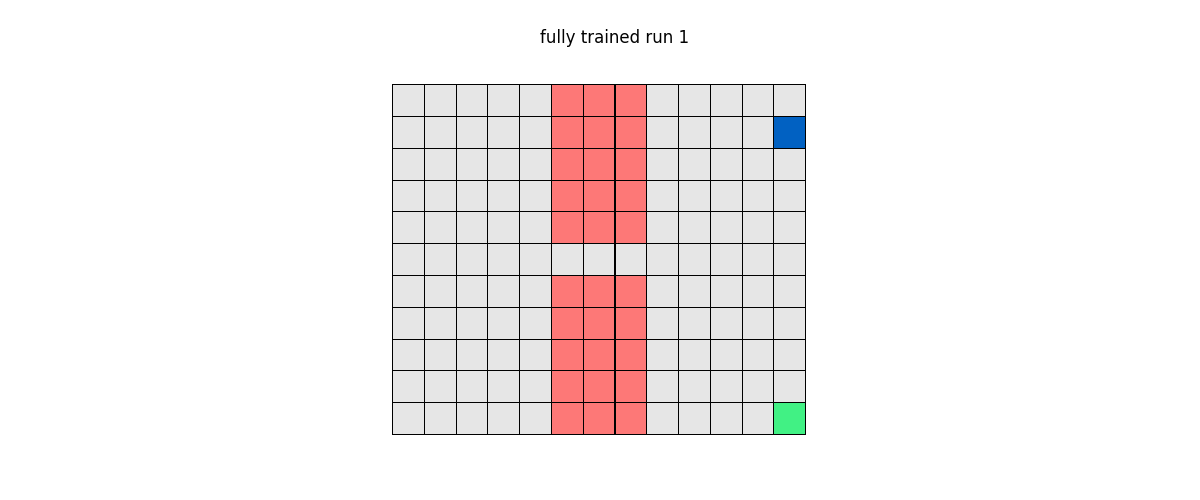
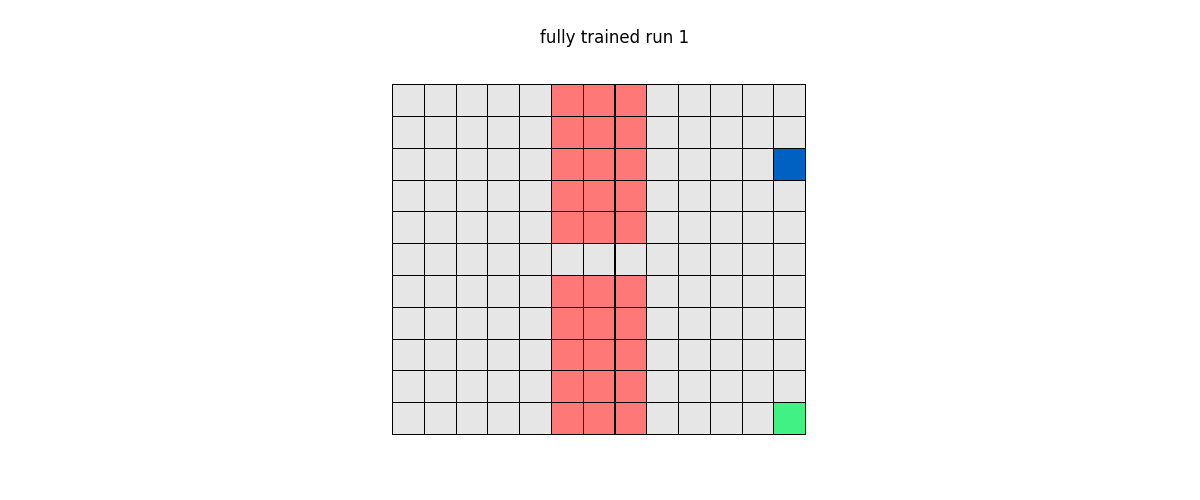
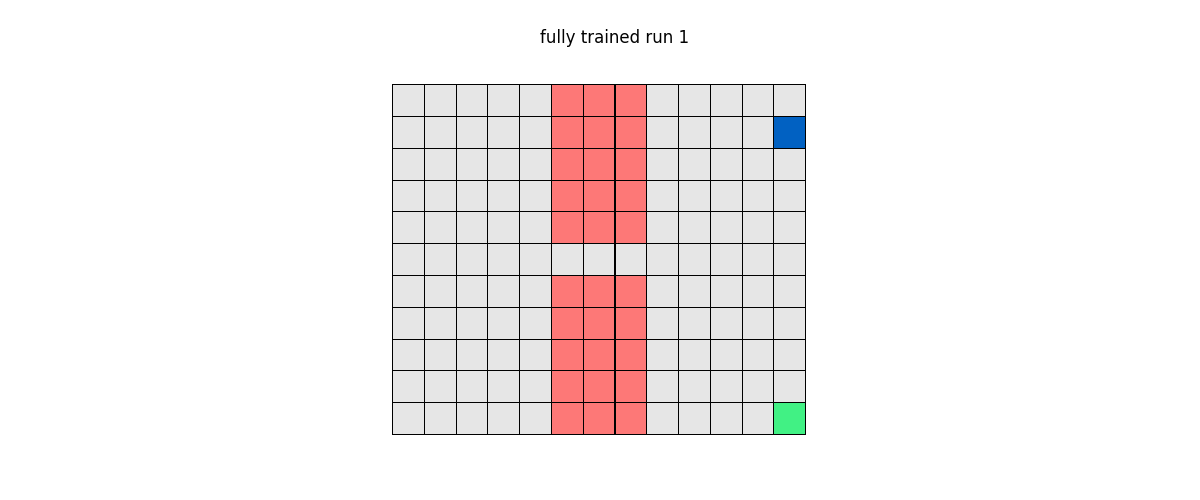
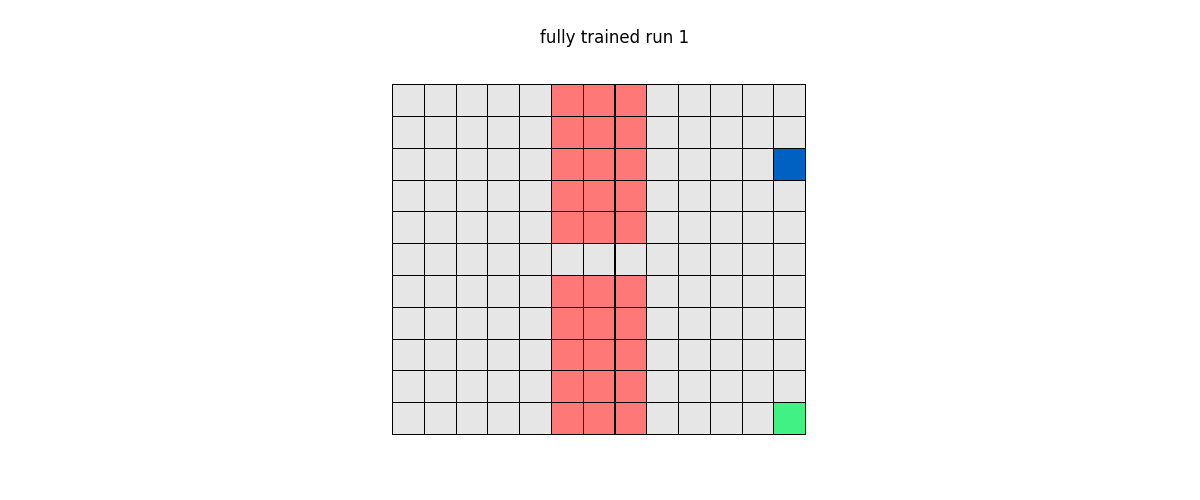
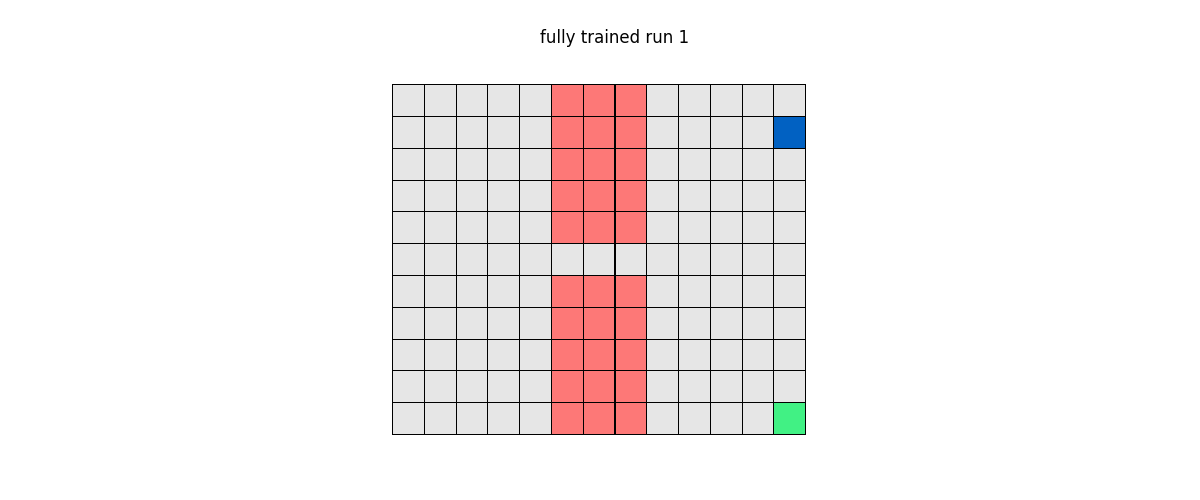
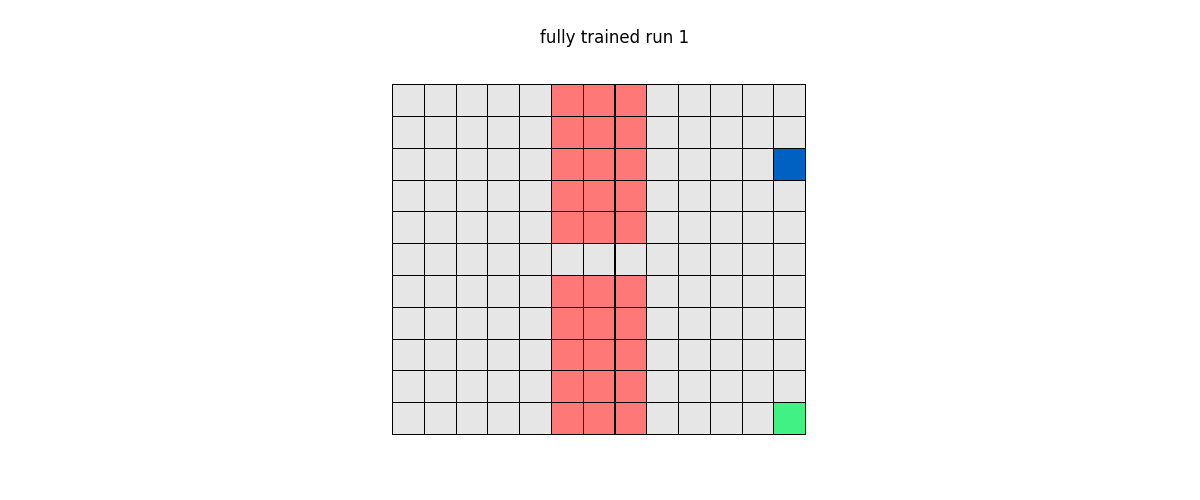
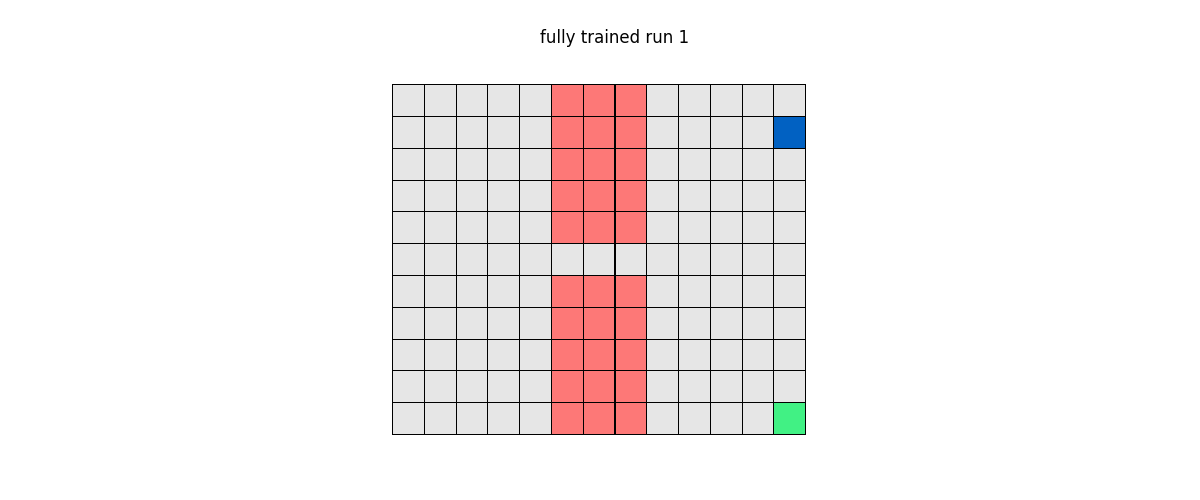
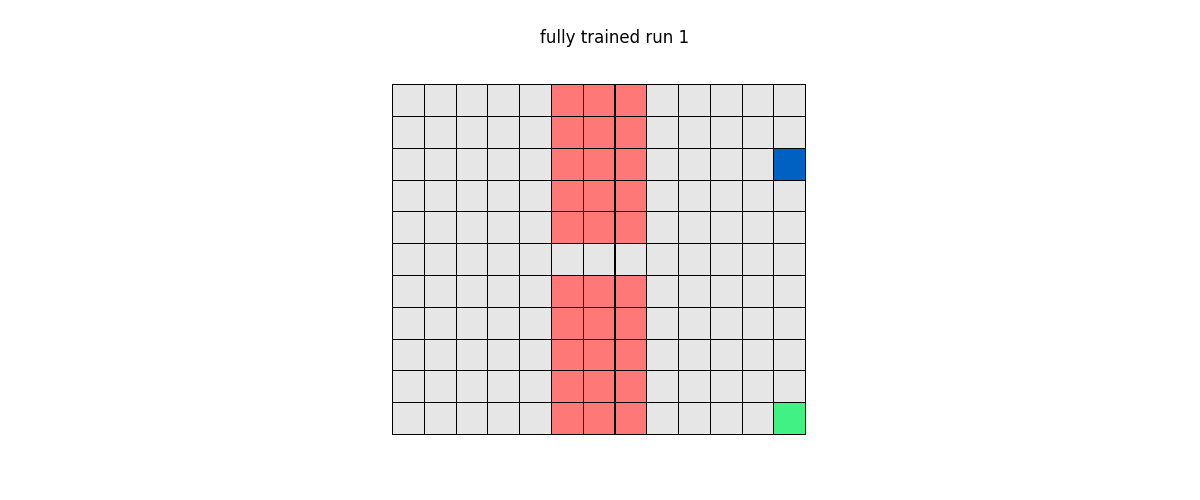
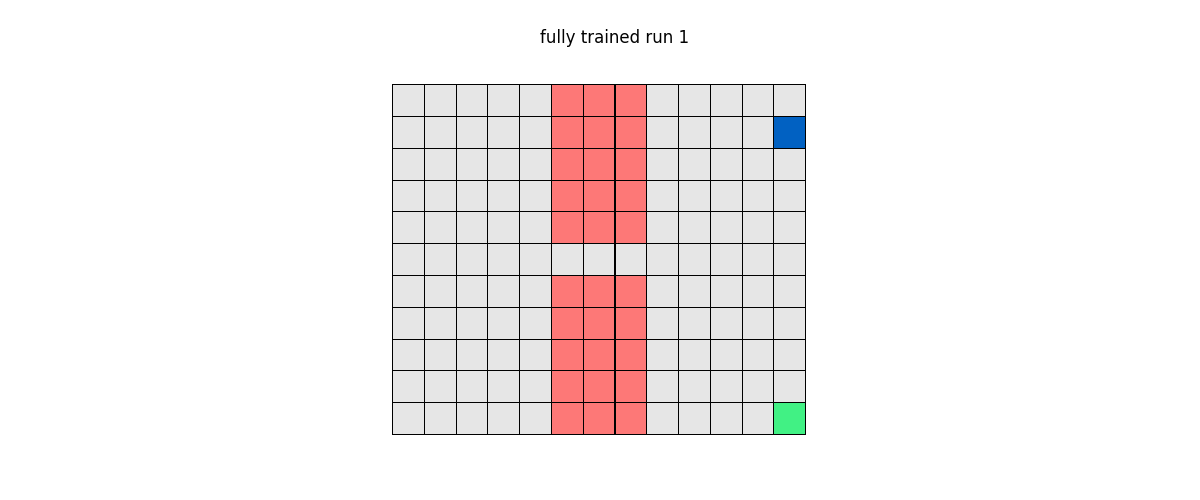
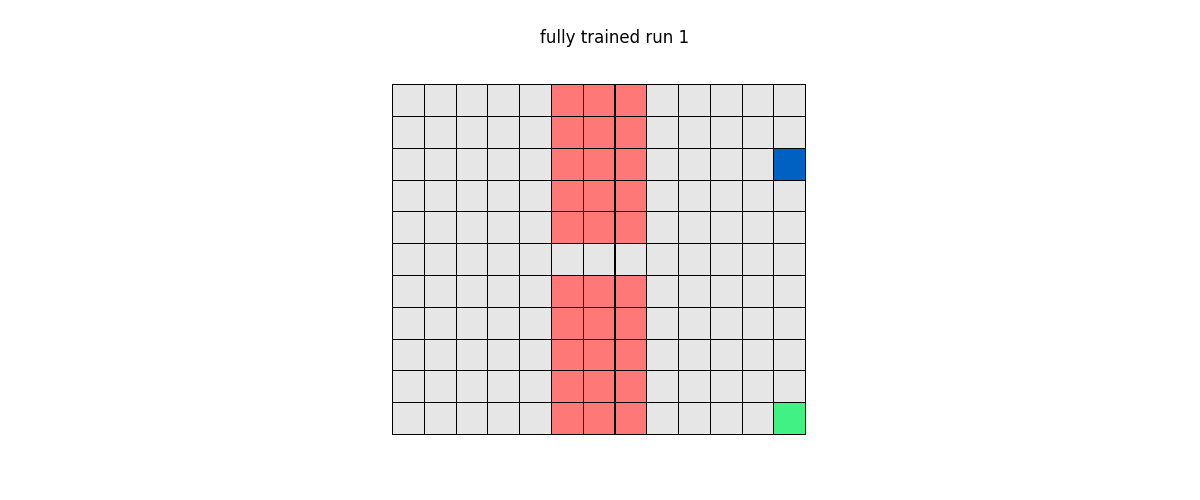
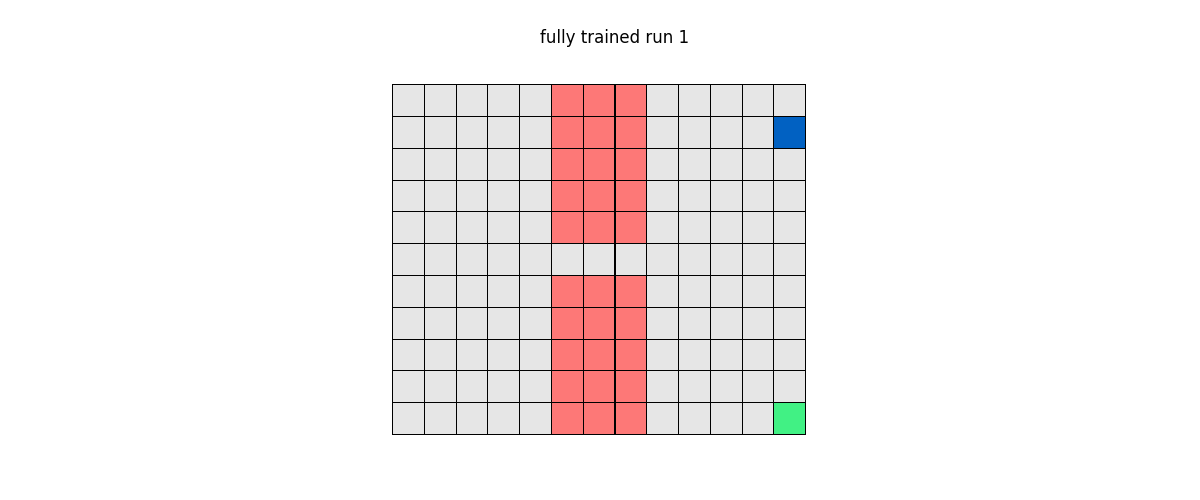
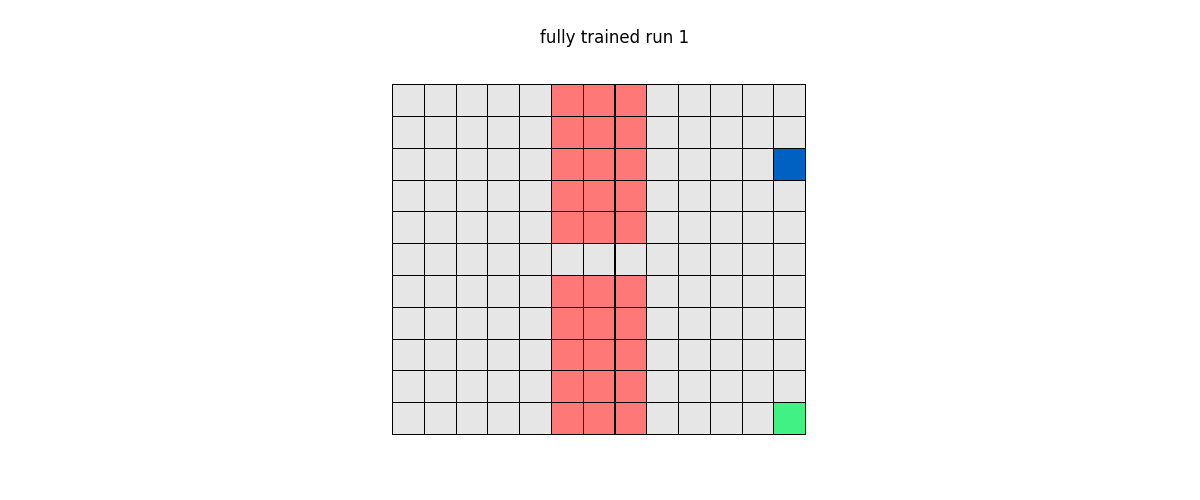
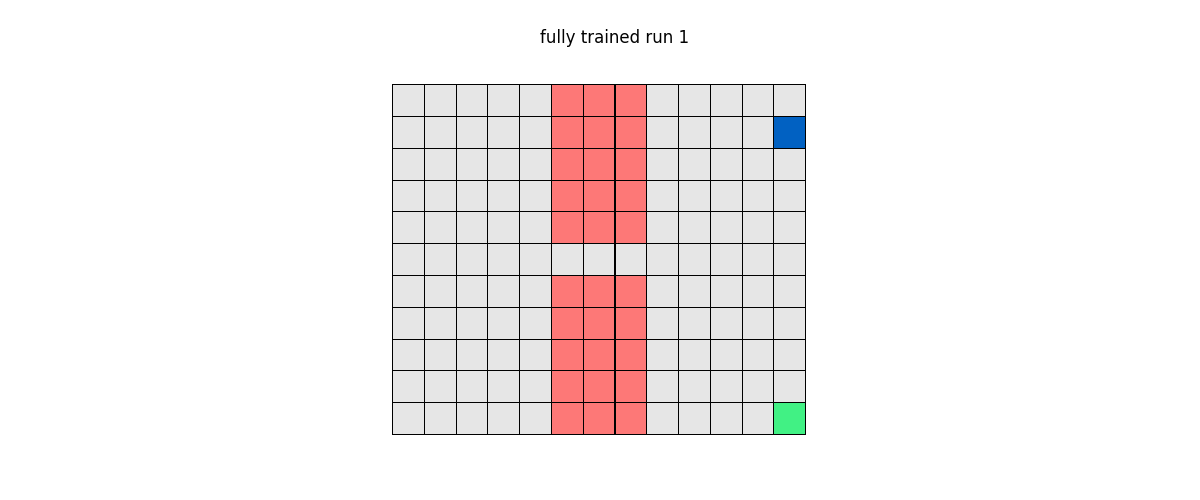
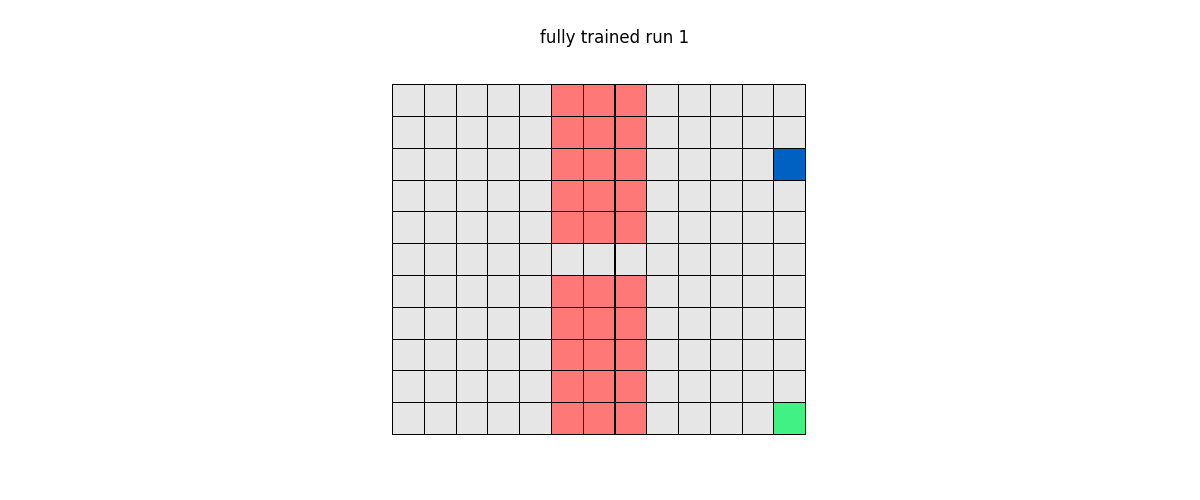
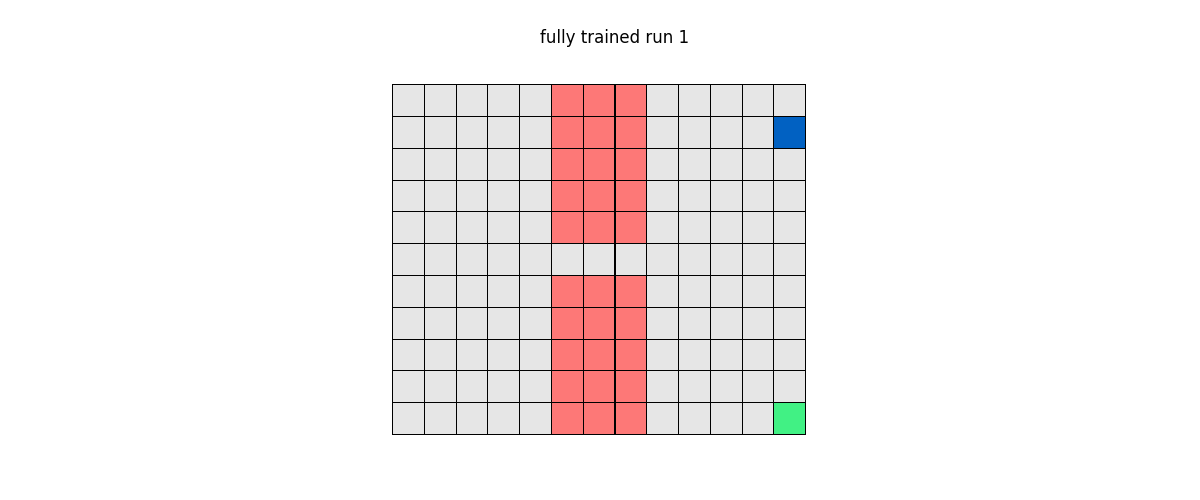
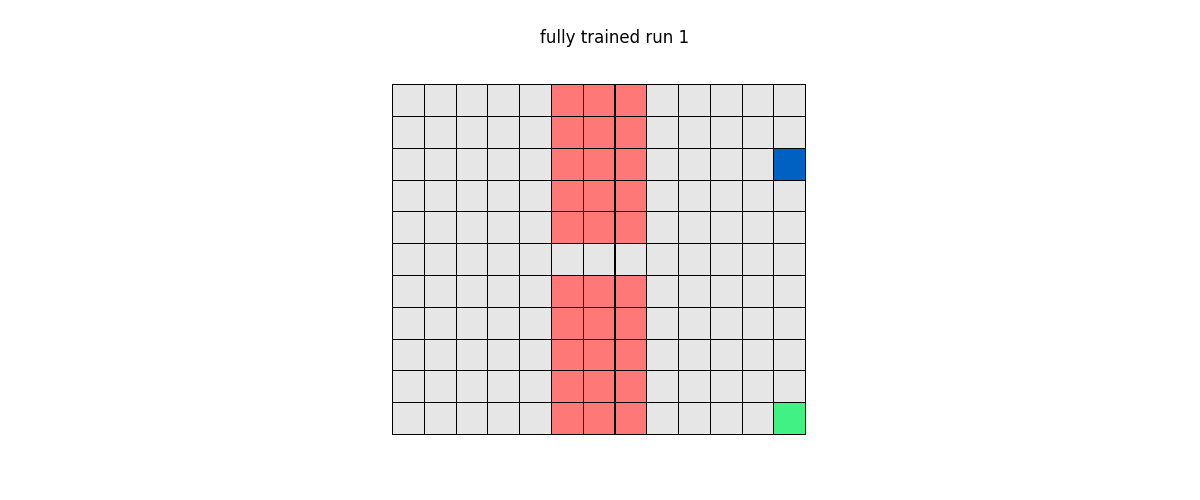
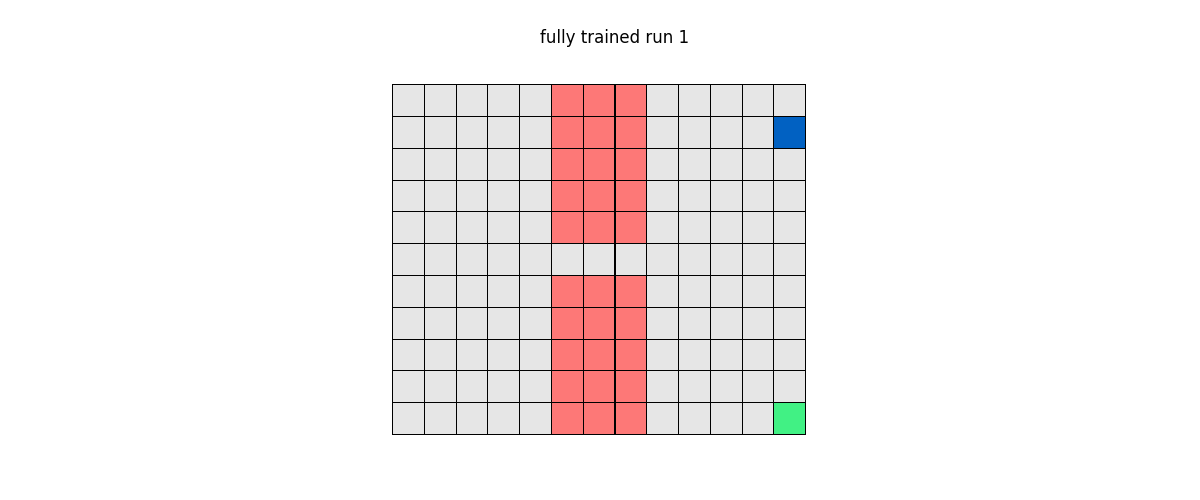
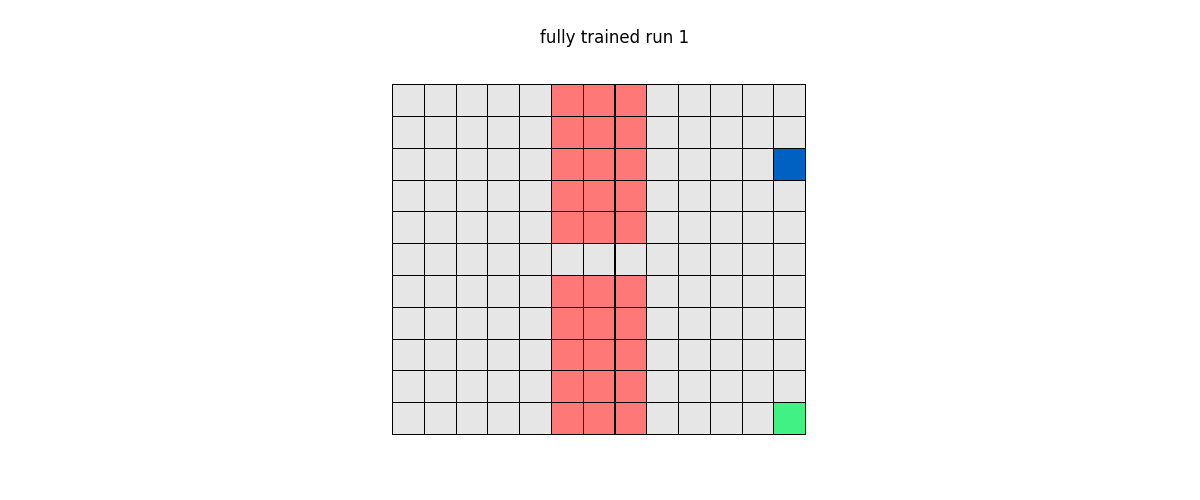
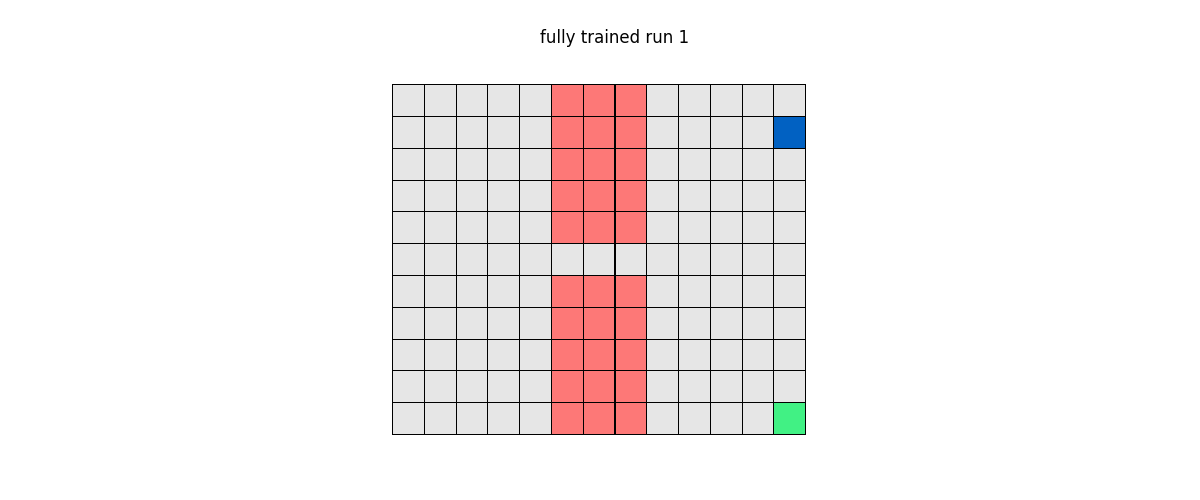
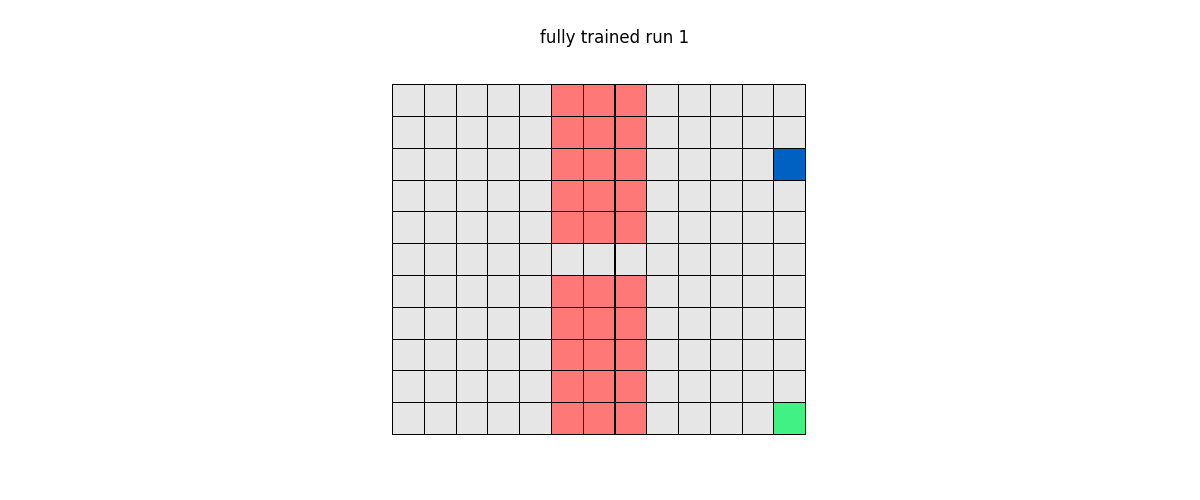
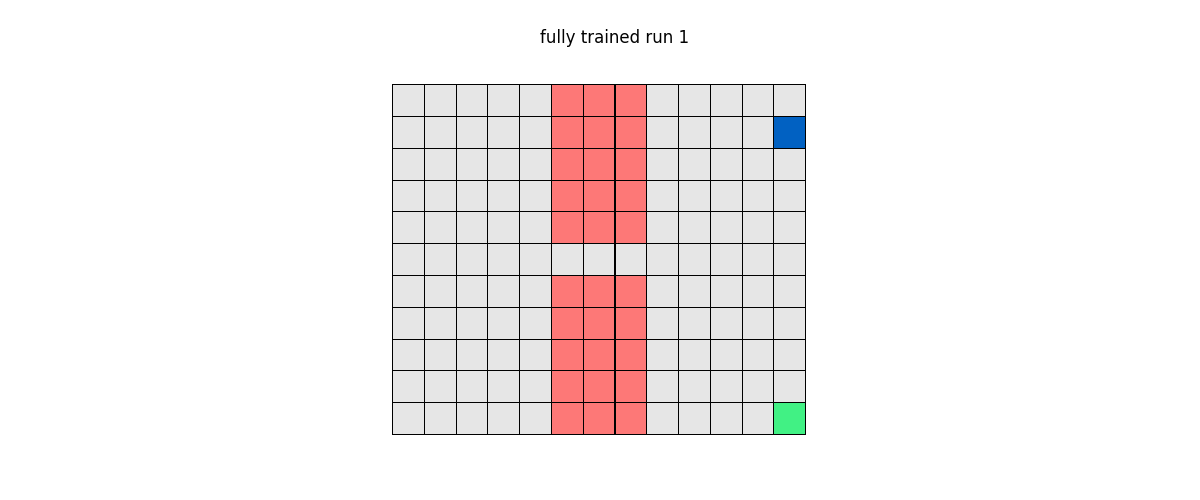
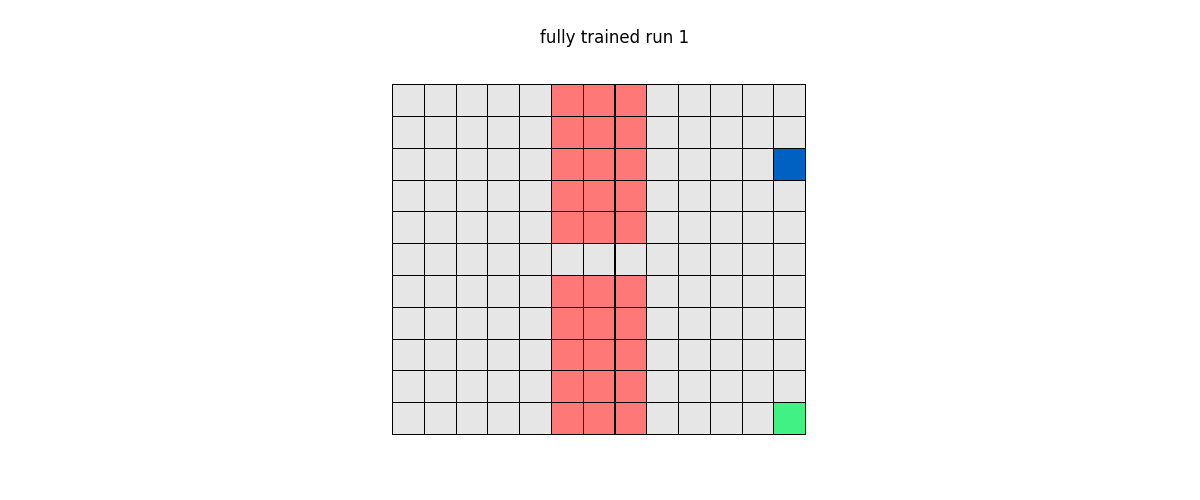
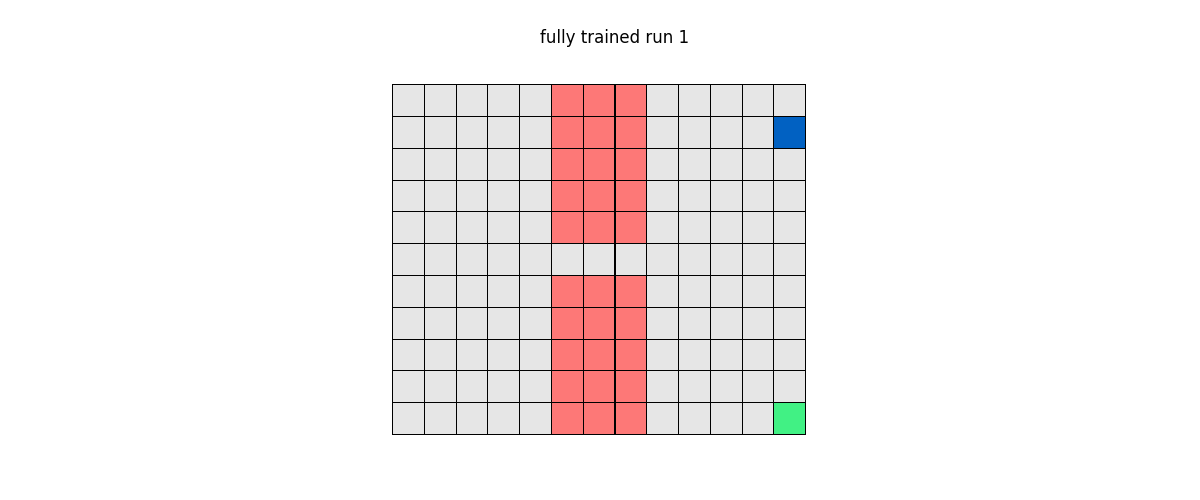
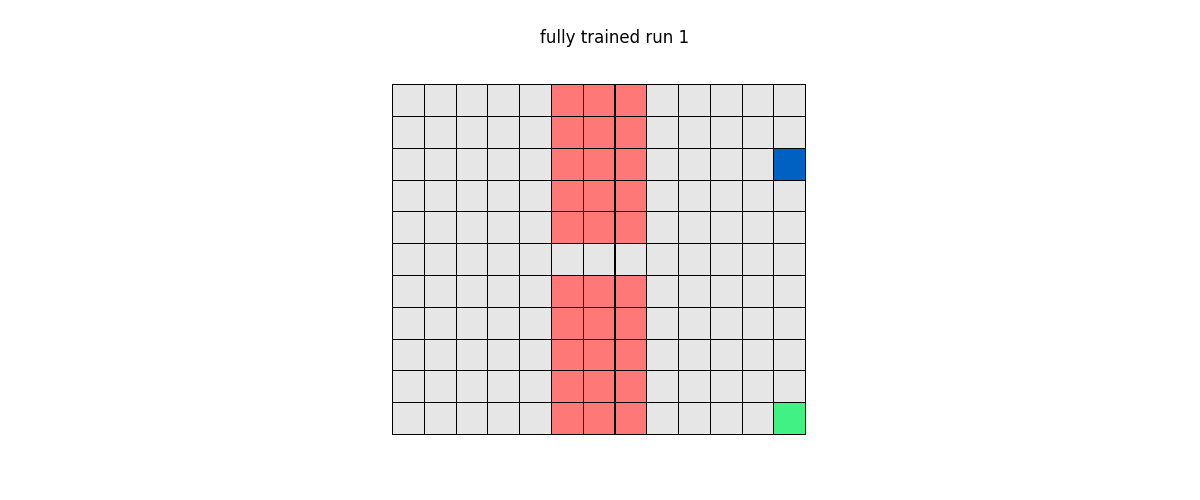
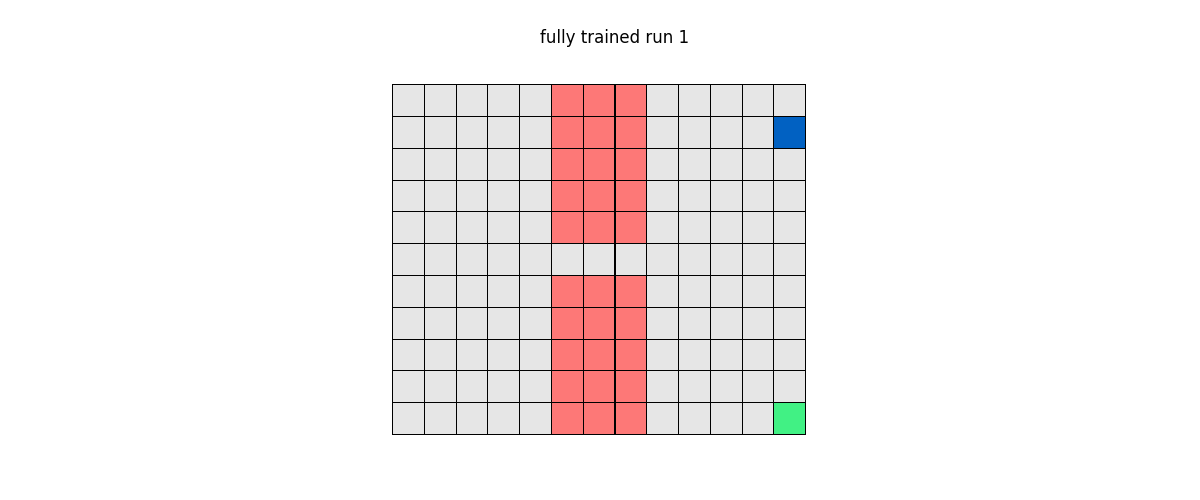
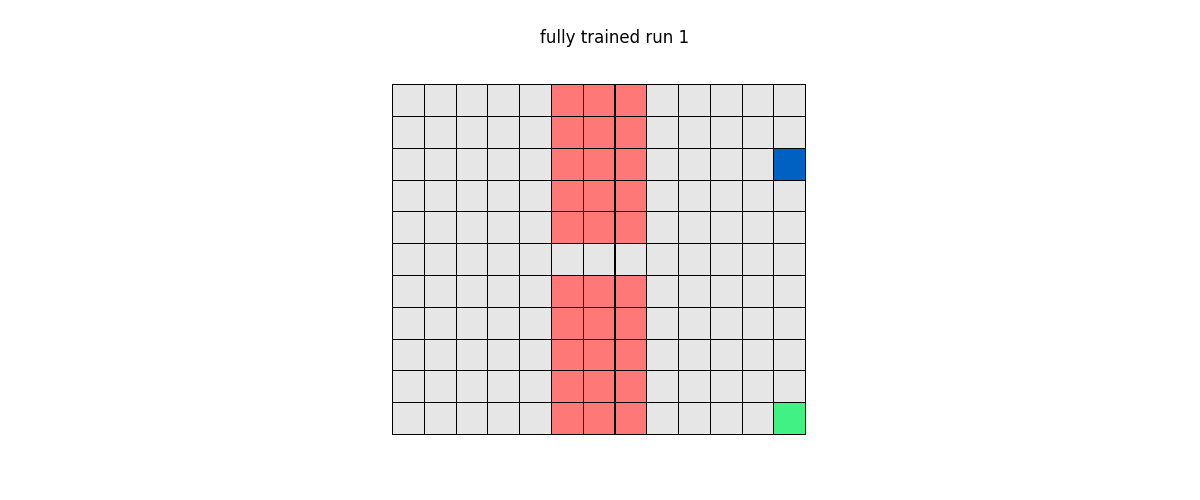
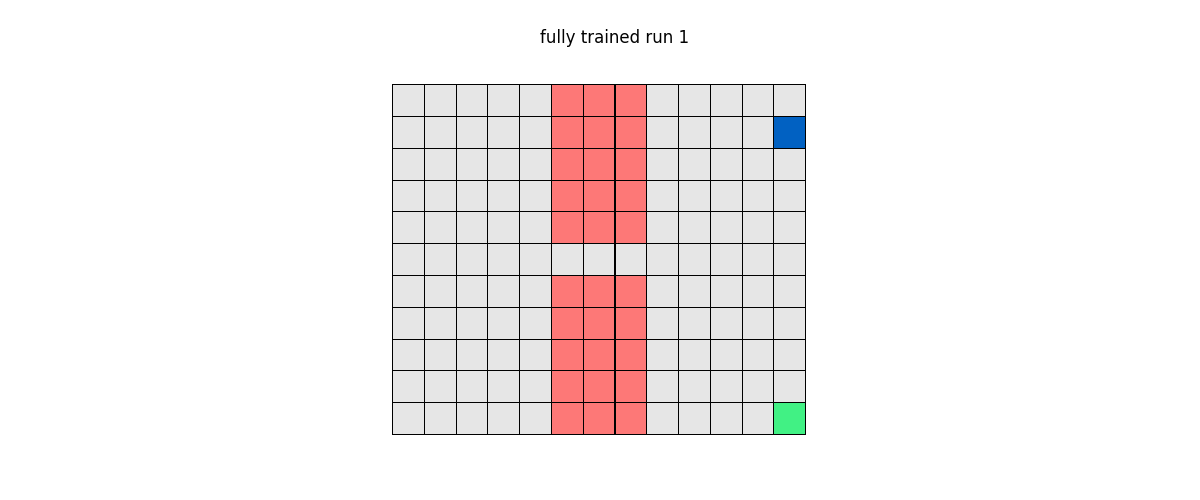
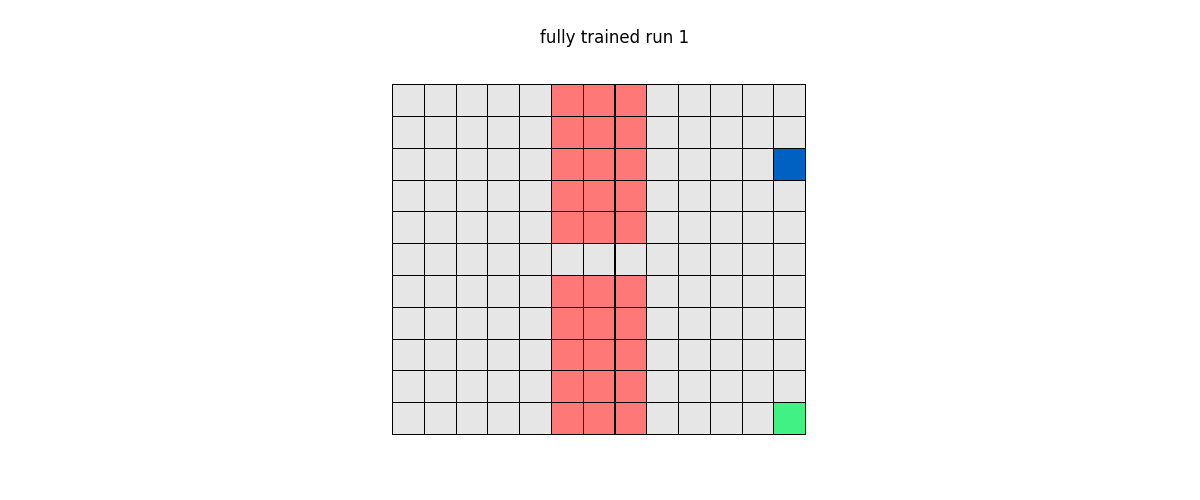
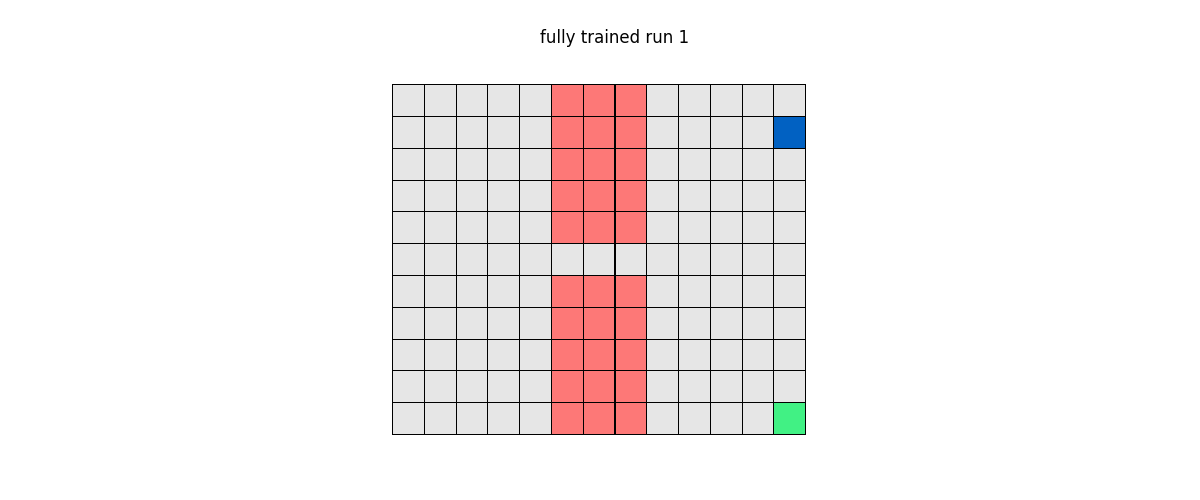
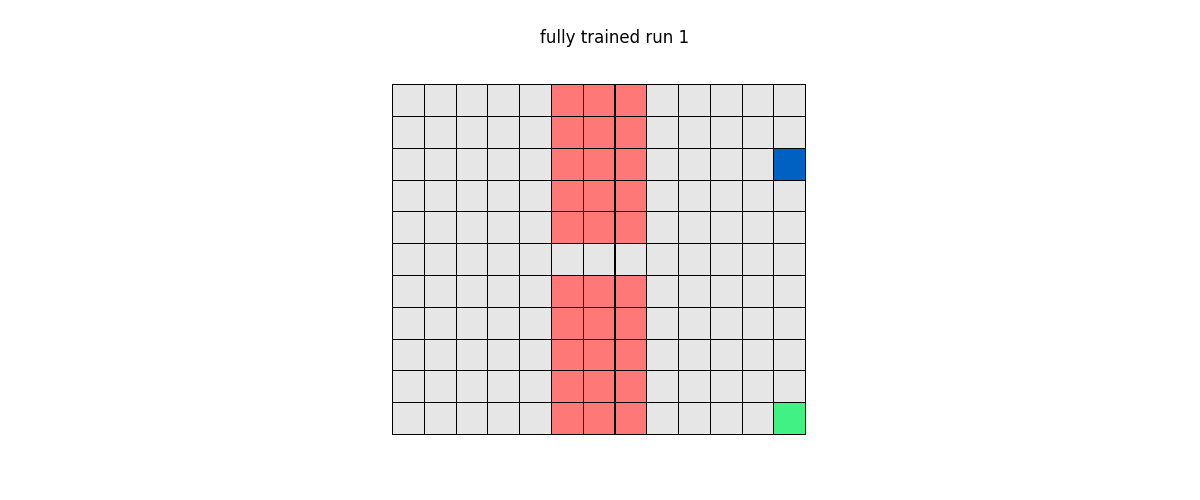
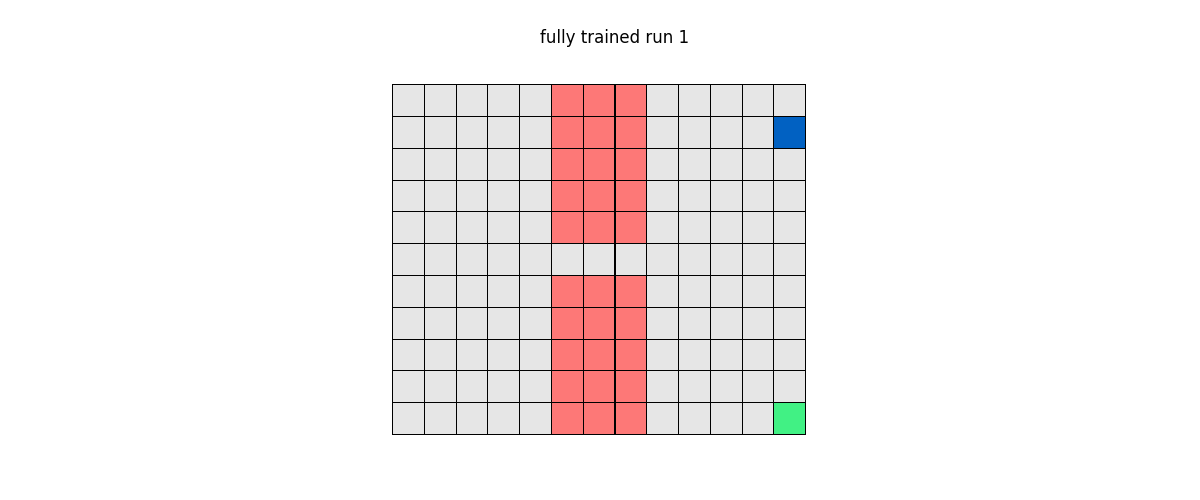
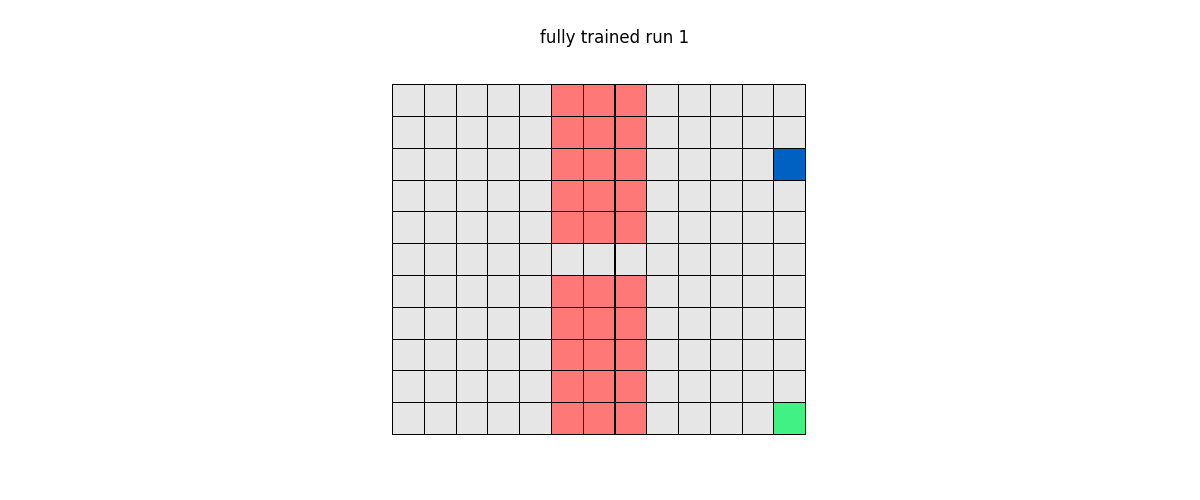
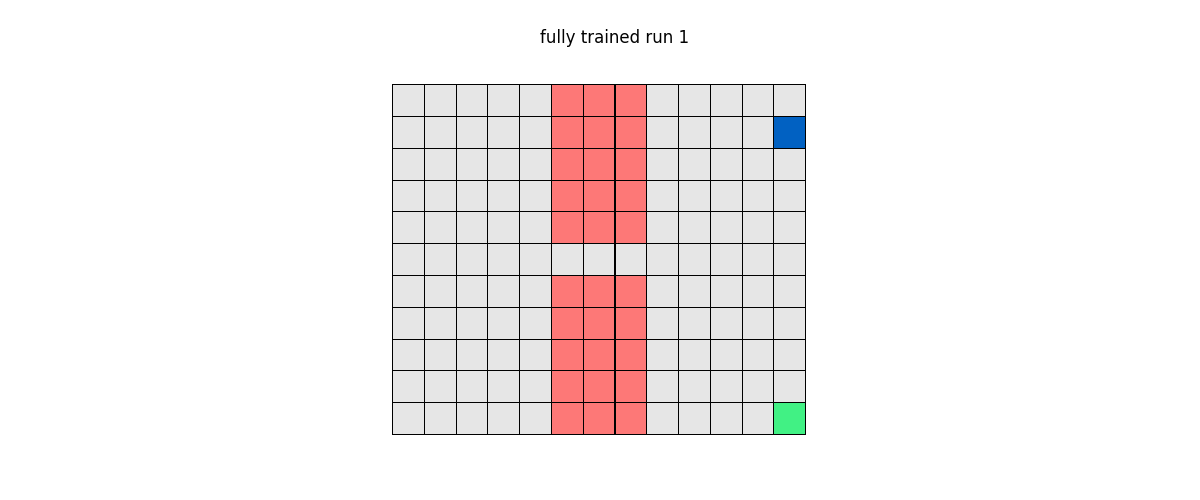
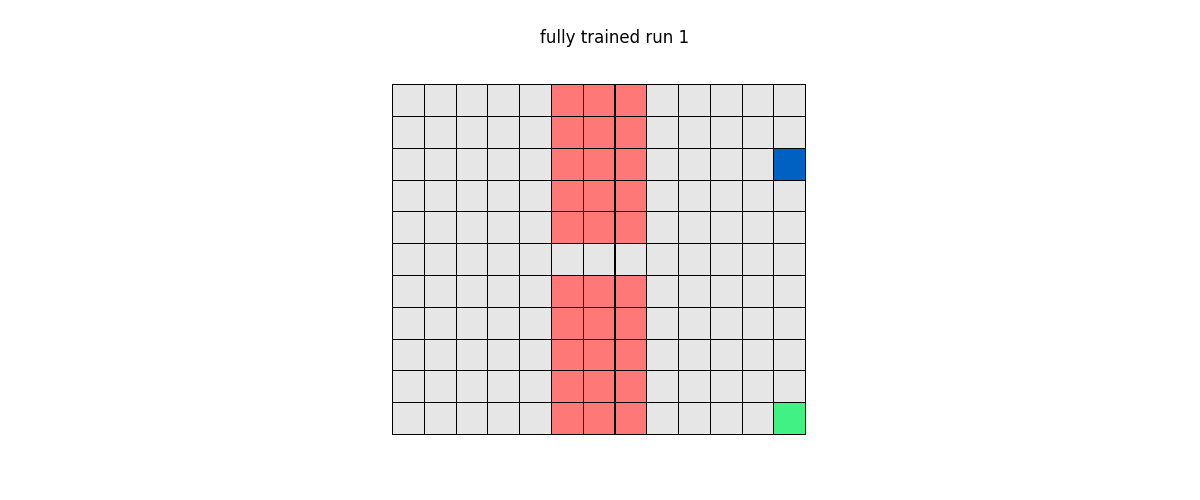
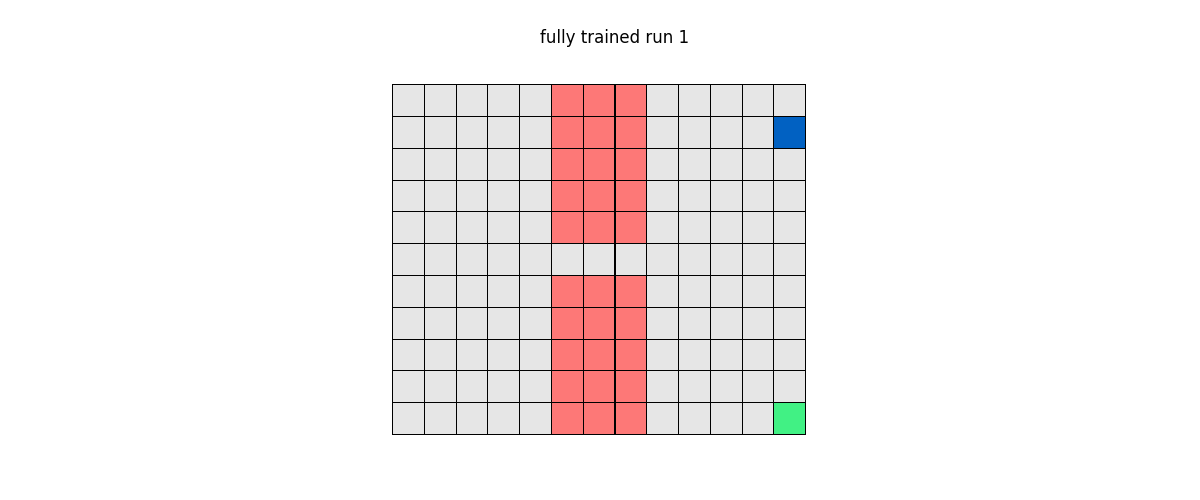
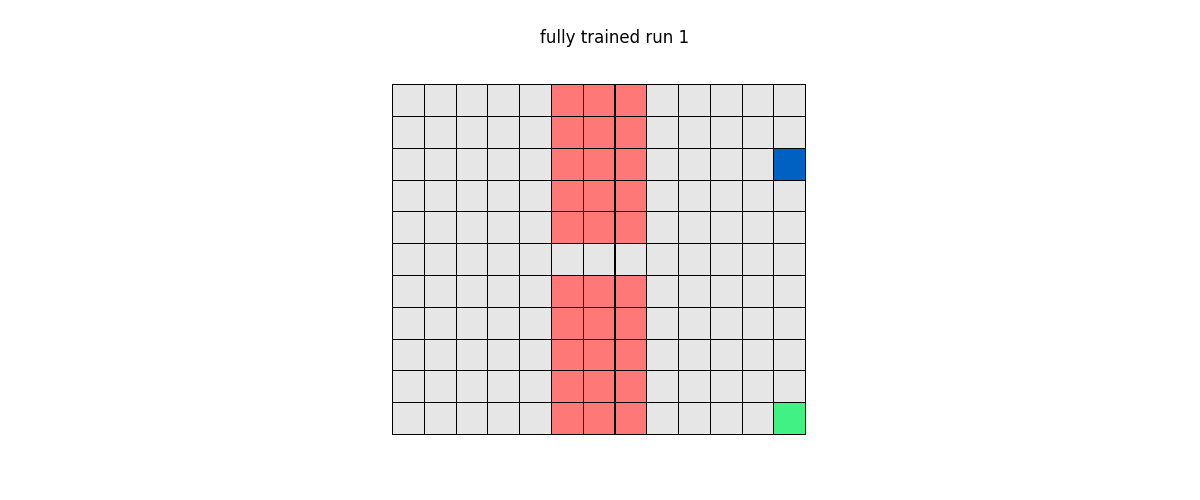
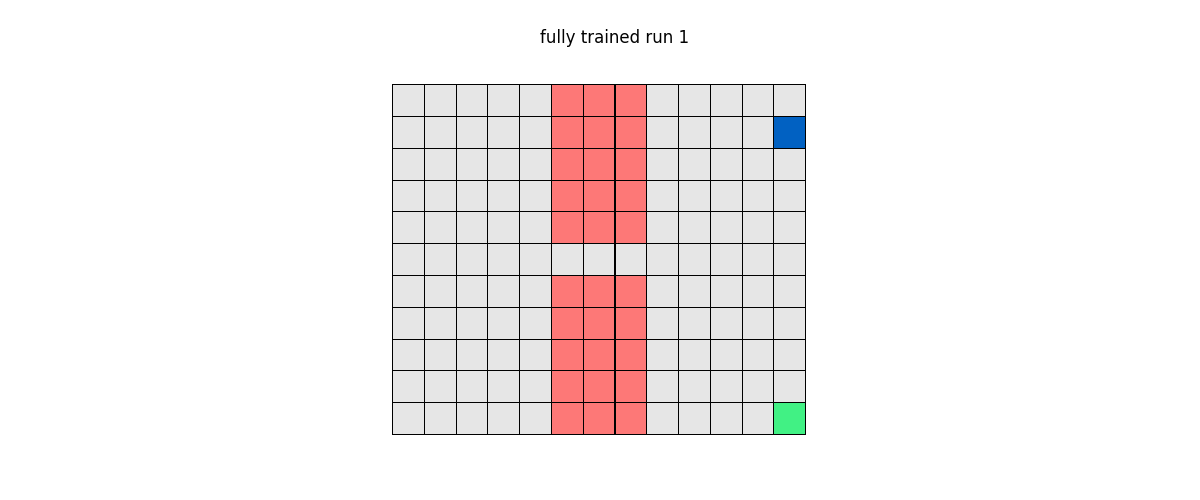
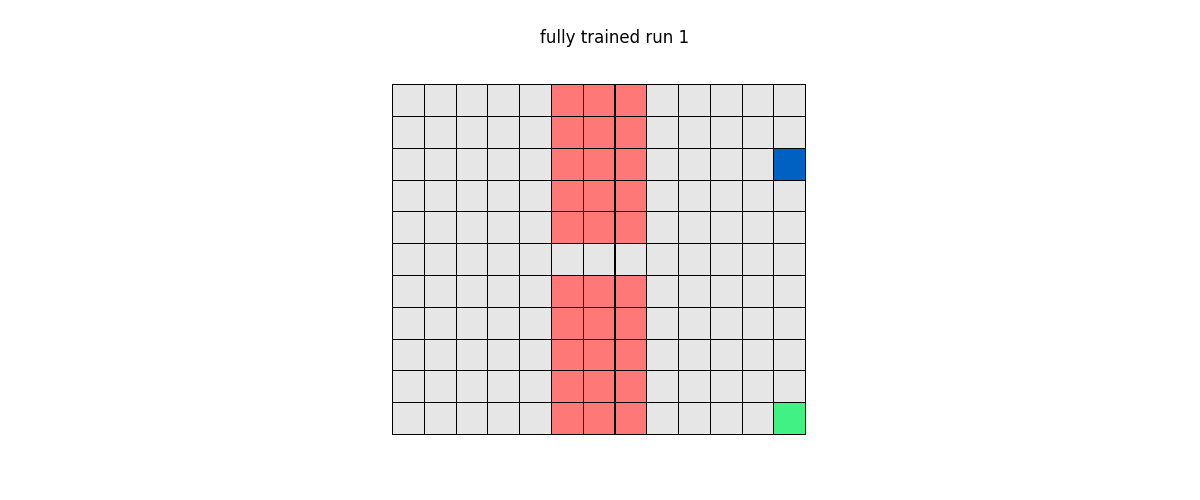
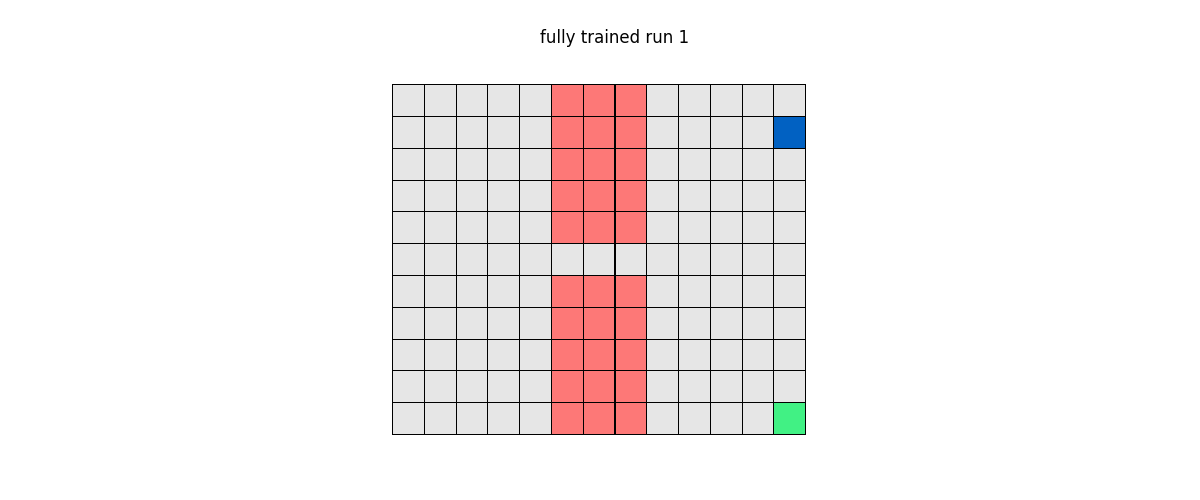
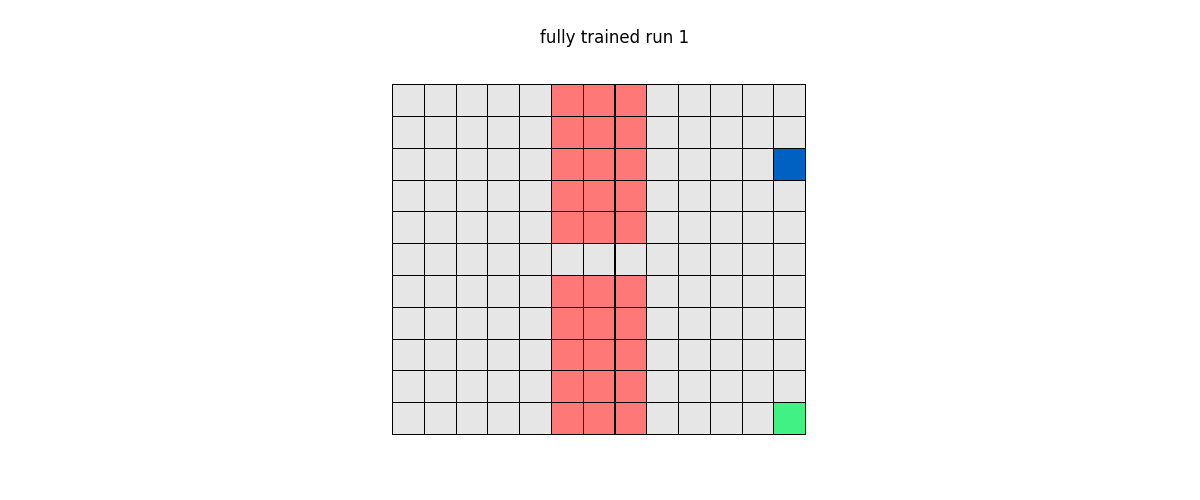
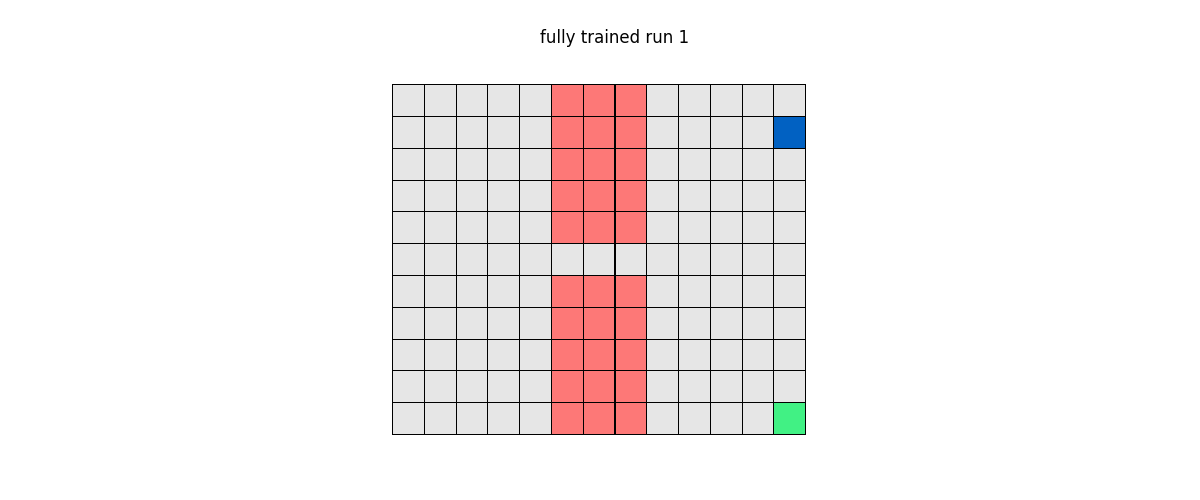

In [5]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[0,0]]
animator.animate_validation_runs(gridworld = small_moat,learner = small_maze_qlearner,starting_locations = locs)

Oof! The agent - trained on the maze environment - does not perform well on the moat environment at all!  

This is because eventhough the enviroment the agent was trained on was a Gridworld, it was still quite different than the one we tested the agent on. Our agent gained all of its experience on something very different than what we tested it on. So, should we be surprised by this failure? No.  

Let's now test our fully trained agent in a Gridworld environment that is only slightly different from the one it was originally trained on. In the Python cell below we load this new testing environment.

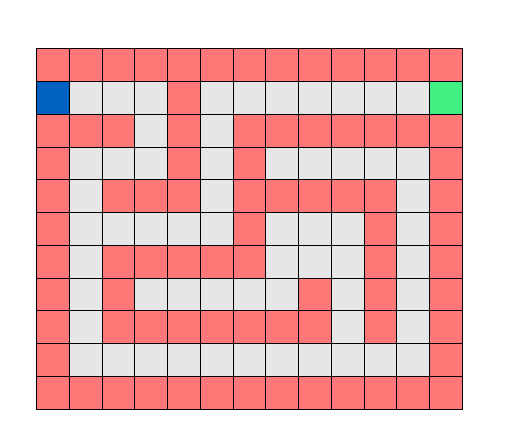

In [6]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_maze_v2 = gridworld_enviro.environment(world_size = 'small', world_type = 'maze_v2')

# show the enviroment
small_maze_v2.color_gridworld()

Eventhough the training and testing environments may look identical at first sight, they are indeed different! Their difference is illustrated in the figure below.

<img src="demo_images/RL_images/difference_maze.png" width=65% height=65%/>

We now test our agent in this new Gridworld maze environment. 


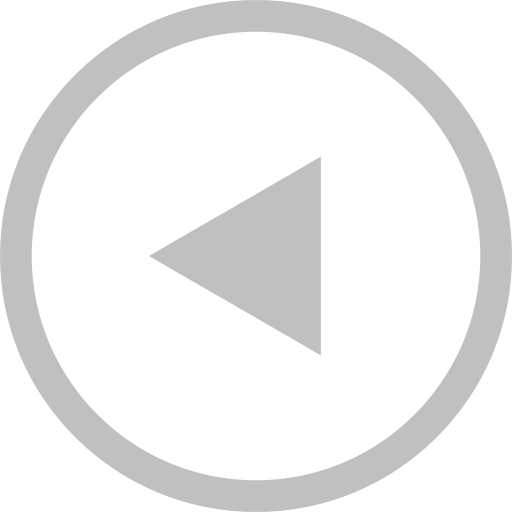
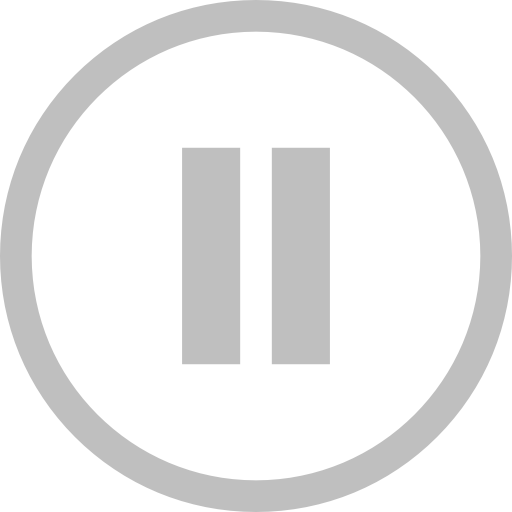
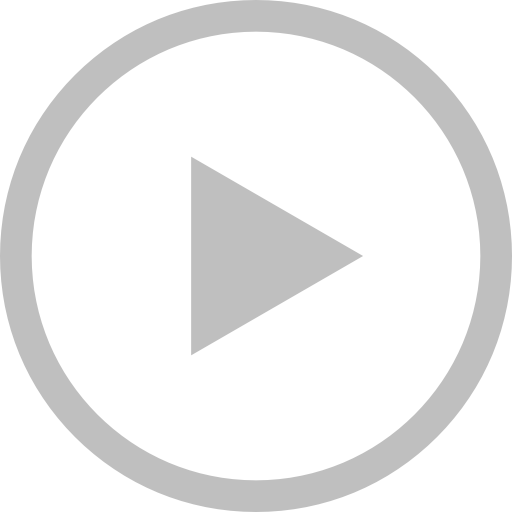
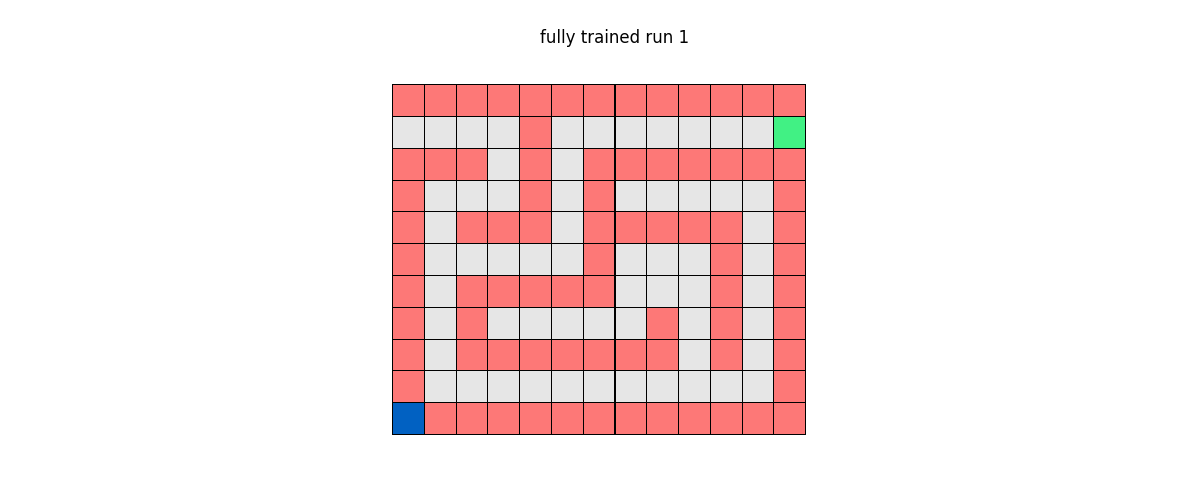
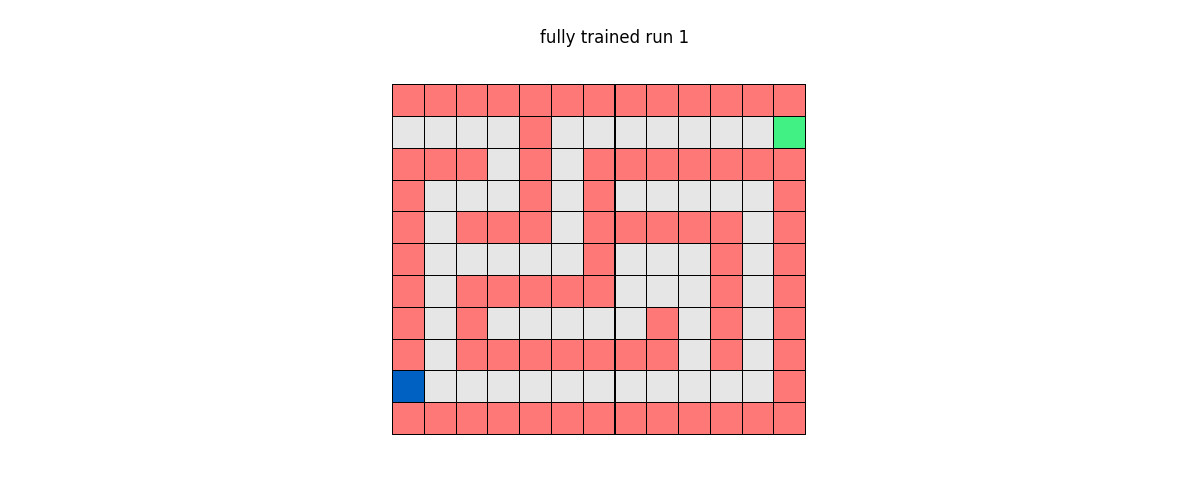
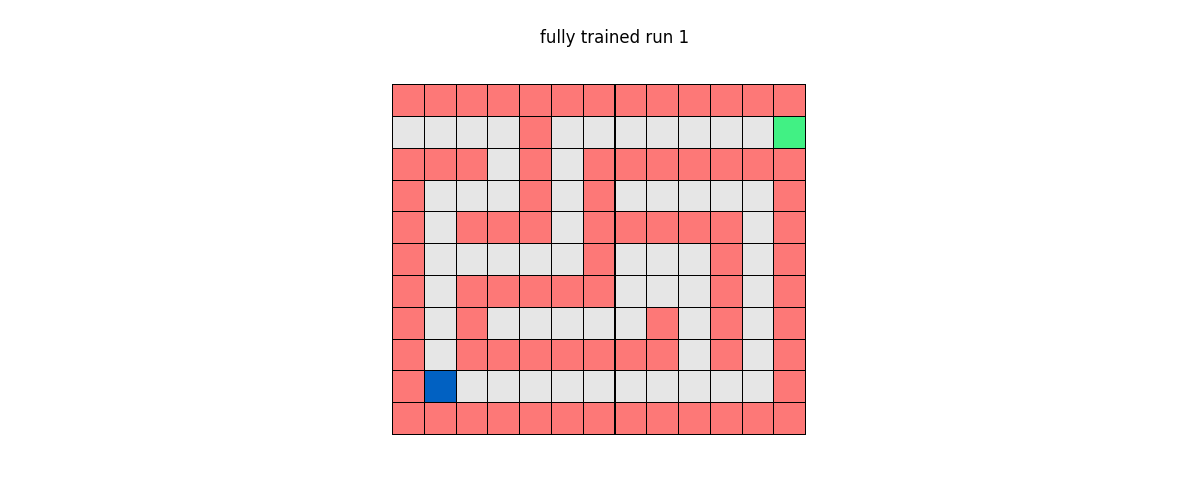
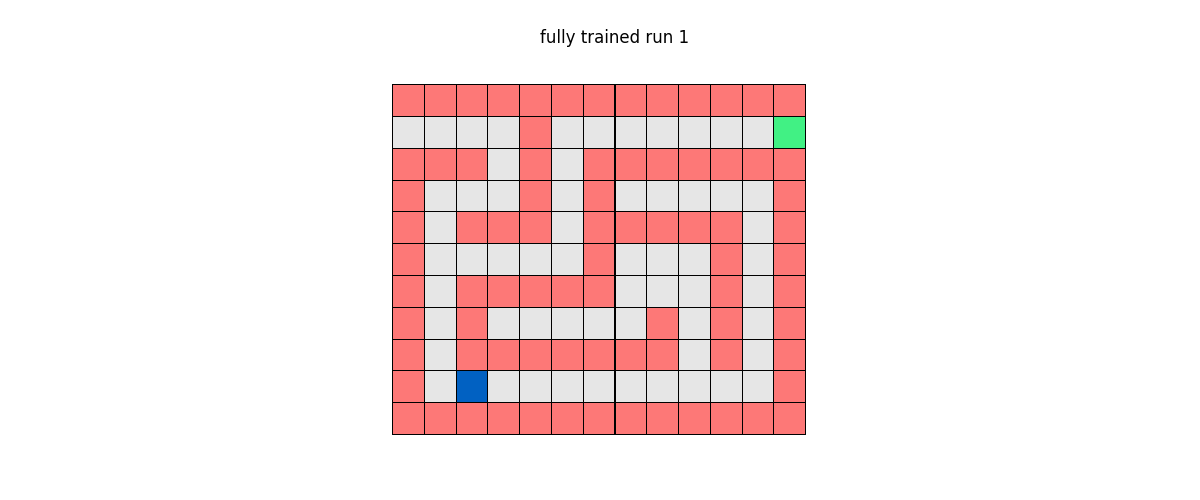
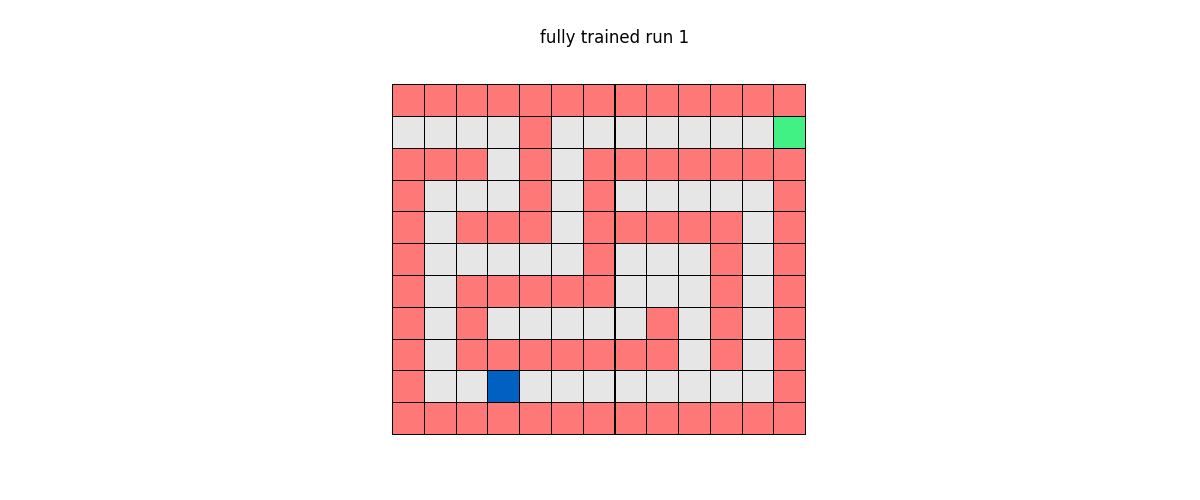
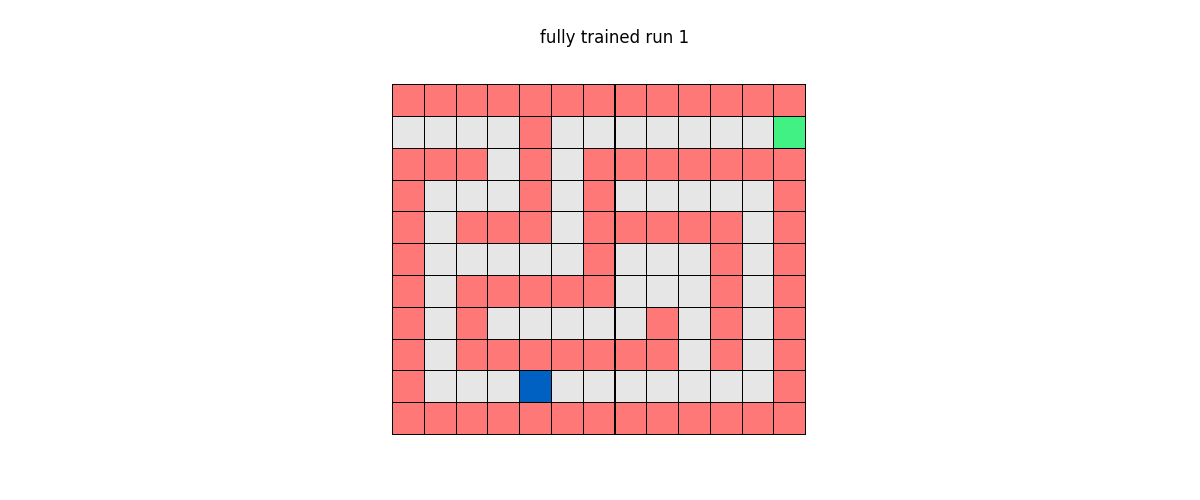
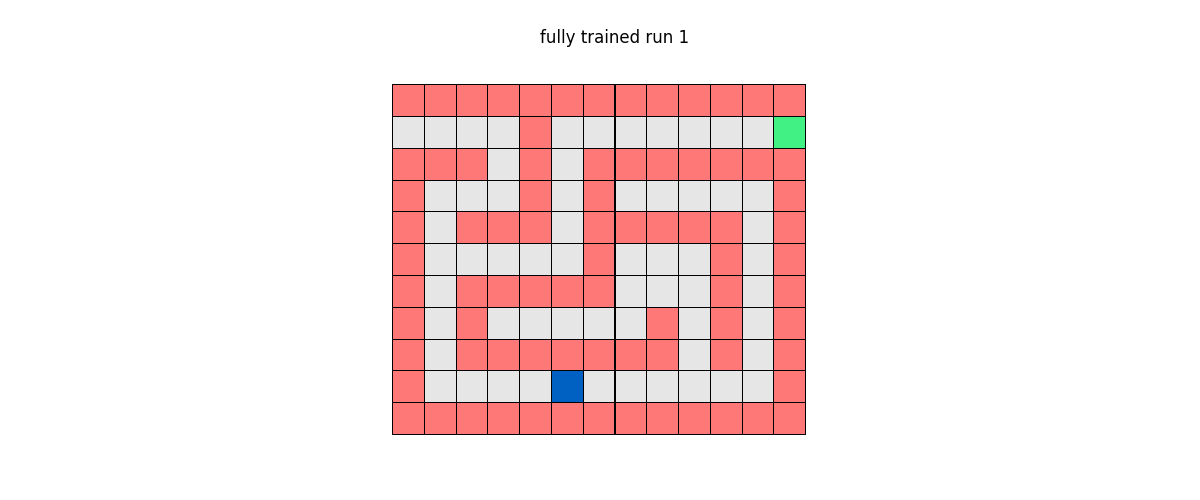
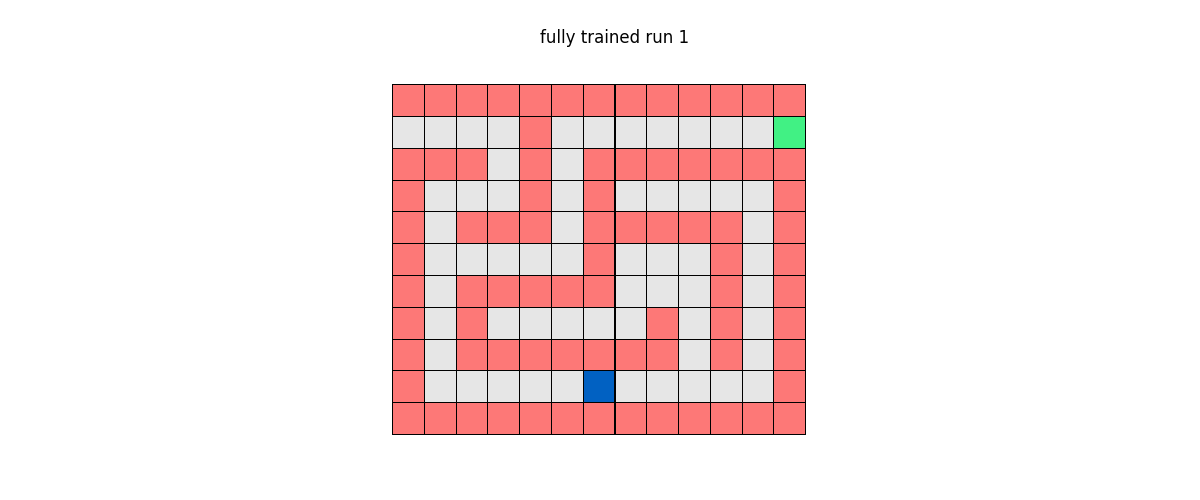
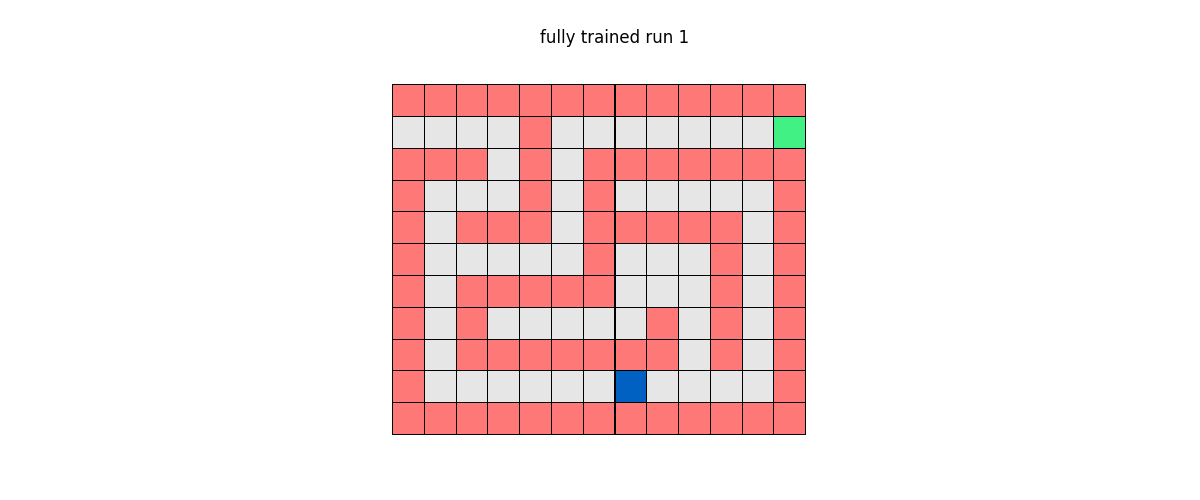
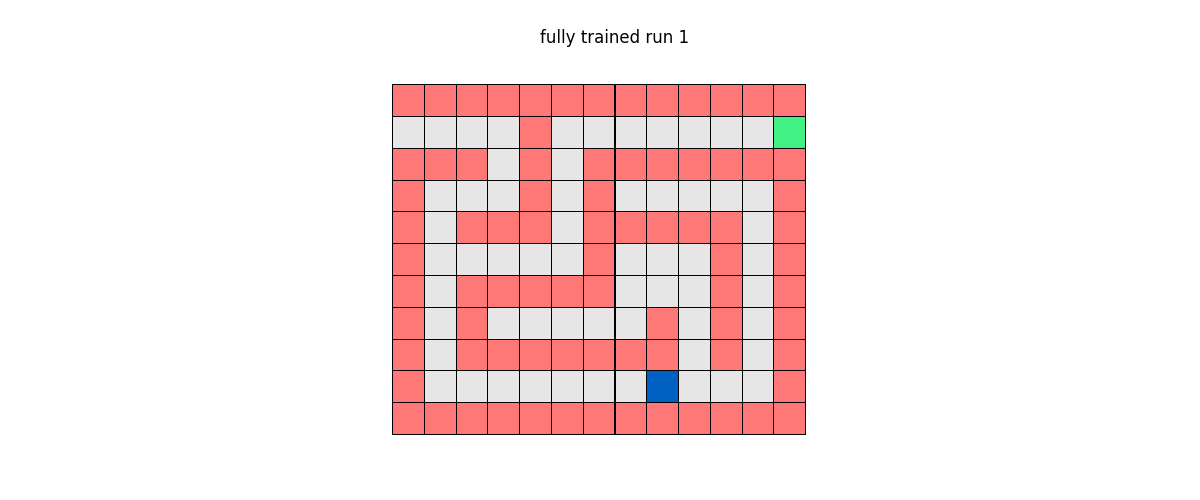
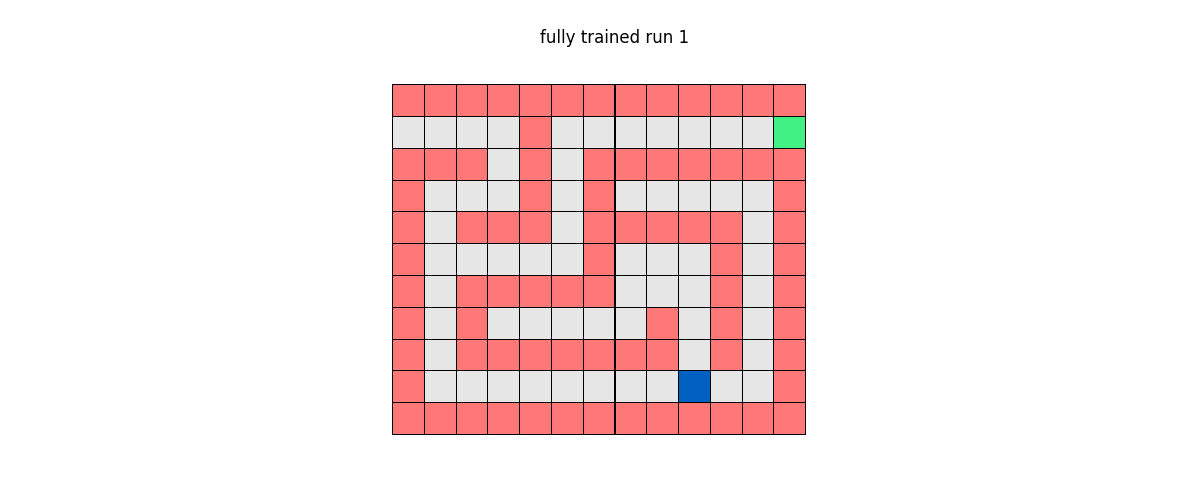
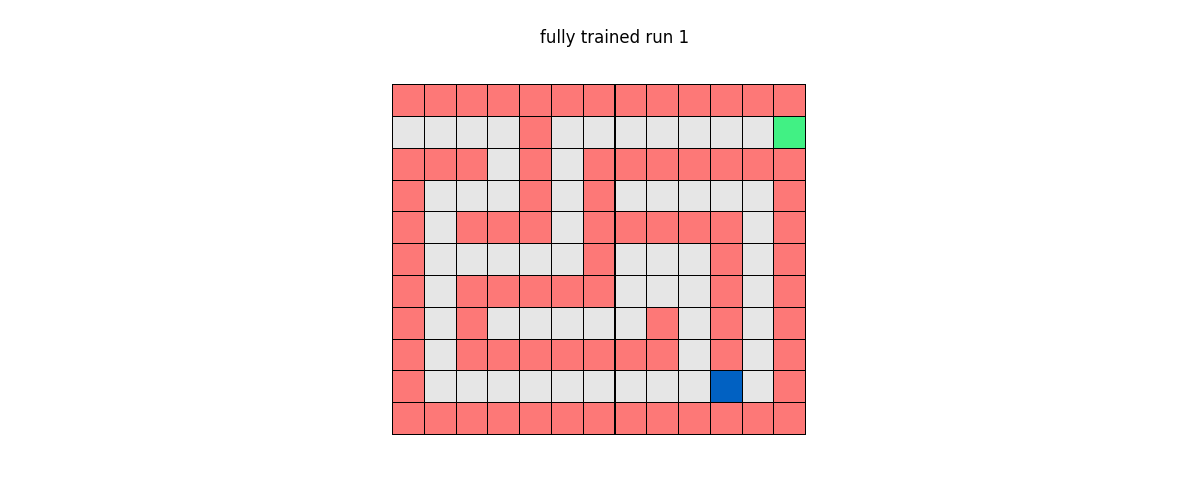
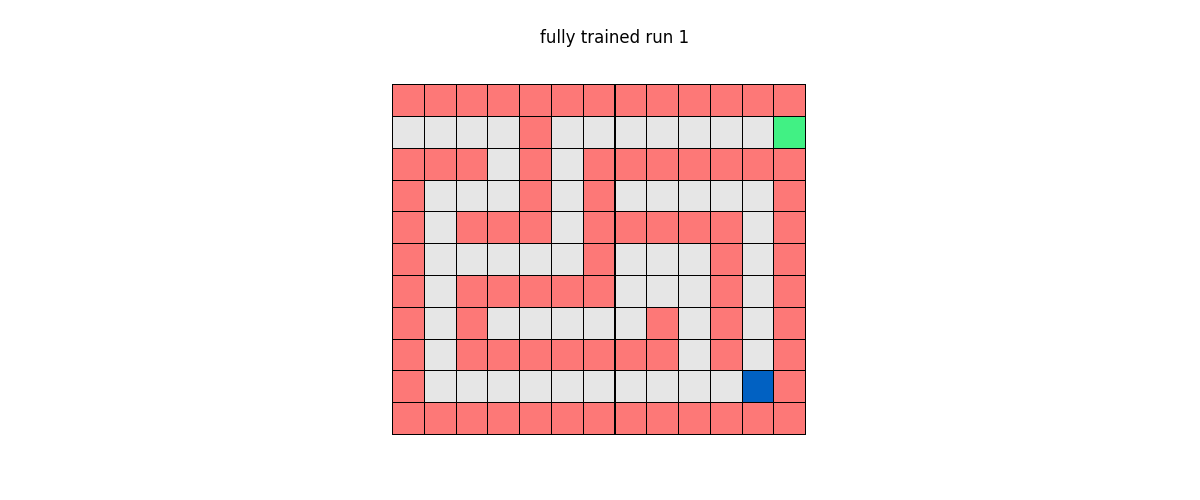
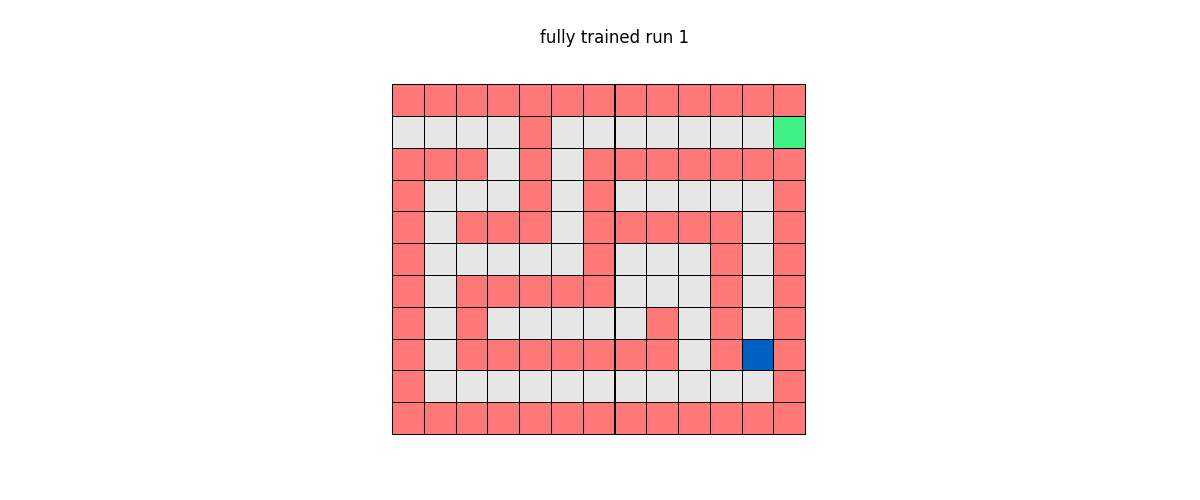
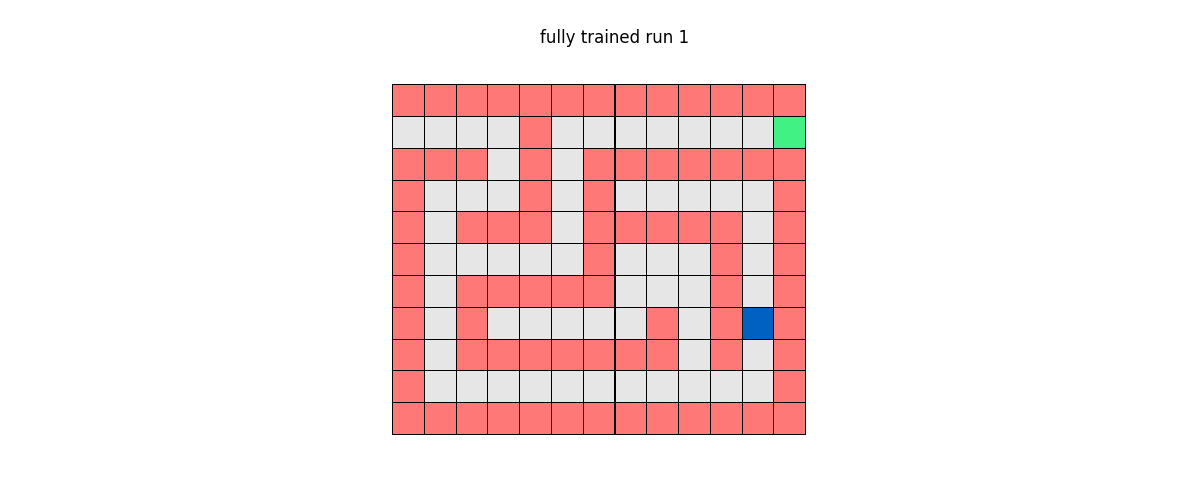
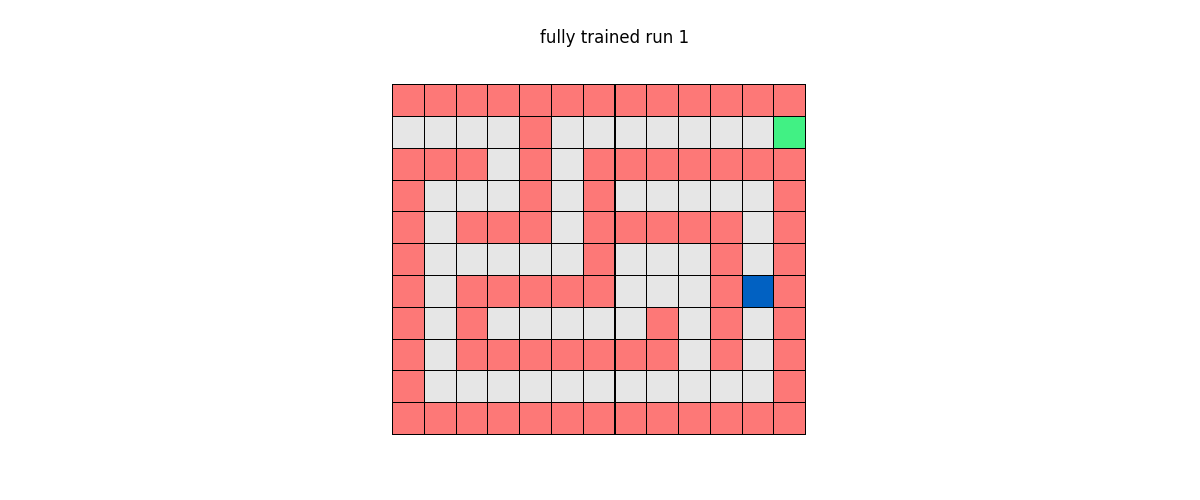
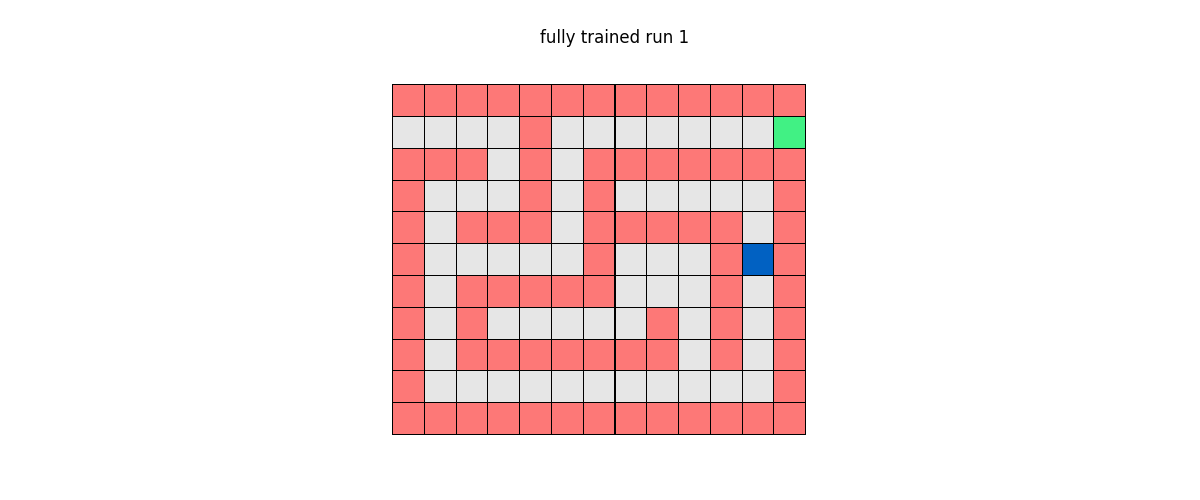
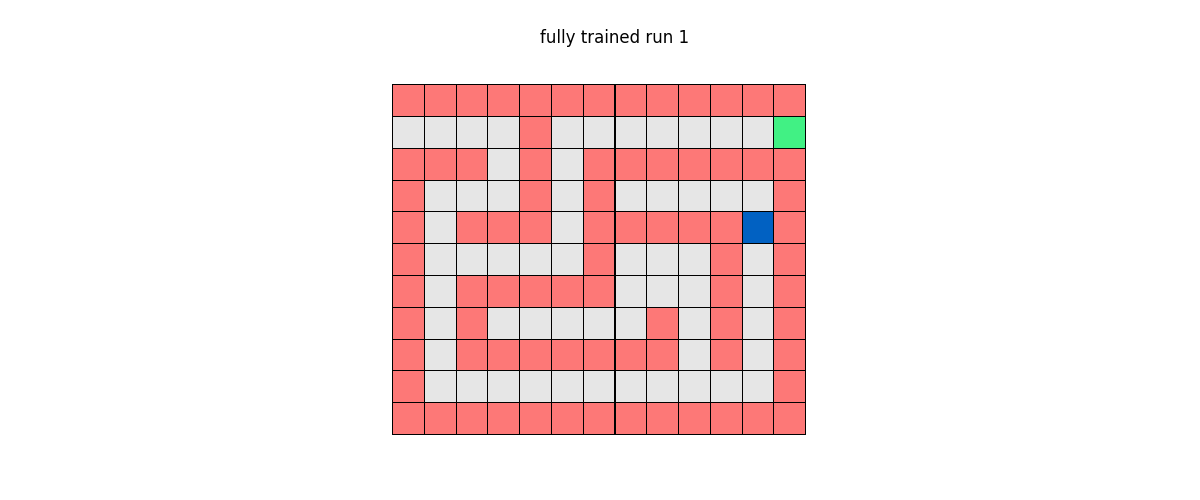
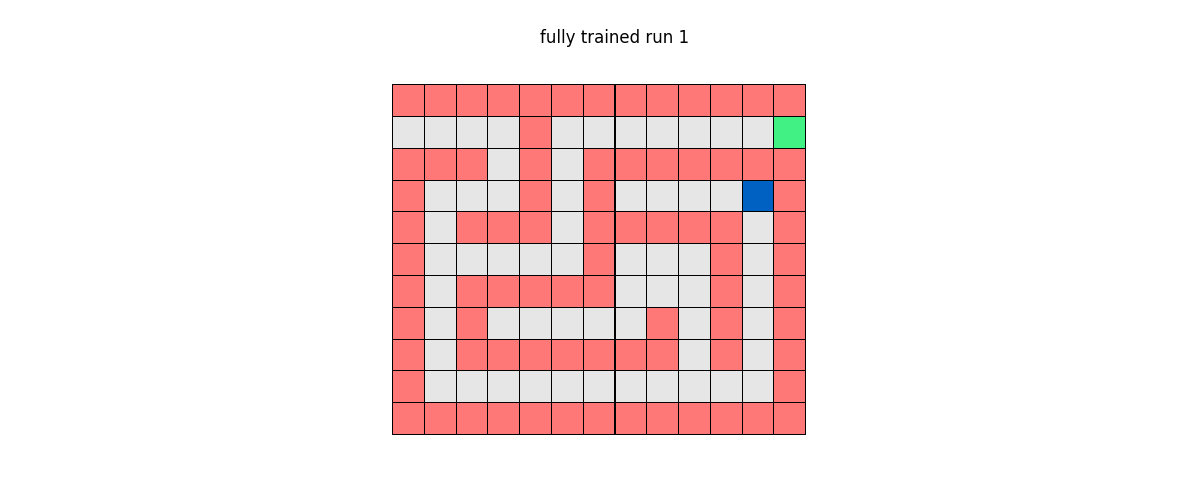
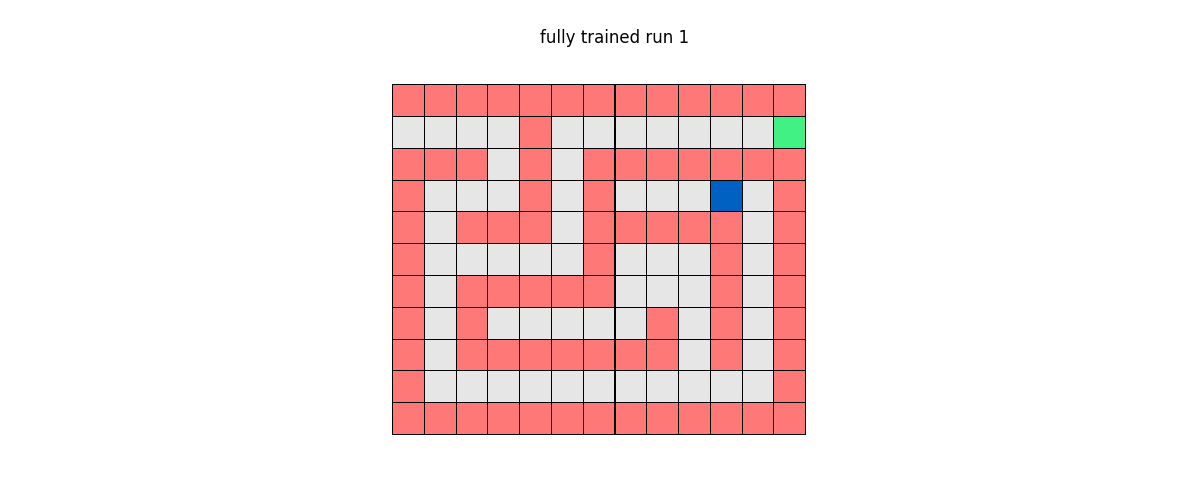
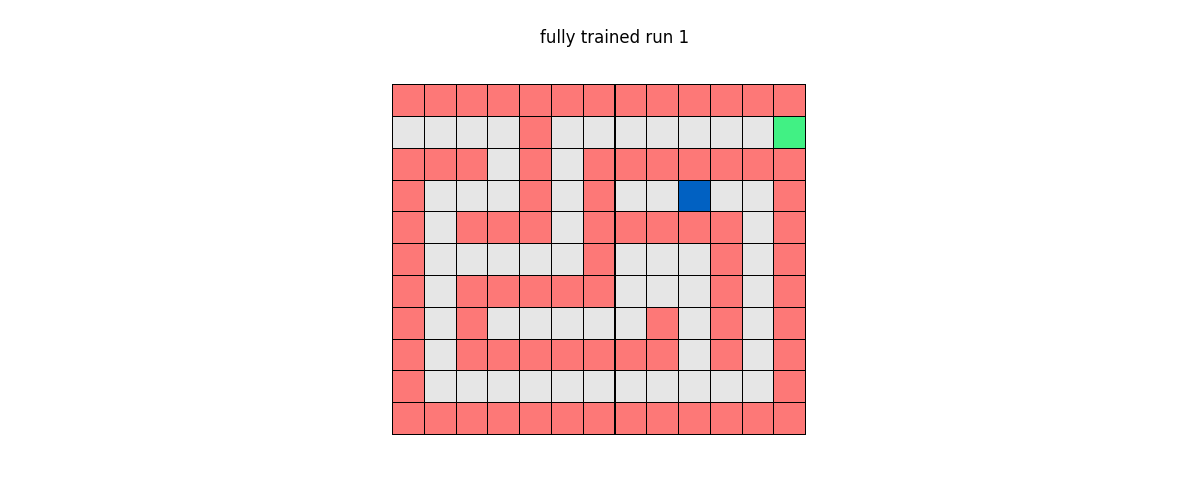
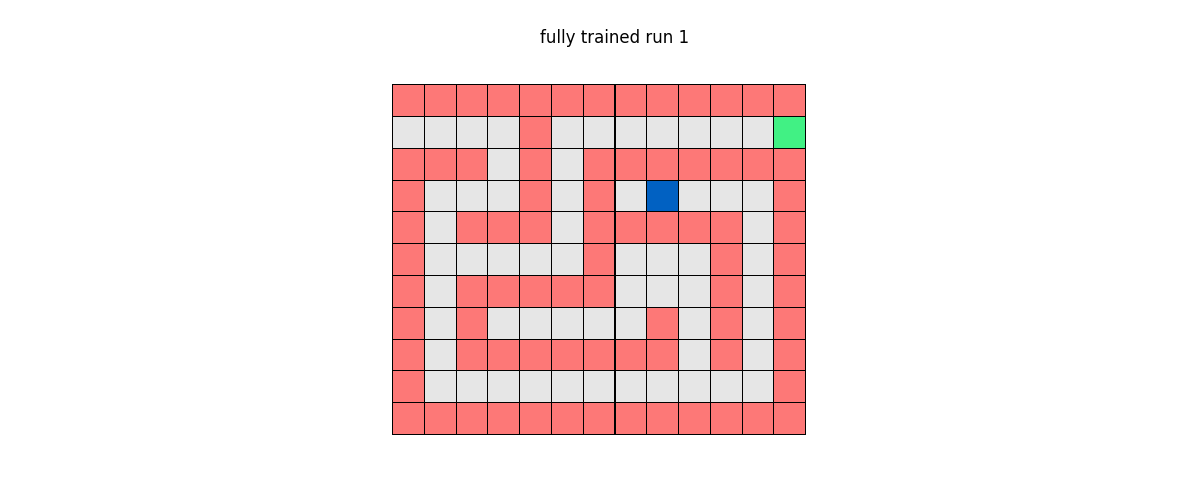
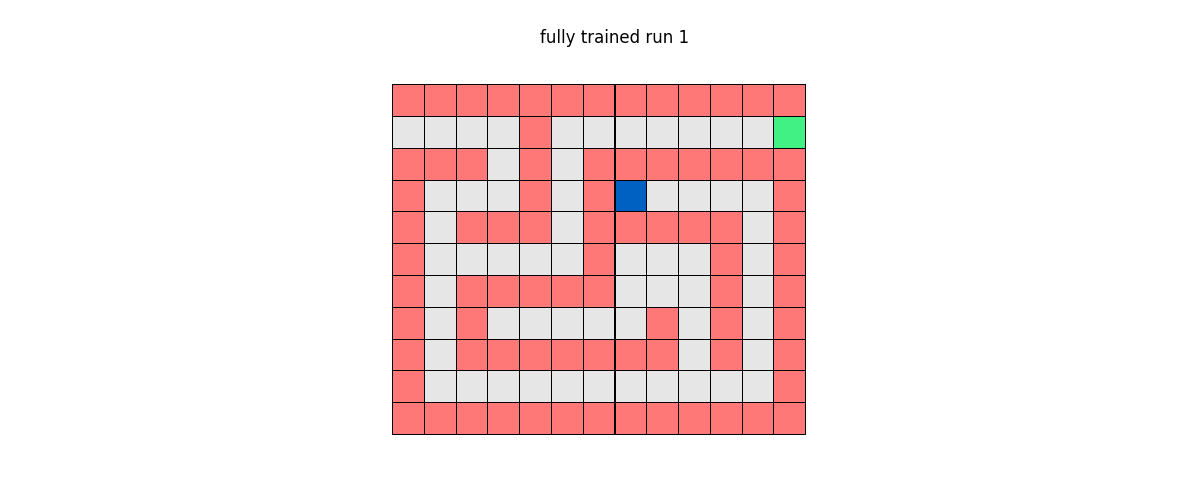
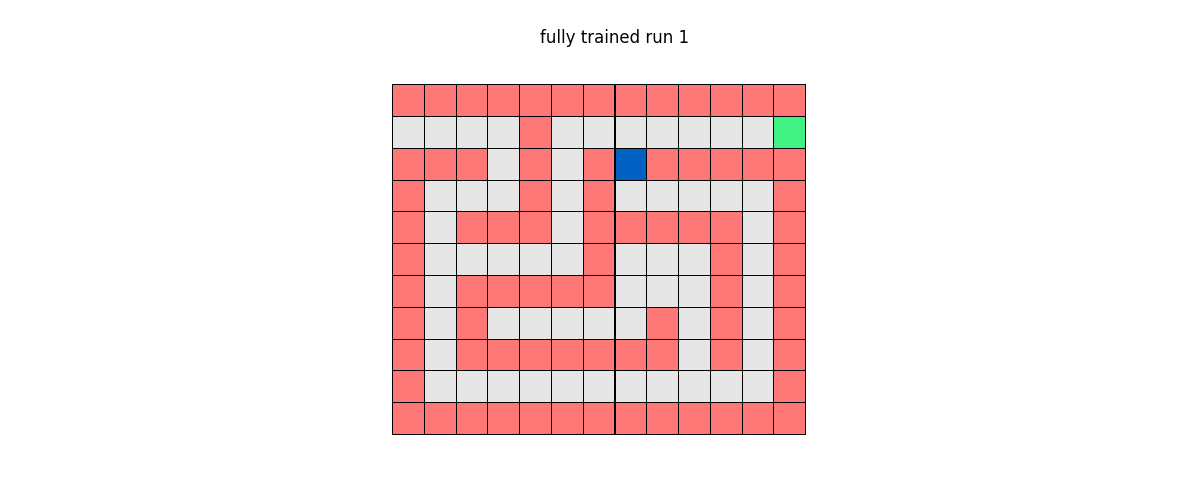
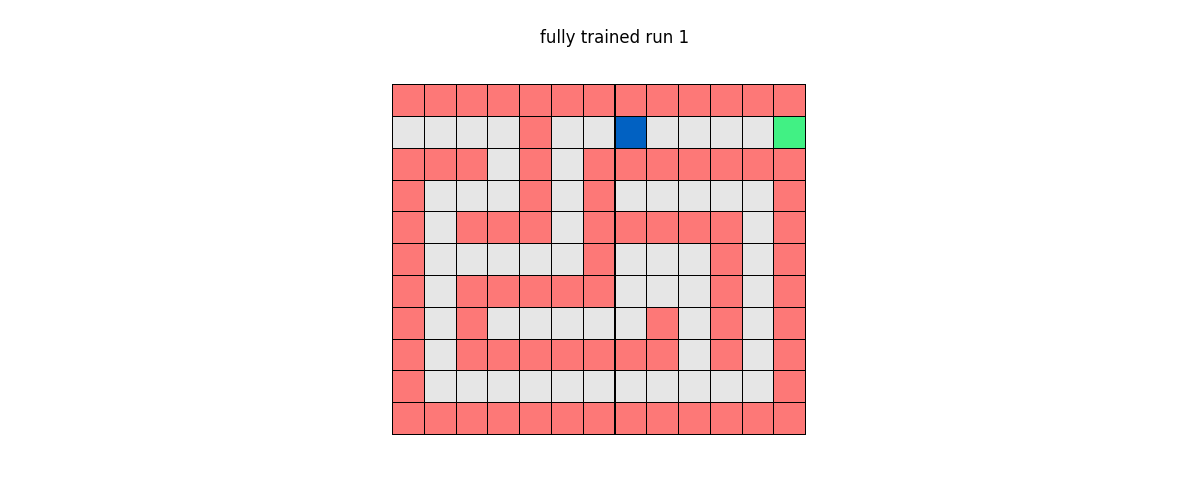
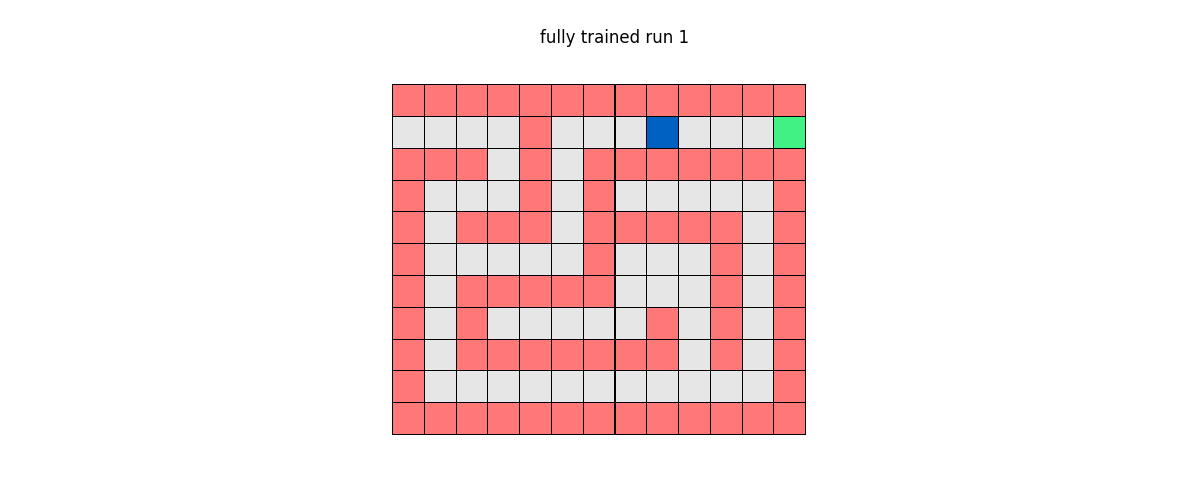
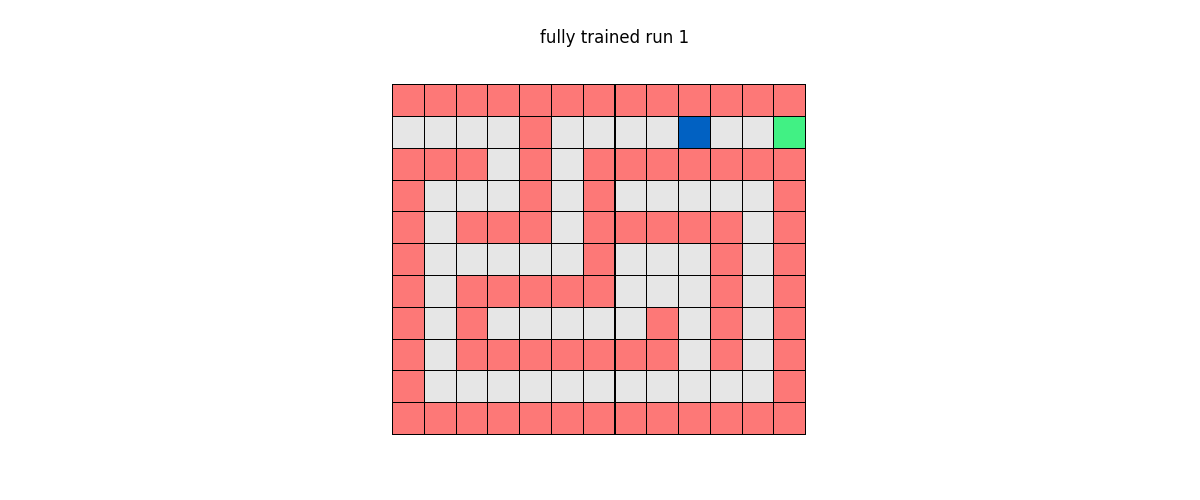
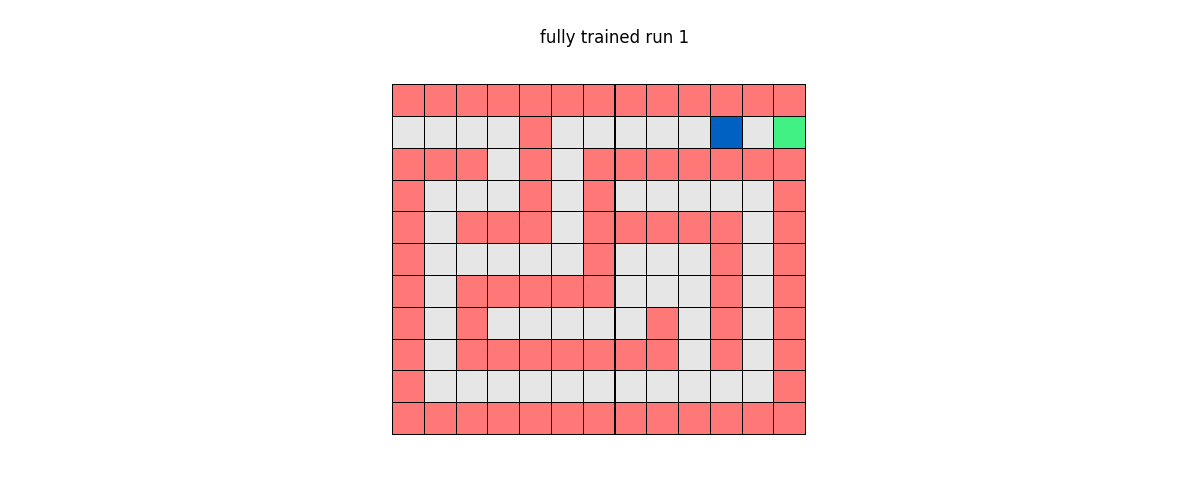
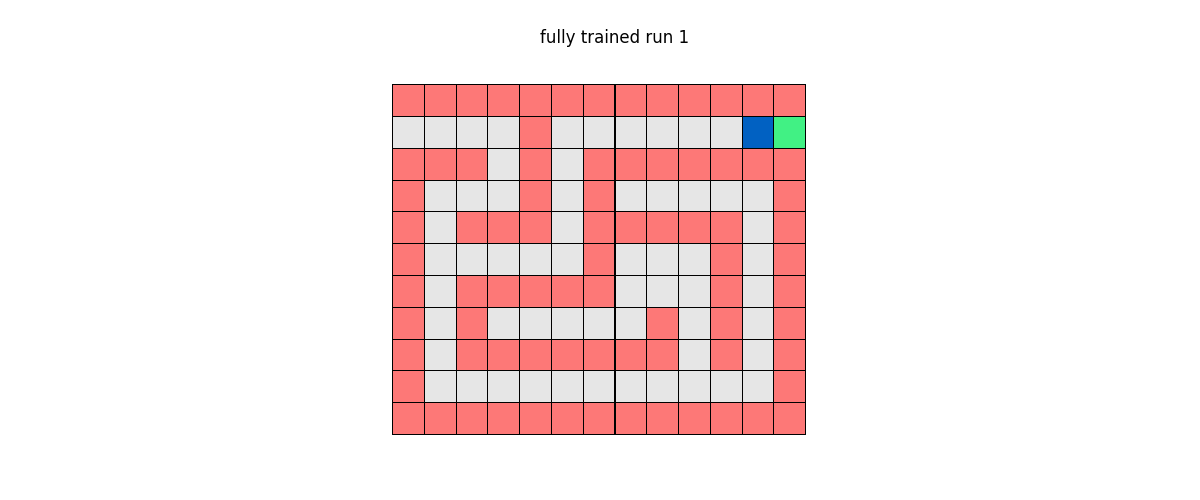
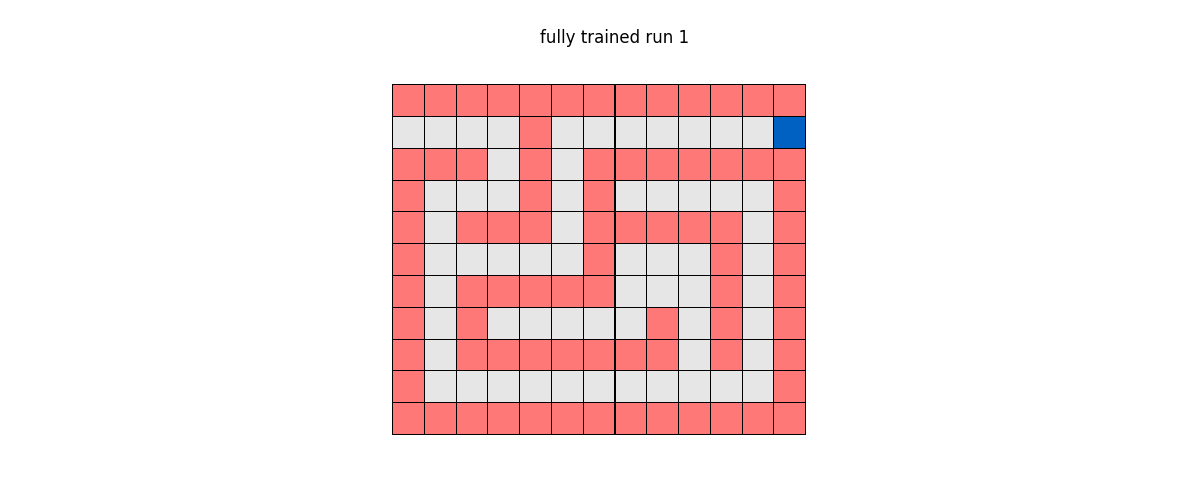

In [7]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[0,0]]
animator.animate_validation_runs(gridworld = small_maze_v2,learner = small_maze_qlearner,starting_locations = locs)

In this case while the agent did step on one hazard square on its way to the target, overall it did a better job here compared to the previous 'moat' environment.    

Generally speaking, we cannot expect an RL agent trained on one enviroment to perform well on another substantially different one. To demand this is like expecting an object detector - trained to recognize human faces on a large set of images - to accurately detect cars in a new set of images.

Machine learning is all about creating pattern recognizers that - when trained properly on a dataset - generalize from what they have seen in training to making accurate predictions on new input data. If a pattern recognizer isn't trained on the sort of data we would like it to recognize in the future we can't expect miracles to happen!